# Build Recurrent Neural Network in TensorFlow 1/7
https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767

In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [6]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state
    
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [7]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.708768


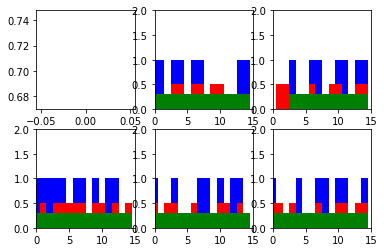

Step 100 Loss 0.586572


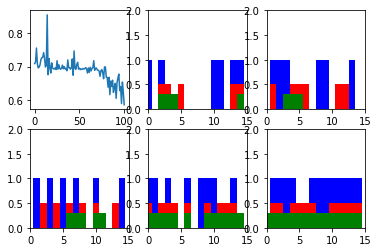

Step 200 Loss 0.0238381


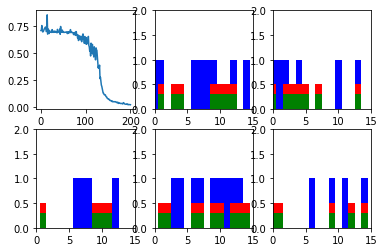

Step 300 Loss 0.0104264


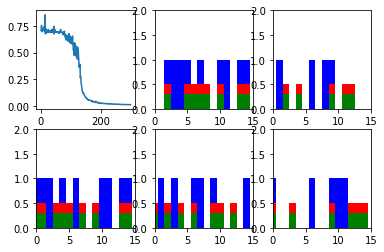

Step 400 Loss 0.00770137


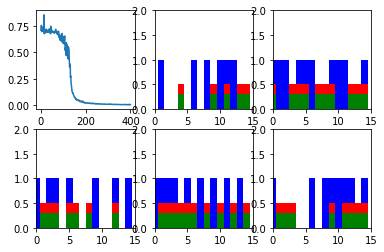

Step 500 Loss 0.0050237


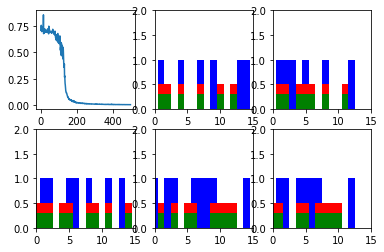

Step 600 Loss 0.00386851


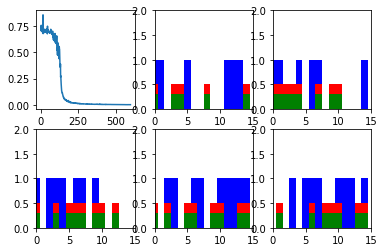

New data, epoch 1
Step 0 Loss 0.193269


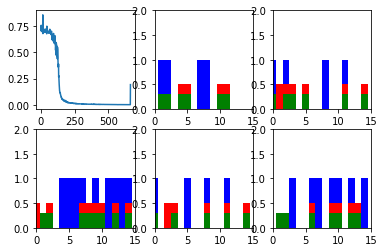

Step 100 Loss 0.00290086


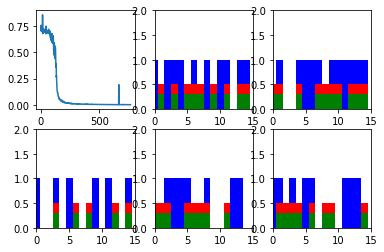

Step 200 Loss 0.00231119


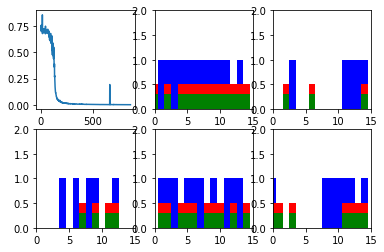

Step 300 Loss 0.00220835


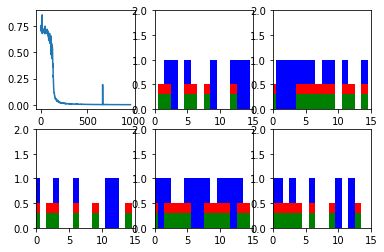

Step 400 Loss 0.00181021


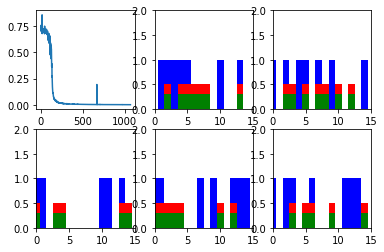

Step 500 Loss 0.00182464


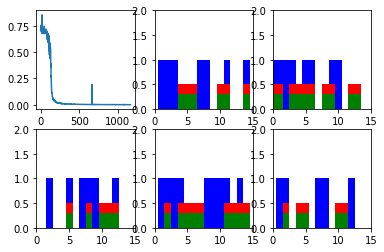

Step 600 Loss 0.00159165


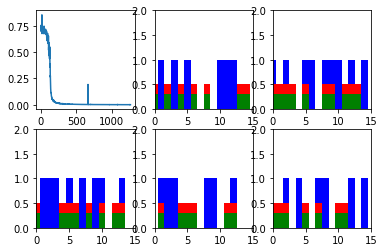

New data, epoch 2
Step 0 Loss 0.0652077


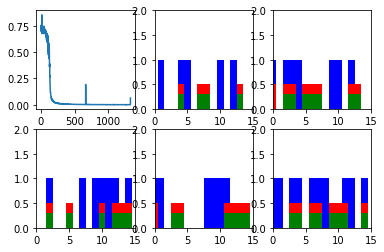

Step 100 Loss 0.00128884


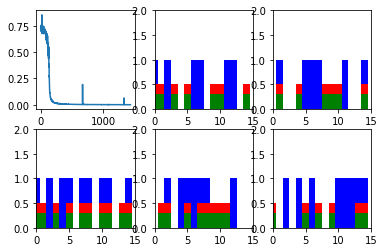

Step 200 Loss 0.00156944


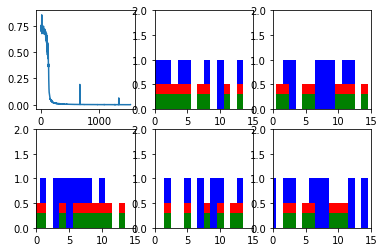

Step 300 Loss 0.00113192


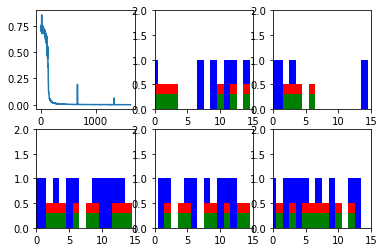

Step 400 Loss 0.00103457


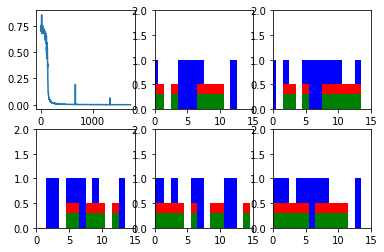

Step 500 Loss 0.000986978


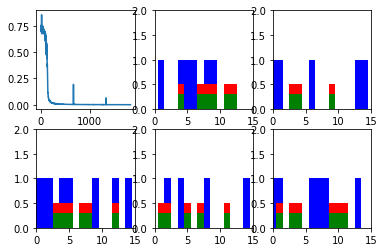

Step 600 Loss 0.00100006


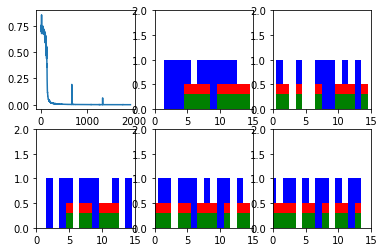

New data, epoch 3
Step 0 Loss 0.239873


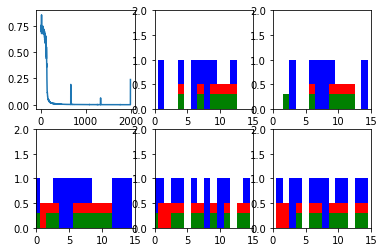

Step 100 Loss 0.0014841


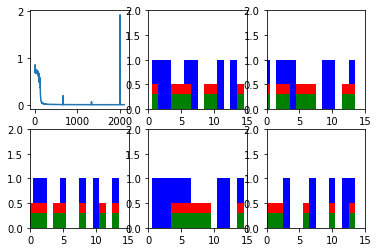

Step 200 Loss 0.00138211


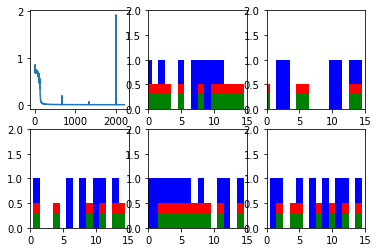

Step 300 Loss 0.00124562


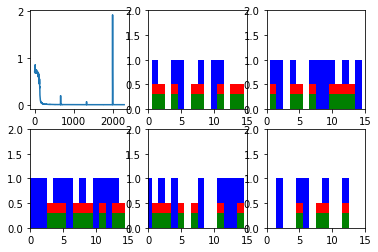

Step 400 Loss 0.00103508


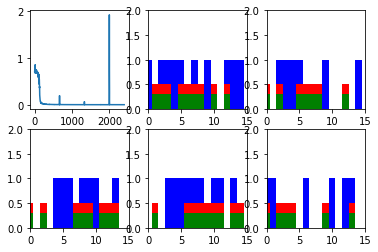

Step 500 Loss 0.000927569


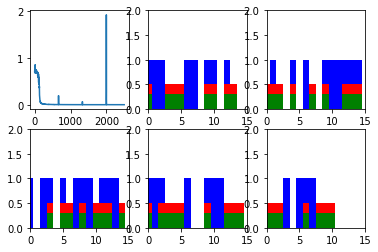

Step 600 Loss 0.00099363


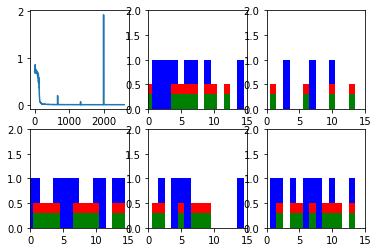

New data, epoch 4
Step 0 Loss 0.305043


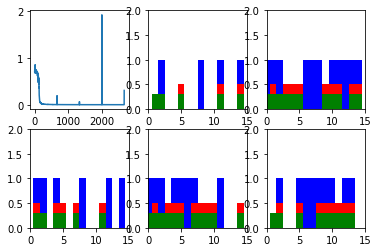

Step 100 Loss 0.000876054


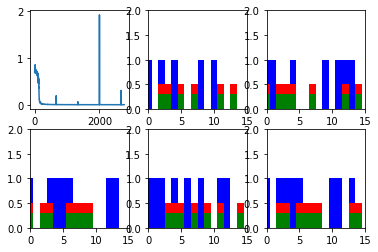

Step 200 Loss 0.000859728


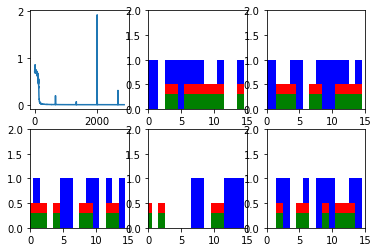

Step 300 Loss 0.000829145


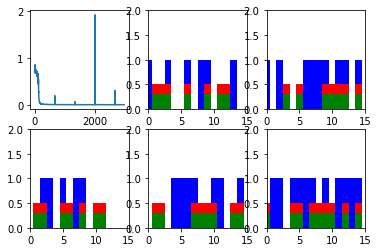

Step 400 Loss 0.000805137


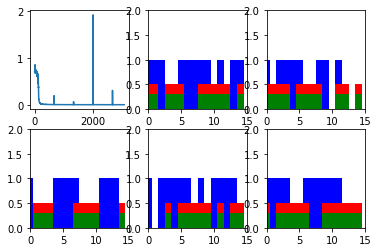

Step 500 Loss 0.000718829


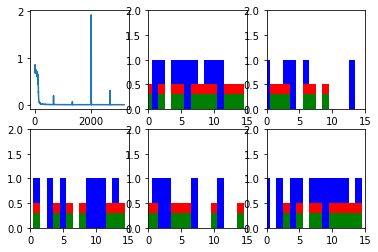

Step 600 Loss 0.000686518


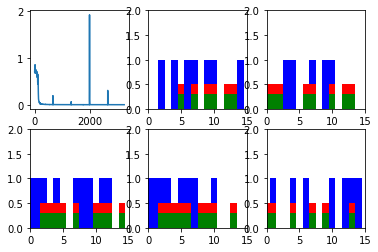

New data, epoch 5
Step 0 Loss 0.273245


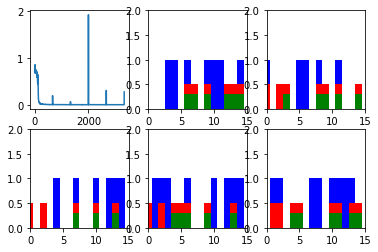

Step 100 Loss 0.000707596


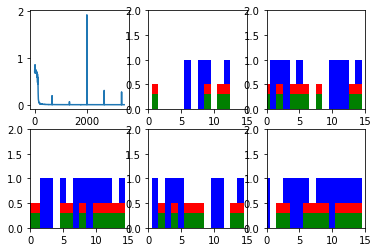

Step 200 Loss 0.000679297


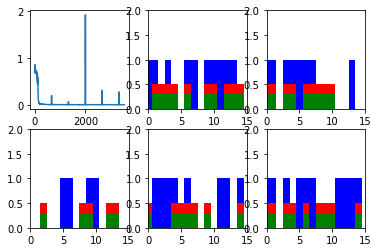

Step 300 Loss 0.000560843


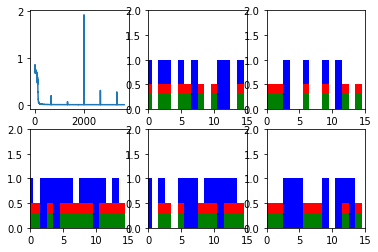

Step 400 Loss 0.000543561


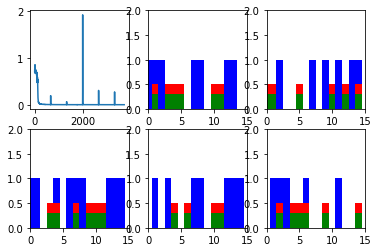

Step 500 Loss 0.00057126


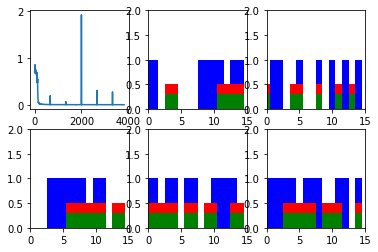

Step 600 Loss 0.000533046


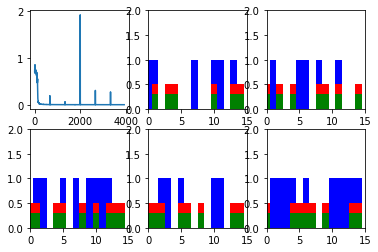

New data, epoch 6
Step 0 Loss 0.326418


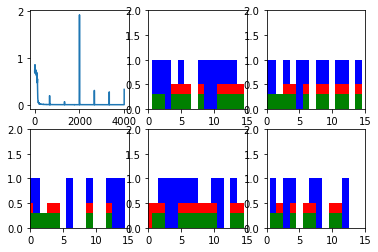

Step 100 Loss 0.000638499


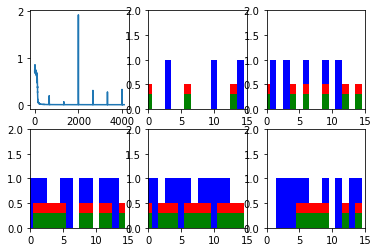

Step 200 Loss 0.000502503


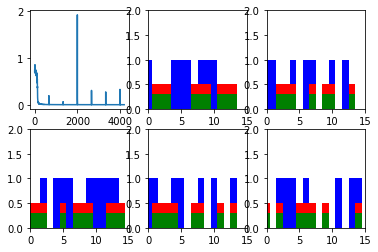

Step 300 Loss 0.000558865


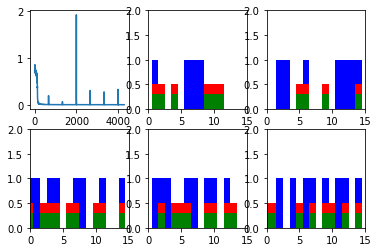

Step 400 Loss 0.000453002


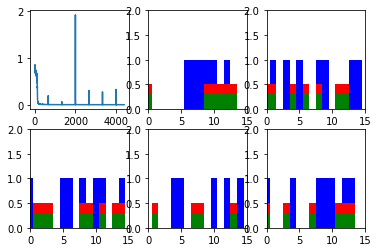

Step 500 Loss 0.000508029


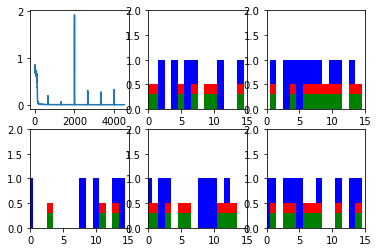

Step 600 Loss 0.000420559


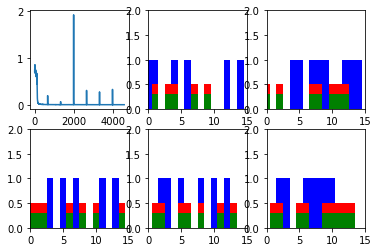

New data, epoch 7
Step 0 Loss 0.259271


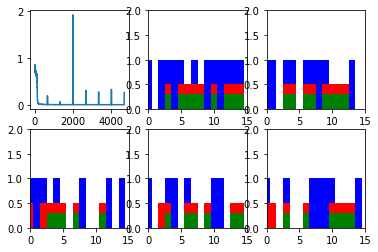

Step 100 Loss 0.000418719


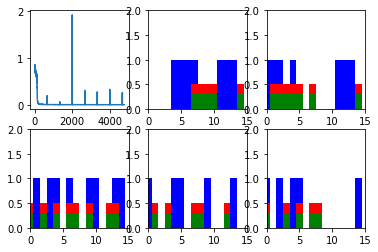

Step 200 Loss 0.000457173


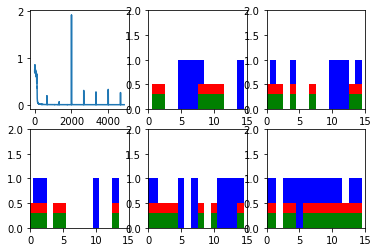

Step 300 Loss 0.000476031


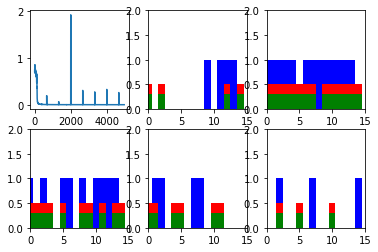

Step 400 Loss 0.000353811


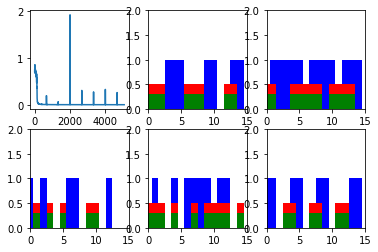

Step 500 Loss 0.000381542


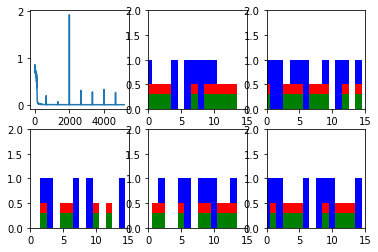

Step 600 Loss 0.000338518


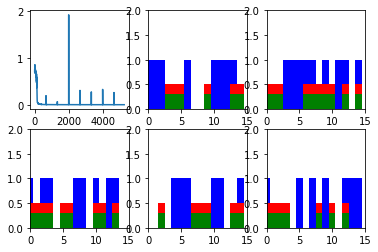

New data, epoch 8
Step 0 Loss 0.143369


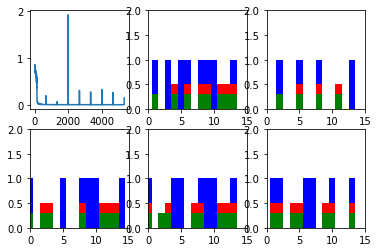

Step 100 Loss 0.000391251


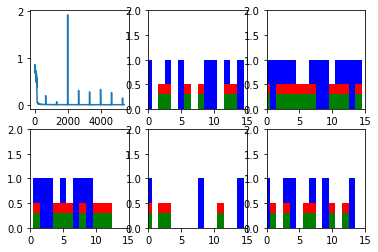

Step 200 Loss 0.000438639


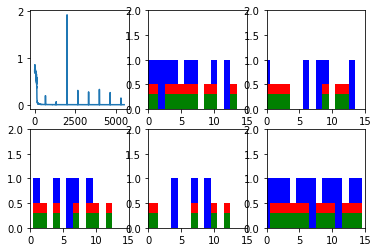

Step 300 Loss 0.000336015


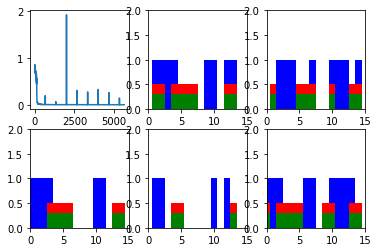

Step 400 Loss 0.000356988


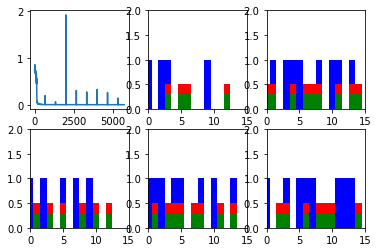

Step 500 Loss 0.000392272


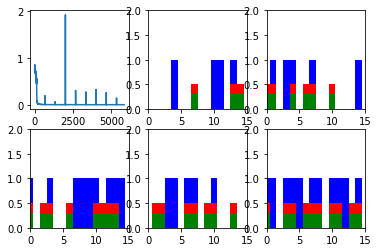

Step 600 Loss 0.000340732


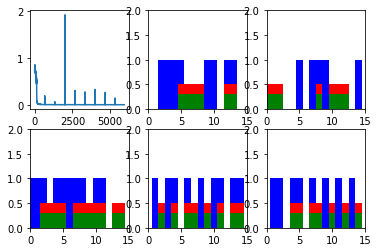

New data, epoch 9
Step 0 Loss 0.297124


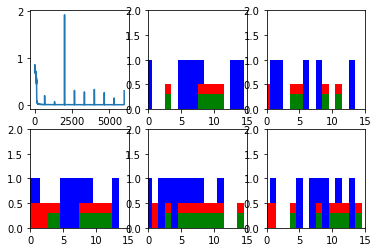

Step 100 Loss 0.000323189


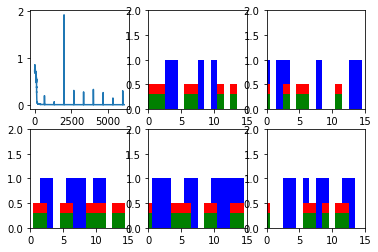

Step 200 Loss 0.000318877


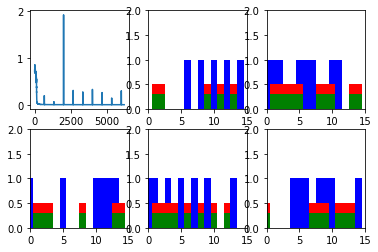

Step 300 Loss 0.000324731


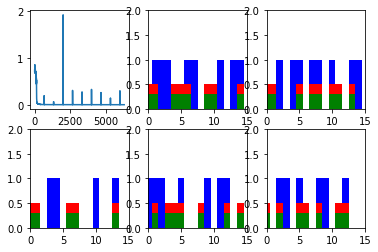

Step 400 Loss 0.000290381


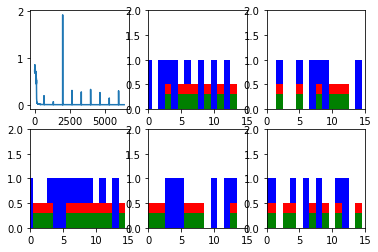

Step 500 Loss 0.000309235


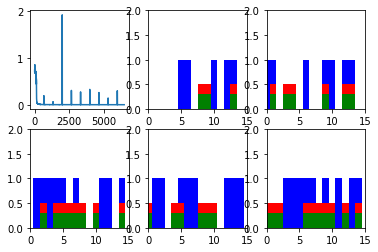

Step 600 Loss 0.000320678


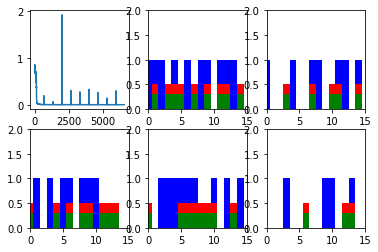

New data, epoch 10
Step 0 Loss 0.160311


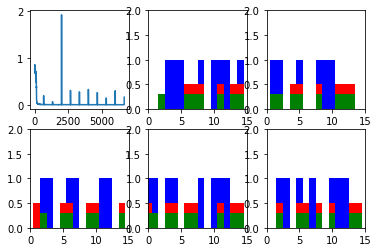

Step 100 Loss 0.000328141


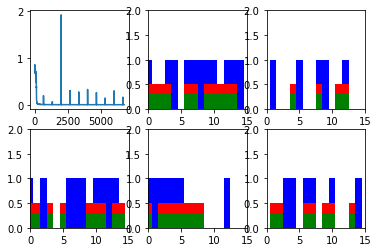

Step 200 Loss 0.00028153


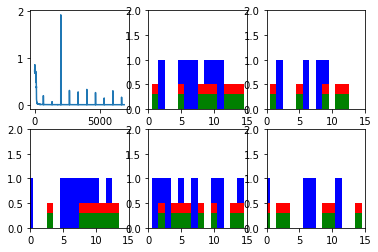

Step 300 Loss 0.000297727


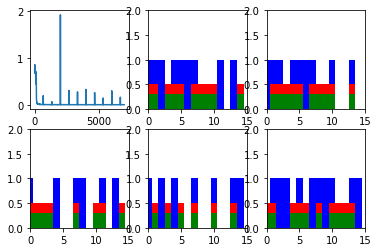

Step 400 Loss 0.000297439


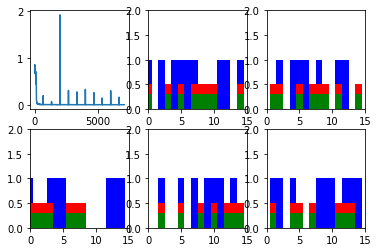

Step 500 Loss 0.000299349


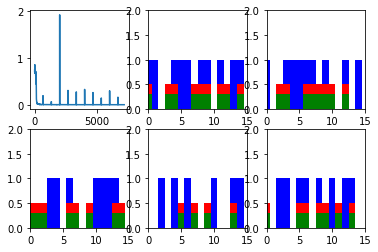

Step 600 Loss 0.000295328


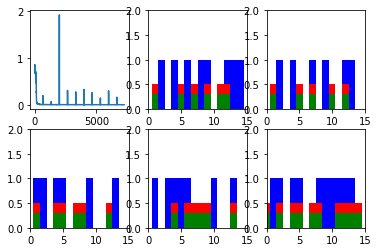

New data, epoch 11
Step 0 Loss 0.20946


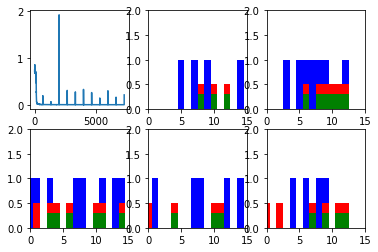

Step 100 Loss 0.000264995


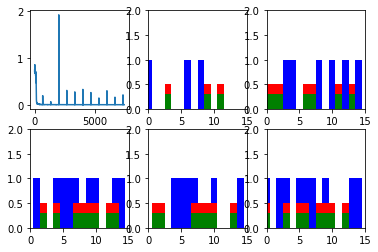

Step 200 Loss 0.000266513


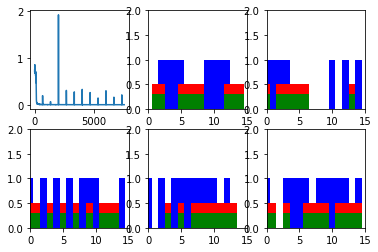

Step 300 Loss 0.000278151


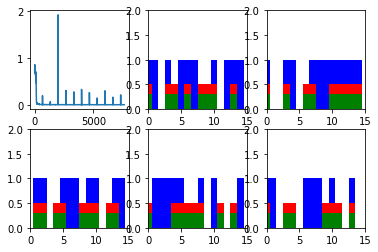

Step 400 Loss 0.000257633


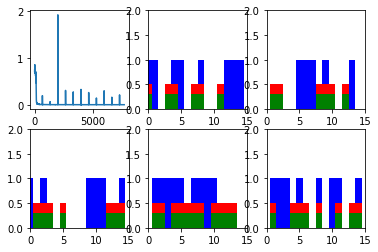

Step 500 Loss 0.000252068


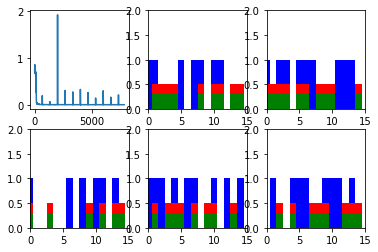

Step 600 Loss 0.000266061


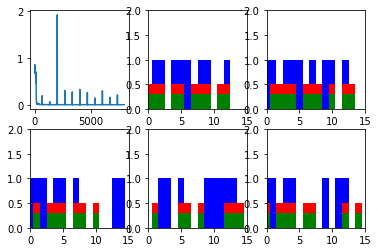

New data, epoch 12
Step 0 Loss 0.227089


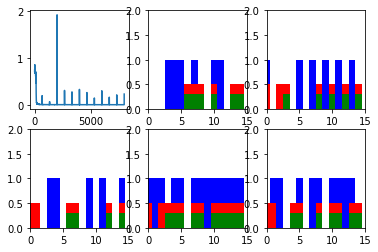

Step 100 Loss 0.000285058


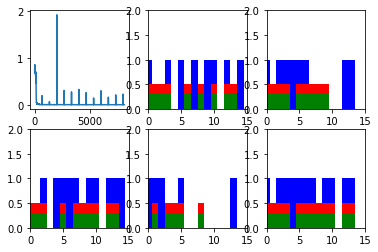

Step 200 Loss 0.000231078


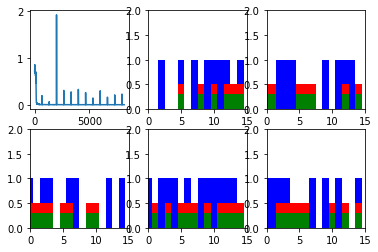

Step 300 Loss 0.000253689


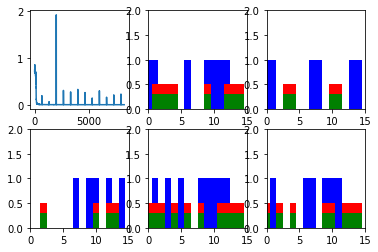

Step 400 Loss 0.000250201


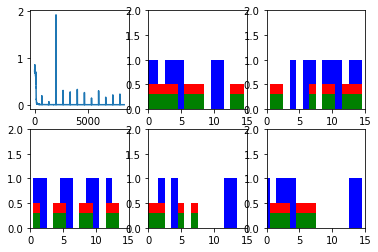

Step 500 Loss 0.000237556


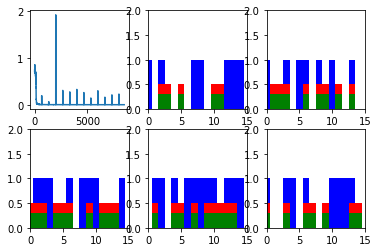

Step 600 Loss 0.000237807


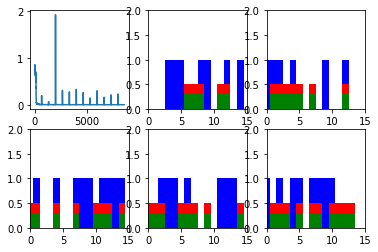

New data, epoch 13
Step 0 Loss 0.387964


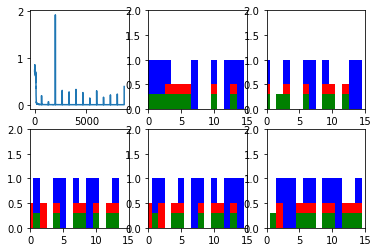

Step 100 Loss 0.000208391


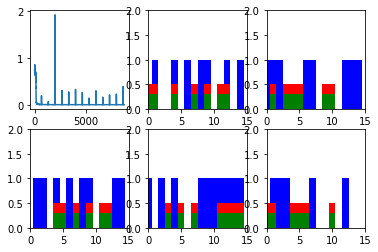

Step 200 Loss 0.000249499


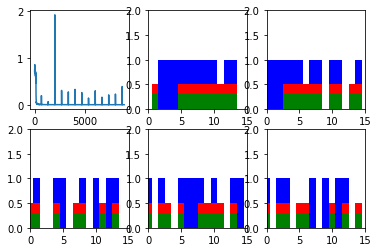

Step 300 Loss 0.000228804


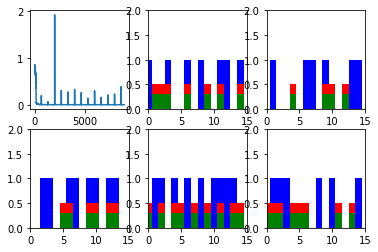

Step 400 Loss 0.000216384


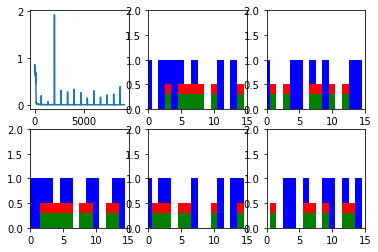

Step 500 Loss 0.00021736


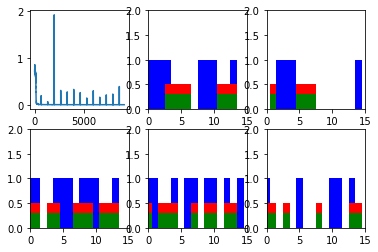

Step 600 Loss 0.000198021


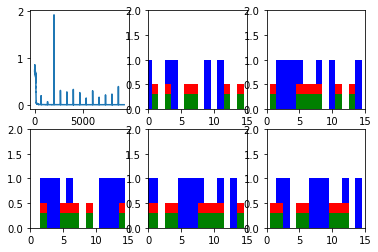

New data, epoch 14
Step 0 Loss 0.203438


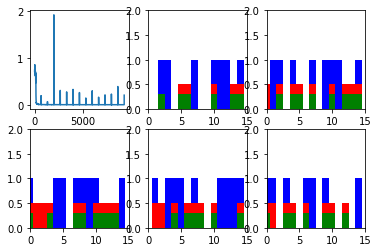

Step 100 Loss 0.000254544


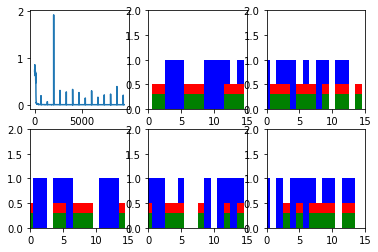

Step 200 Loss 0.00023128


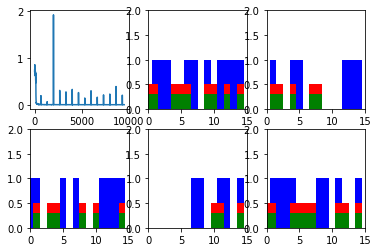

Step 300 Loss 0.000230557


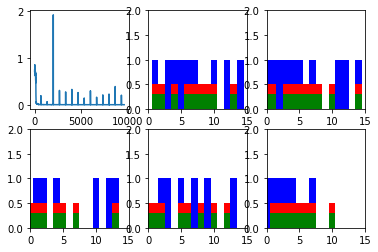

Step 400 Loss 0.000278252


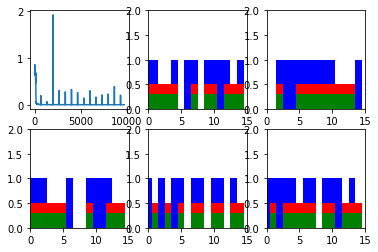

Step 500 Loss 0.000239818


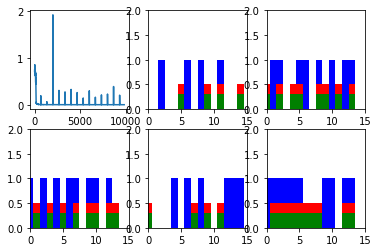

Step 600 Loss 0.000218684


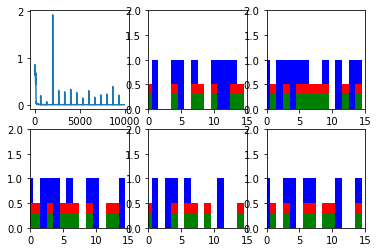

New data, epoch 15
Step 0 Loss 0.49089


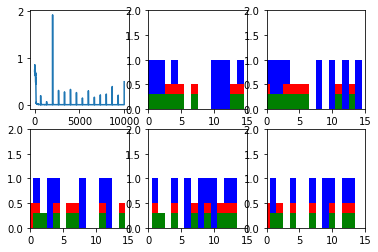

Step 100 Loss 0.000226009


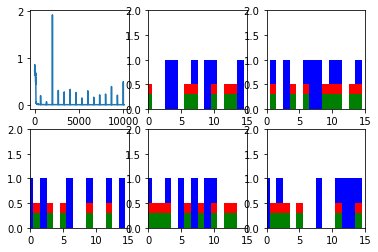

Step 200 Loss 0.000201993


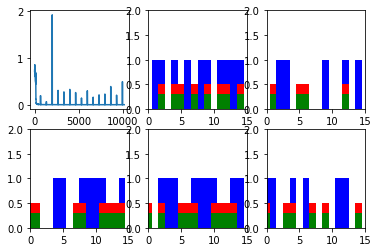

Step 300 Loss 0.000210204


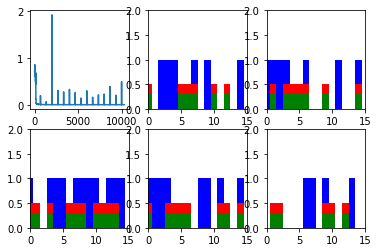

Step 400 Loss 0.000194989


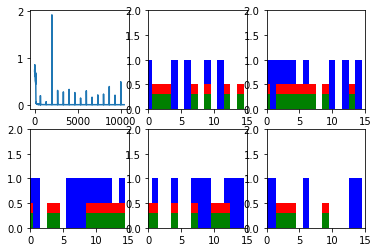

Step 500 Loss 0.000195827


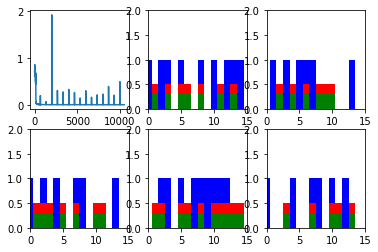

Step 600 Loss 0.000213451


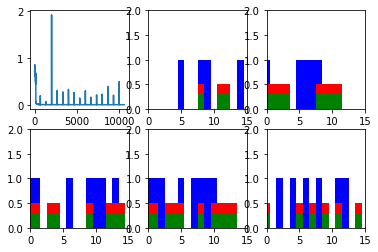

New data, epoch 16
Step 0 Loss 0.167896


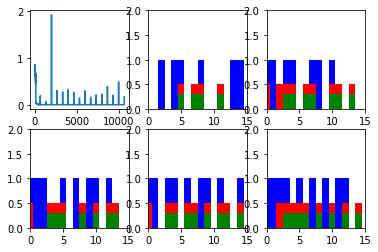

Step 100 Loss 0.000177408


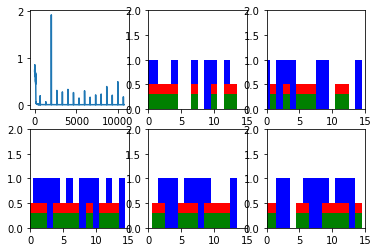

Step 200 Loss 0.000200771


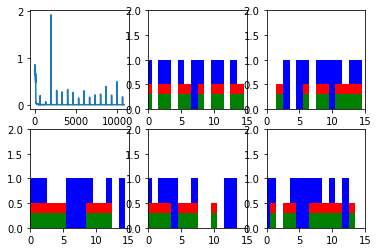

Step 300 Loss 0.000207894


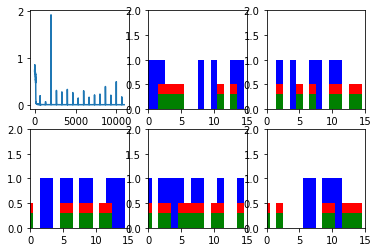

Step 400 Loss 0.000193164


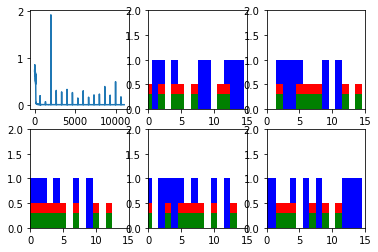

Step 500 Loss 0.000178227


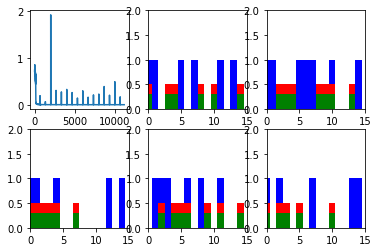

Step 600 Loss 0.000162888


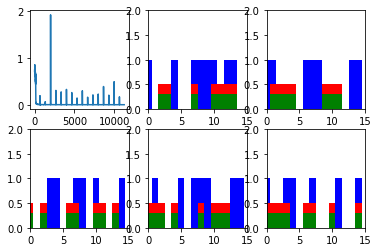

New data, epoch 17
Step 0 Loss 0.219092


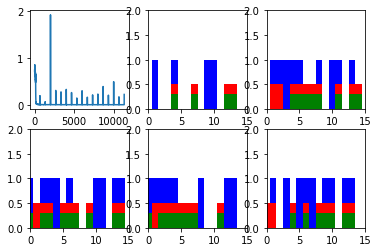

Step 100 Loss 0.000198041


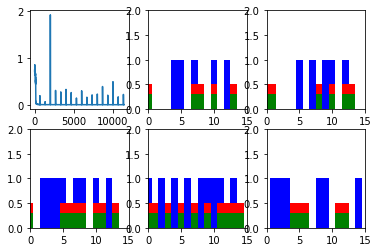

Step 200 Loss 0.000187113


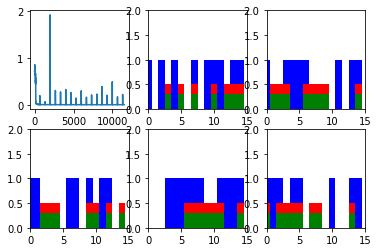

Step 300 Loss 0.000195616


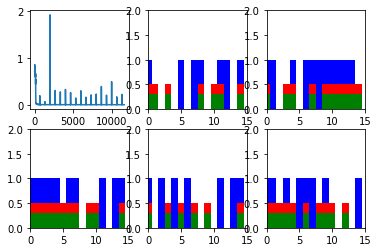

Step 400 Loss 0.000186048


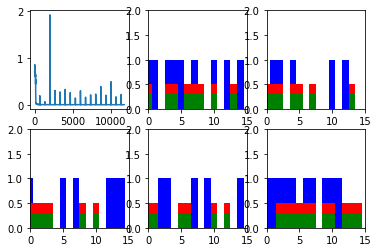

Step 500 Loss 0.00018621


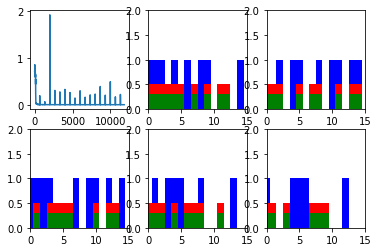

Step 600 Loss 0.00020797


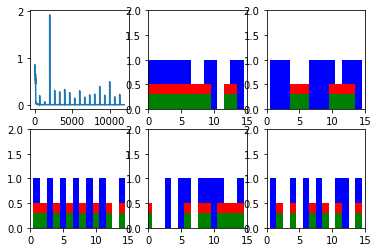

New data, epoch 18
Step 0 Loss 0.252258


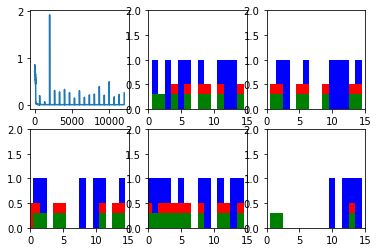

Step 100 Loss 0.000181947


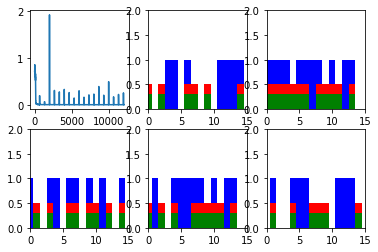

Step 200 Loss 0.000176721


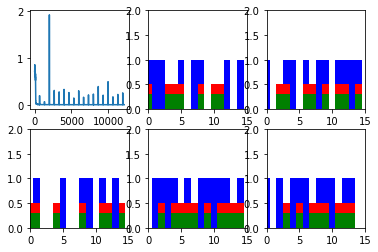

Step 300 Loss 0.000173436


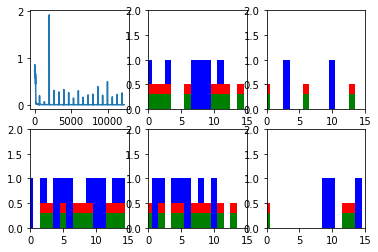

Step 400 Loss 0.000157887


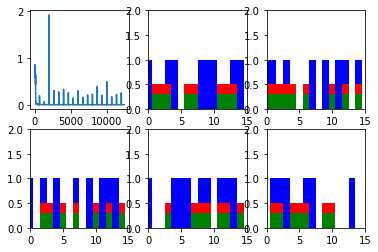

Step 500 Loss 0.00015583


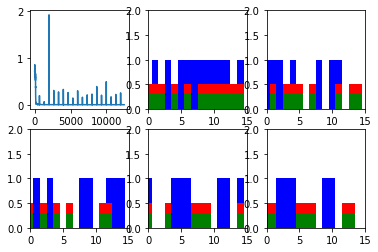

Step 600 Loss 0.000178854


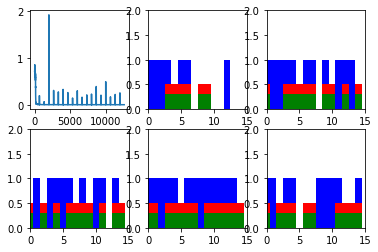

New data, epoch 19
Step 0 Loss 0.19504


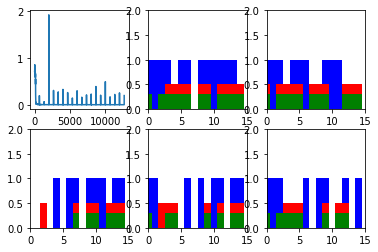

Step 100 Loss 0.000159355


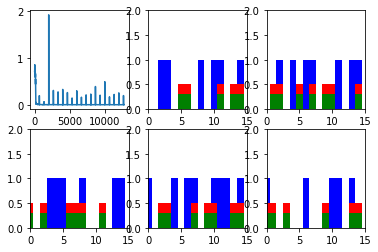

Step 200 Loss 0.000170924


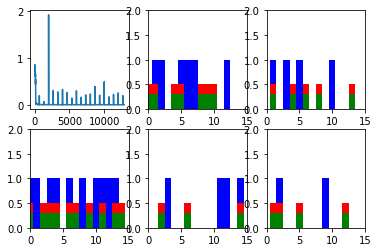

Step 300 Loss 0.00017966


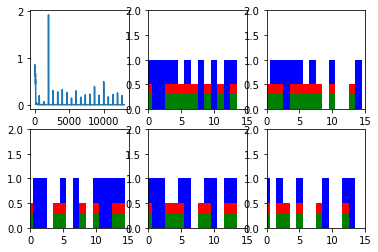

Step 400 Loss 0.000160976


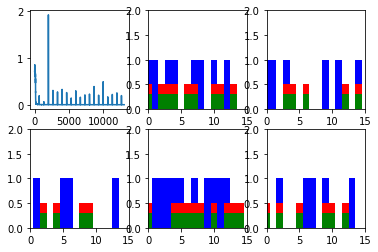

Step 500 Loss 0.000168863


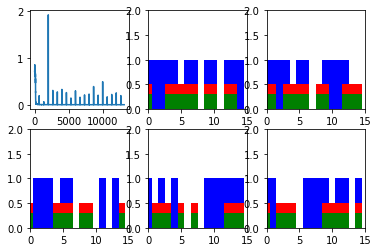

Step 600 Loss 0.000161


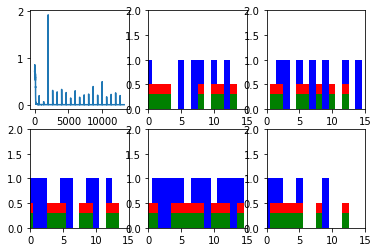

New data, epoch 20
Step 0 Loss 0.38671


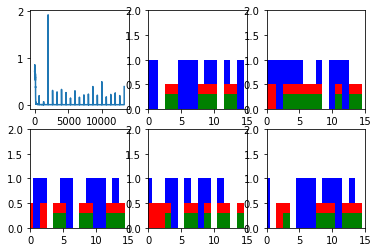

Step 100 Loss 0.000184209


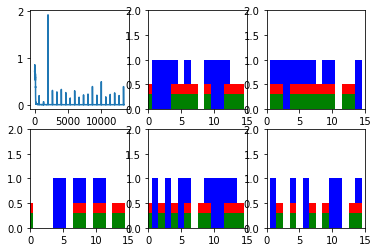

Step 200 Loss 0.000155824


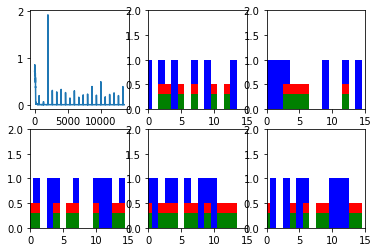

Step 300 Loss 0.000158186


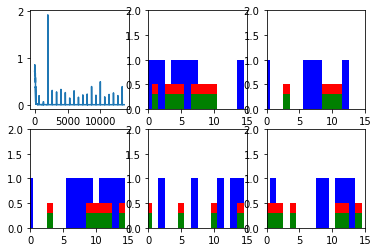

Step 400 Loss 0.000146578


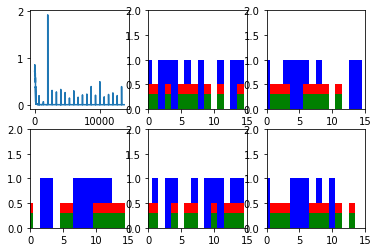

Step 500 Loss 0.000153716


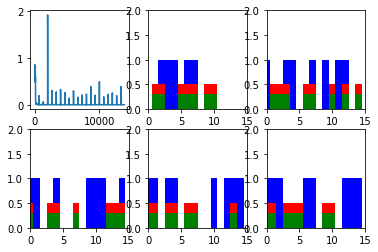

Step 600 Loss 0.000163969


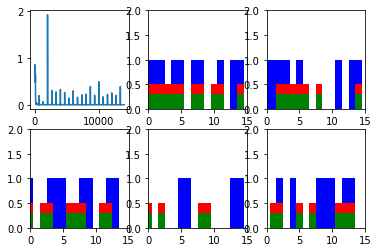

New data, epoch 21
Step 0 Loss 0.225573


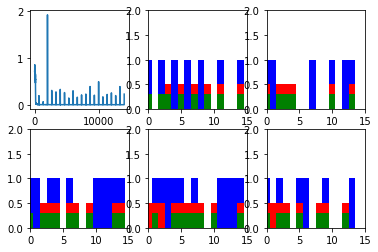

Step 100 Loss 0.000154161


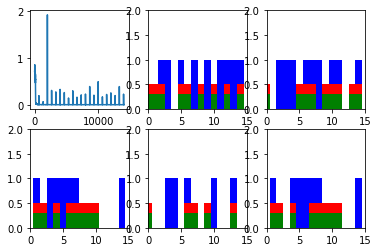

Step 200 Loss 0.000168205


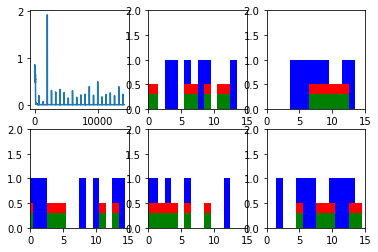

Step 300 Loss 0.000164407


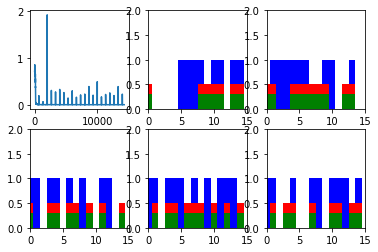

Step 400 Loss 0.000147598


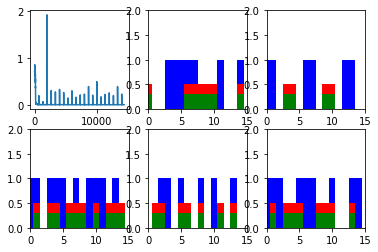

Step 500 Loss 0.00015457


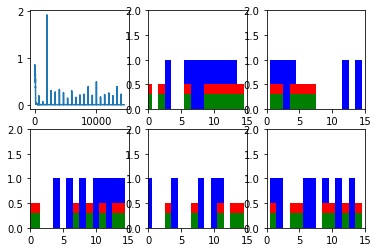

Step 600 Loss 0.000164882


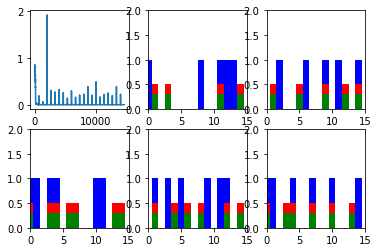

New data, epoch 22
Step 0 Loss 0.185141


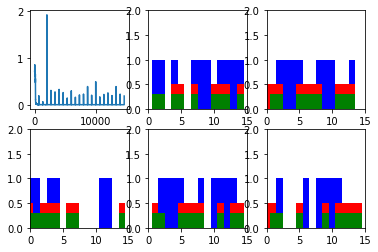

Step 100 Loss 0.000158148


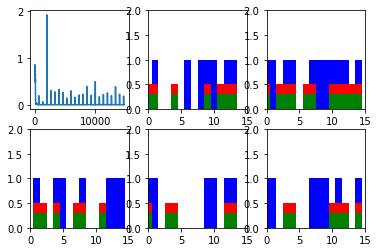

Step 200 Loss 0.000155635


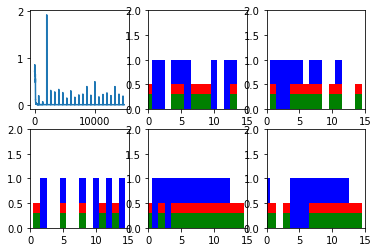

Step 300 Loss 0.000136303


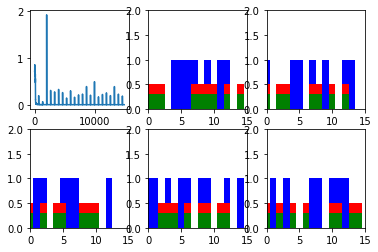

Step 400 Loss 0.00012571


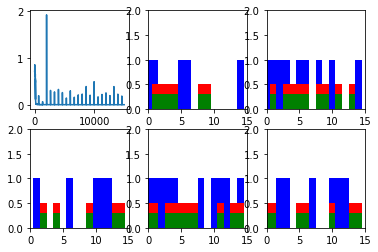

Step 500 Loss 0.000134988


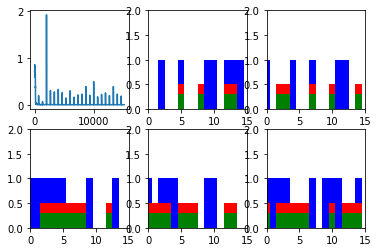

Step 600 Loss 0.000141959


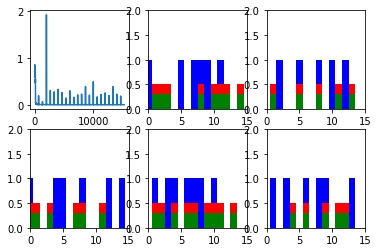

New data, epoch 23
Step 0 Loss 0.081829


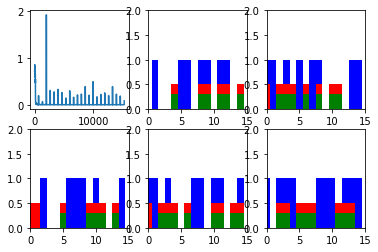

Step 100 Loss 0.000140275


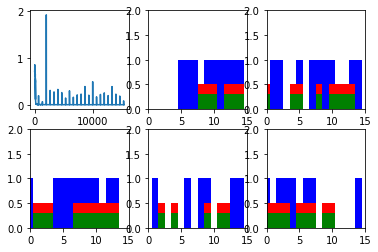

Step 200 Loss 0.000133661


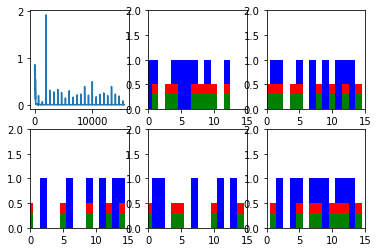

Step 300 Loss 0.000146135


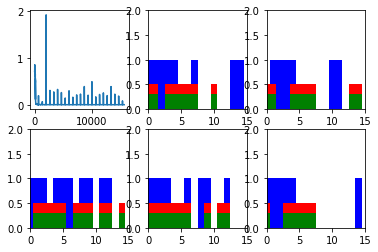

Step 400 Loss 0.000132041


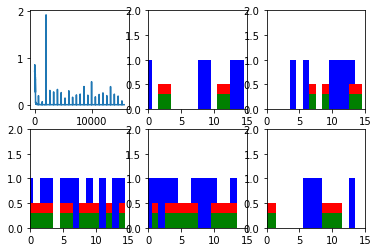

Step 500 Loss 0.000135999


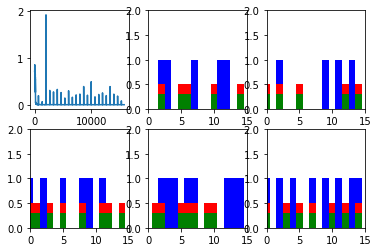

Step 600 Loss 0.00013571


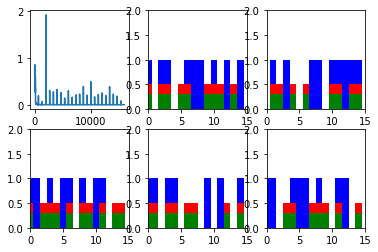

New data, epoch 24
Step 0 Loss 0.341637


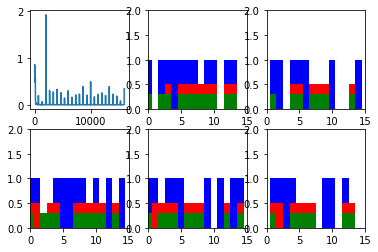

Step 100 Loss 0.000137741


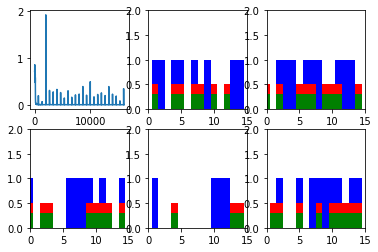

Step 200 Loss 0.000145058


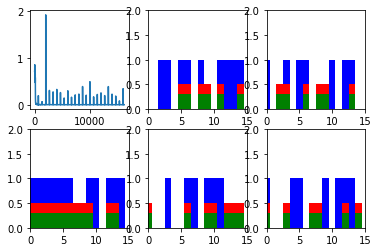

Step 300 Loss 0.000122595


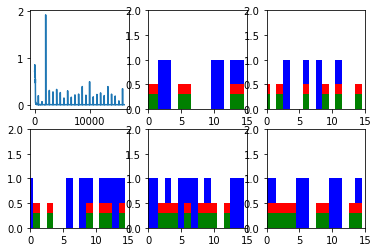

Step 400 Loss 0.000140618


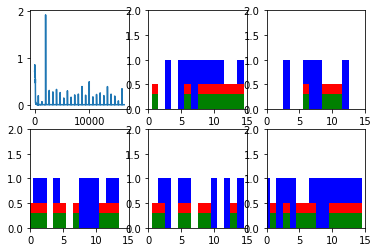

Step 500 Loss 0.000138773


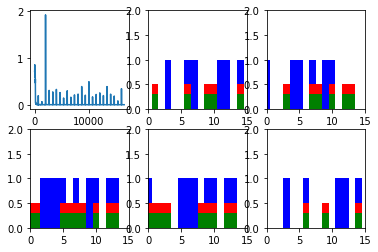

Step 600 Loss 0.000117498


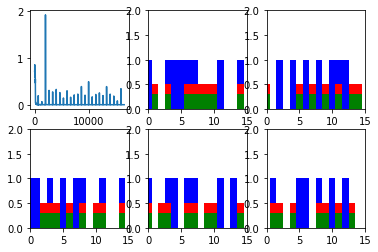

New data, epoch 25
Step 0 Loss 0.178576


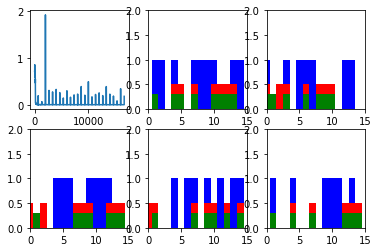

Step 100 Loss 0.000135287


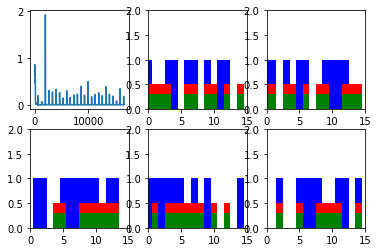

Step 200 Loss 0.000125197


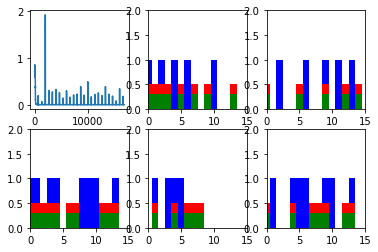

Step 300 Loss 0.000132726


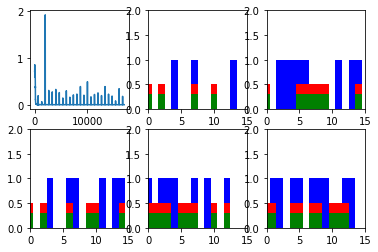

Step 400 Loss 0.000139373


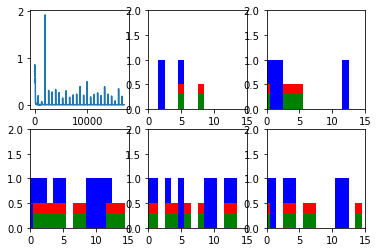

Step 500 Loss 0.000116841


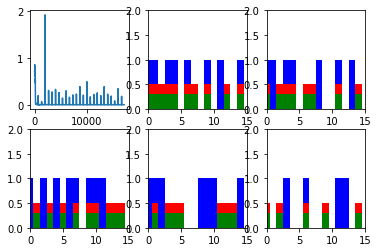

Step 600 Loss 0.000124836


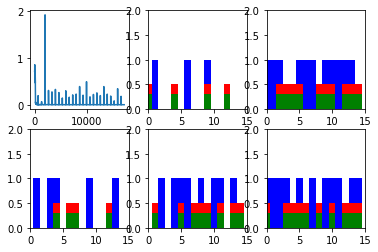

New data, epoch 26
Step 0 Loss 0.196904


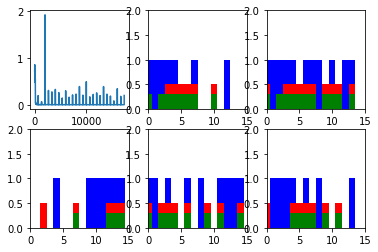

Step 100 Loss 0.000132688


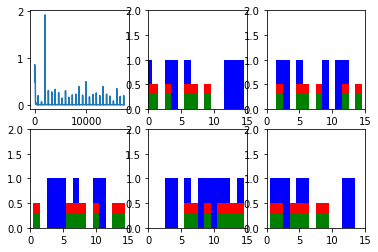

Step 200 Loss 0.000121708


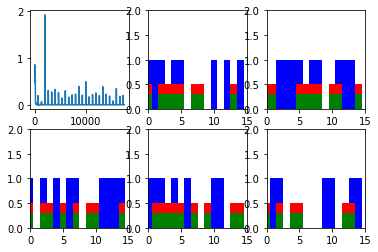

Step 300 Loss 0.000135953


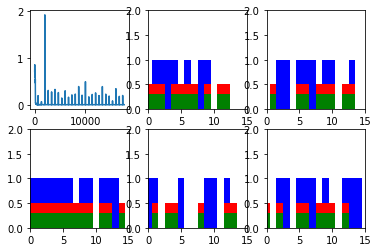

Step 400 Loss 0.000121206


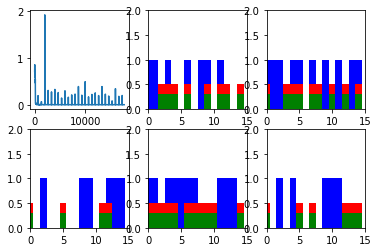

Step 500 Loss 0.00010981


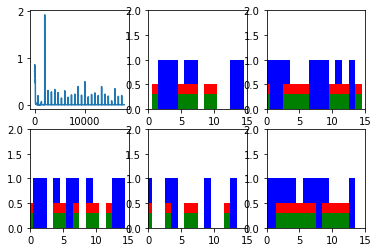

Step 600 Loss 0.000108917


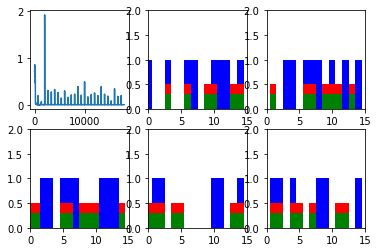

New data, epoch 27
Step 0 Loss 0.34384


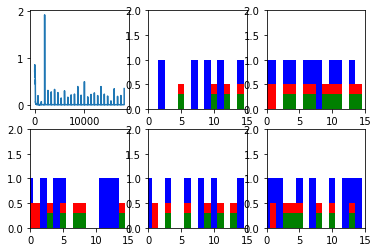

Step 100 Loss 0.000125281


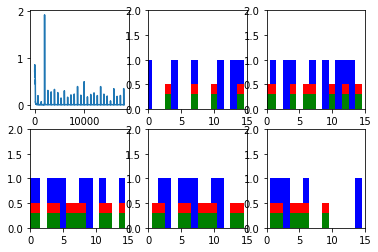

Step 200 Loss 0.000123375


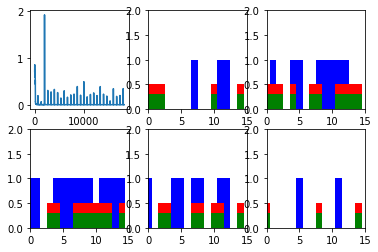

Step 300 Loss 0.000102865


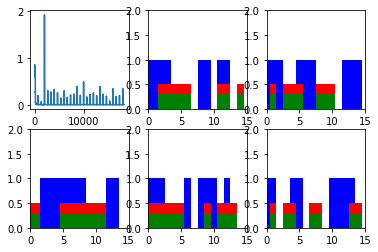

Step 400 Loss 0.000125674


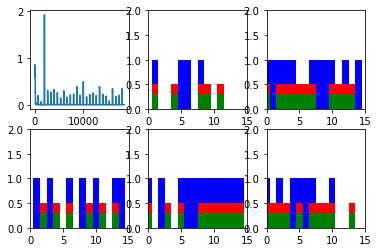

Step 500 Loss 0.000136423


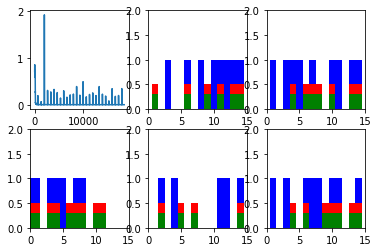

Step 600 Loss 0.000124952


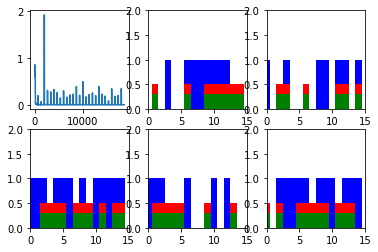

New data, epoch 28
Step 0 Loss 0.179376


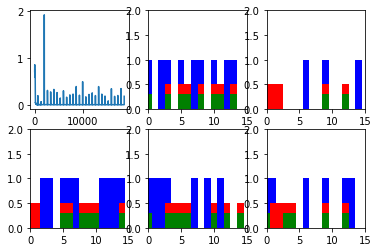

Step 100 Loss 0.000120232


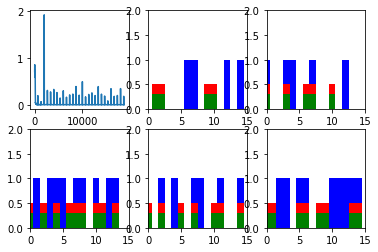

Step 200 Loss 0.00010871


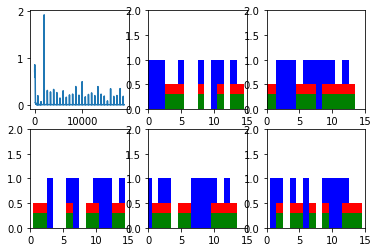

Step 300 Loss 0.000109144


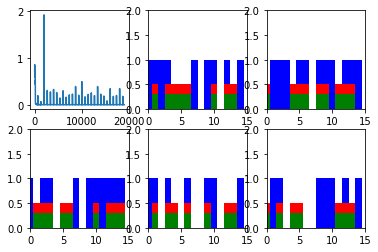

Step 400 Loss 0.000125532


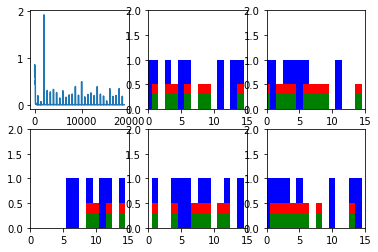

Step 500 Loss 0.000114631


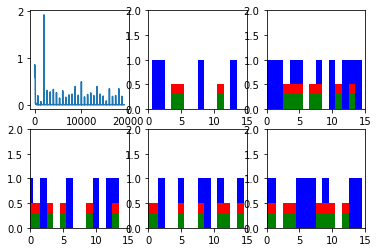

Step 600 Loss 0.000115711


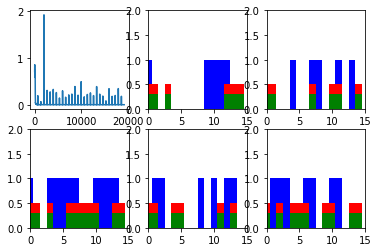

New data, epoch 29
Step 0 Loss 0.138525


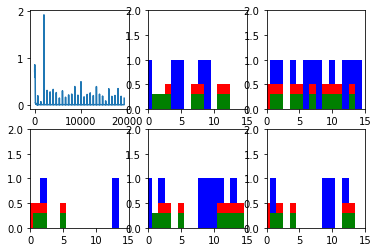

Step 100 Loss 0.000119179


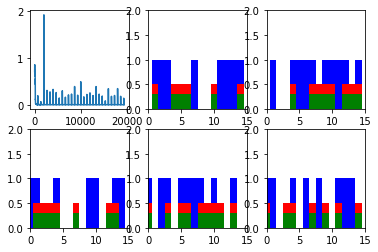

Step 200 Loss 0.00010921


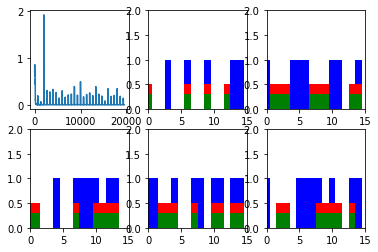

Step 300 Loss 0.000115947


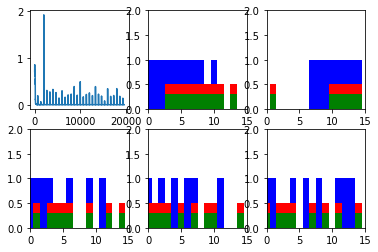

Step 400 Loss 0.000109577


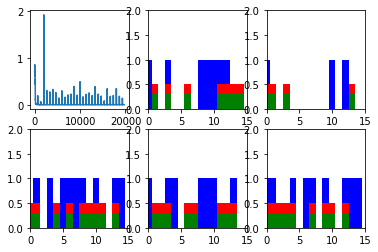

Step 500 Loss 0.00010589


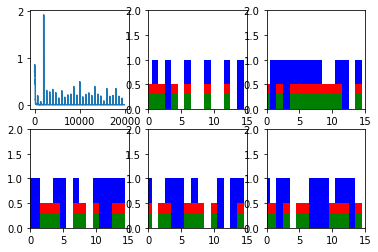

Step 600 Loss 0.000103186


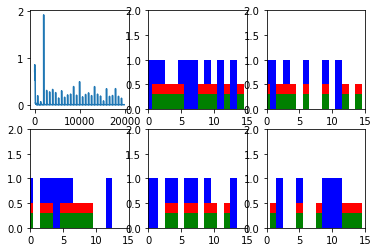

New data, epoch 30
Step 0 Loss 0.188398


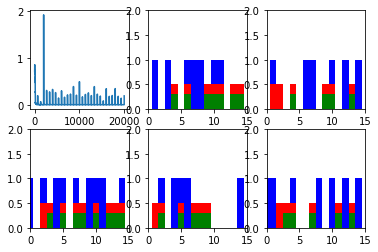

Step 100 Loss 0.000109223


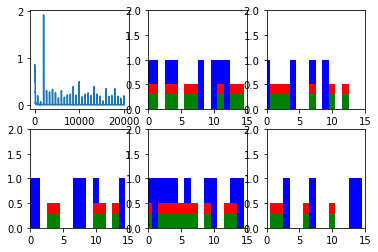

Step 200 Loss 0.000118441


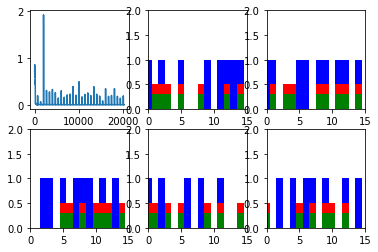

Step 300 Loss 0.00012935


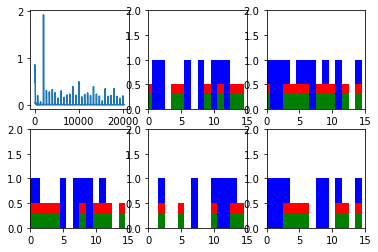

Step 400 Loss 0.000113438


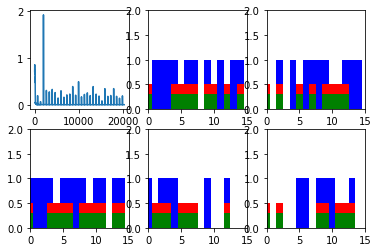

Step 500 Loss 0.000104376


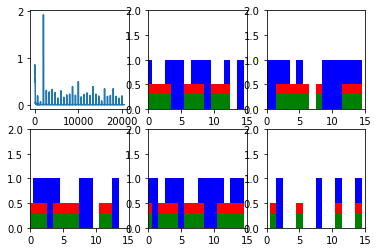

Step 600 Loss 0.000103411


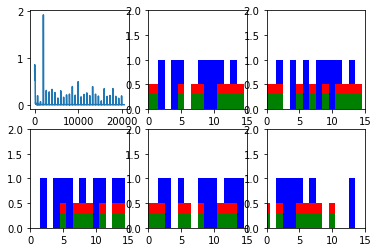

New data, epoch 31
Step 0 Loss 0.313037


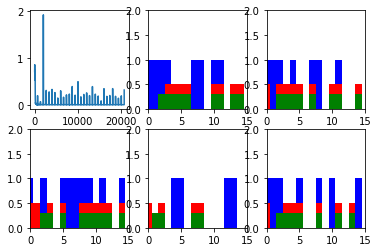

Step 100 Loss 0.000117189


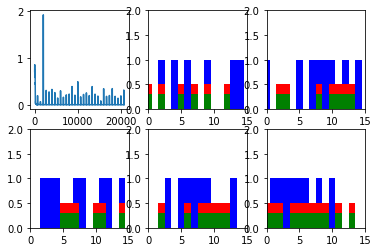

Step 200 Loss 0.000106158


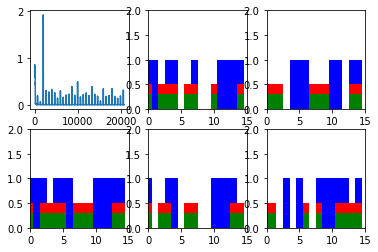

Step 300 Loss 0.000110316


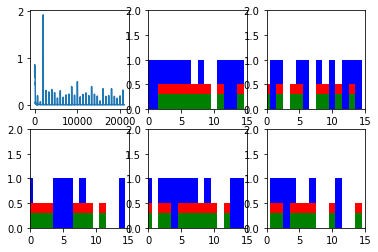

Step 400 Loss 9.29243e-05


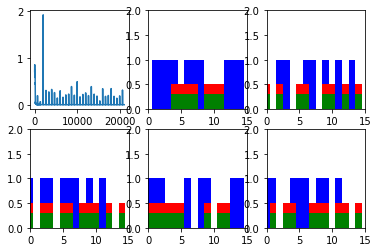

Step 500 Loss 0.000104416


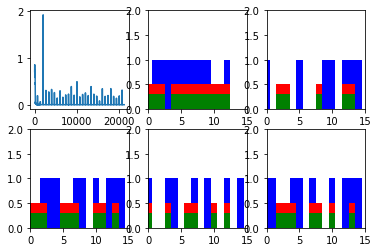

Step 600 Loss 0.000106817


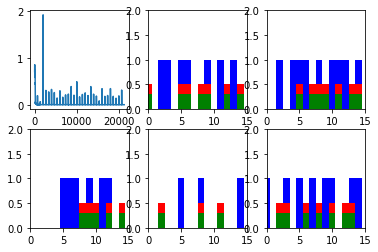

New data, epoch 32
Step 0 Loss 0.140873


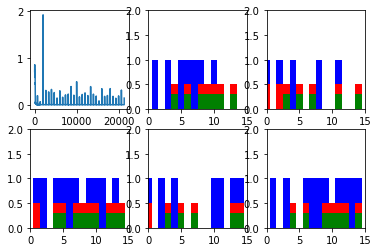

Step 100 Loss 9.24729e-05


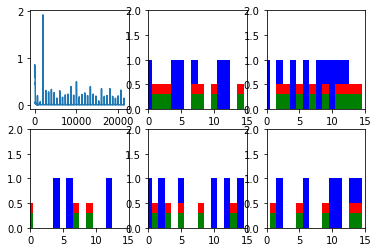

Step 200 Loss 0.000101923


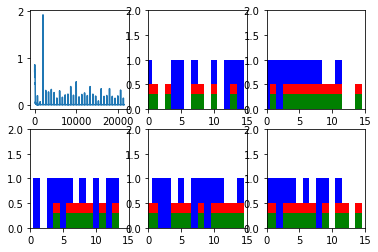

Step 300 Loss 9.62422e-05


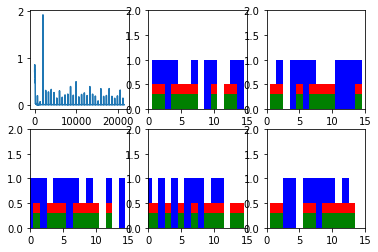

Step 400 Loss 9.35139e-05


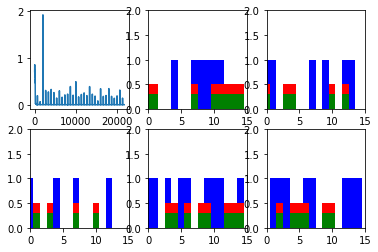

Step 500 Loss 0.000101889


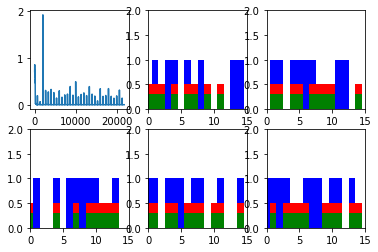

Step 600 Loss 9.74045e-05


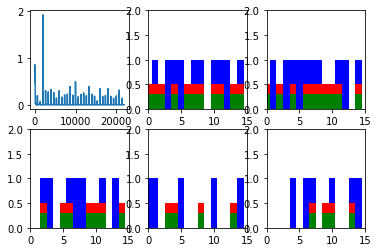

New data, epoch 33
Step 0 Loss 0.203555


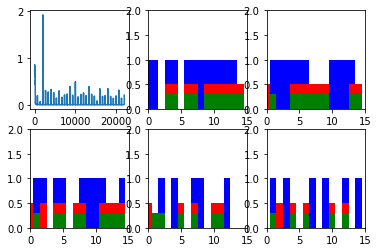

Step 100 Loss 0.000105734


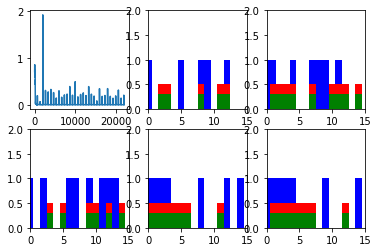

Step 200 Loss 0.000103866


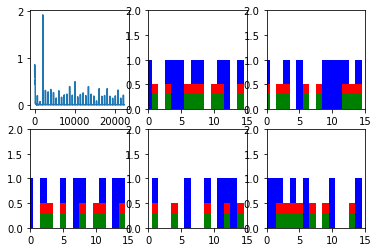

Step 300 Loss 0.000115285


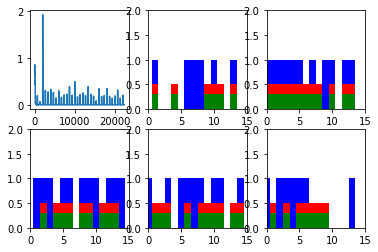

Step 400 Loss 8.99572e-05


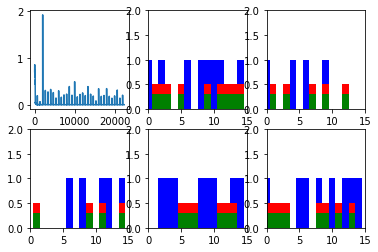

Step 500 Loss 0.000100883


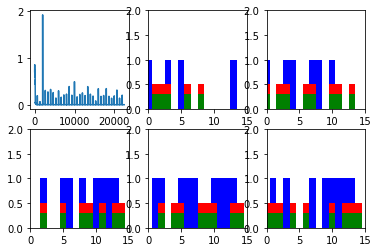

Step 600 Loss 8.94725e-05


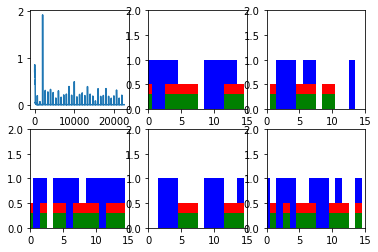

New data, epoch 34
Step 0 Loss 0.188144


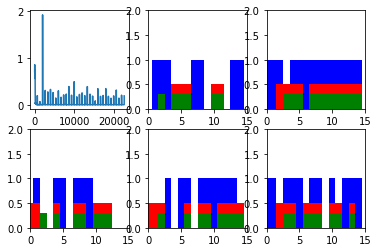

Step 100 Loss 0.000112103


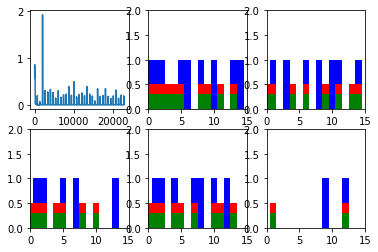

Step 200 Loss 0.000112104


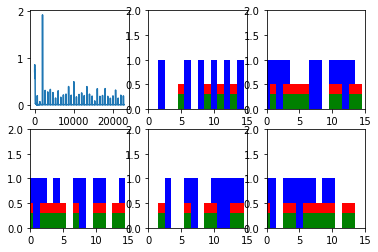

Step 300 Loss 9.66434e-05


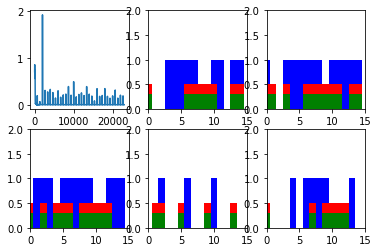

Step 400 Loss 8.92496e-05


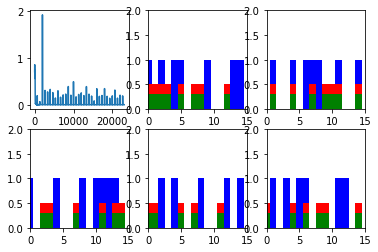

Step 500 Loss 9.82382e-05


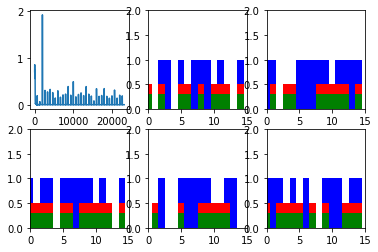

Step 600 Loss 9.21444e-05


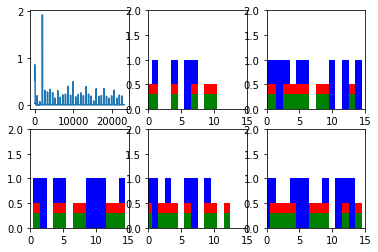

New data, epoch 35
Step 0 Loss 0.210956


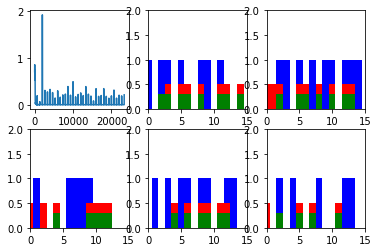

Step 100 Loss 9.34515e-05


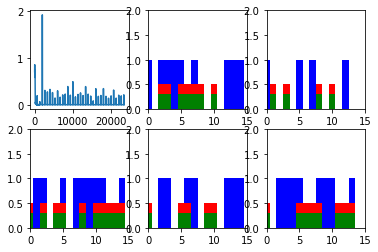

Step 200 Loss 0.000103454


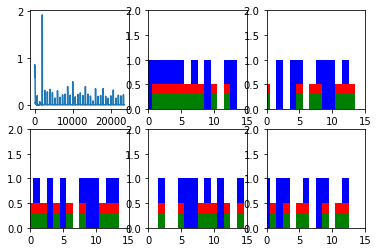

Step 300 Loss 8.82632e-05


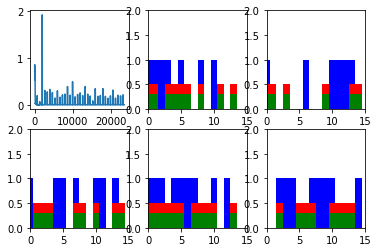

Step 400 Loss 9.51764e-05


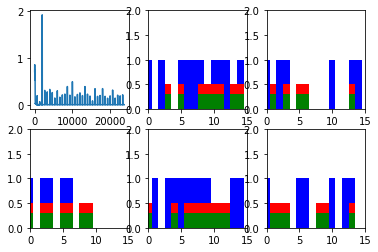

Step 500 Loss 9.51159e-05


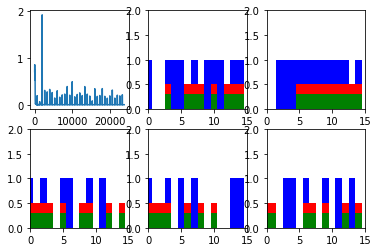

Step 600 Loss 0.000101015


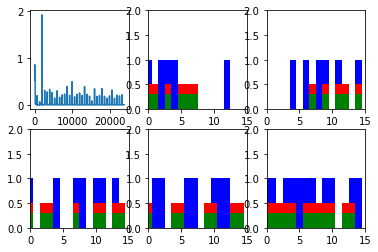

New data, epoch 36
Step 0 Loss 0.244374


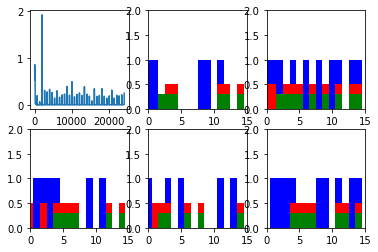

Step 100 Loss 9.23383e-05


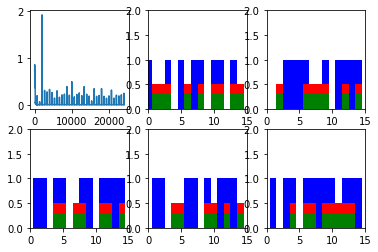

Step 200 Loss 9.7788e-05


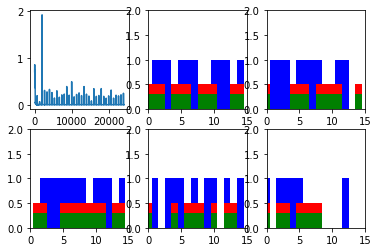

Step 300 Loss 7.87304e-05


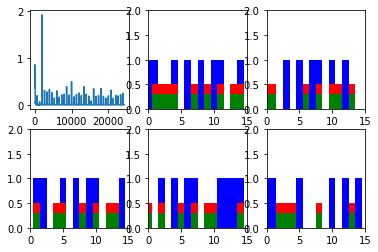

Step 400 Loss 0.000106198


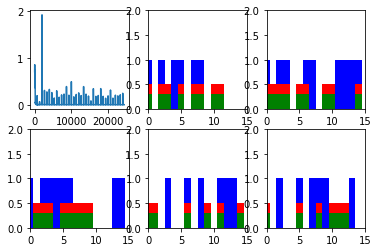

Step 500 Loss 9.10394e-05


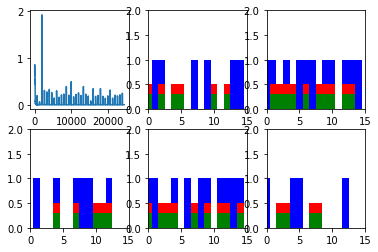

Step 600 Loss 0.000106073


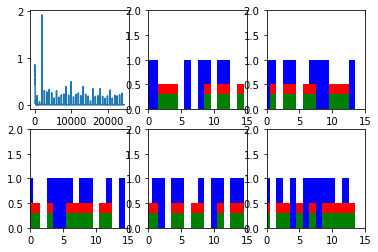

New data, epoch 37
Step 0 Loss 0.134475


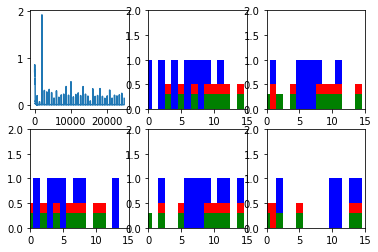

Step 100 Loss 9.13431e-05


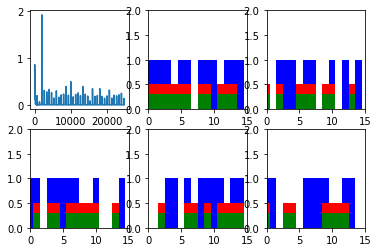

Step 200 Loss 9.2952e-05


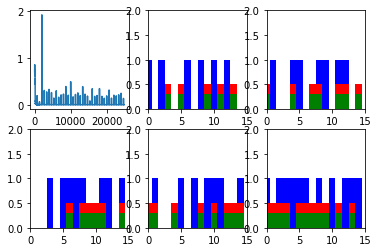

Step 300 Loss 9.367e-05


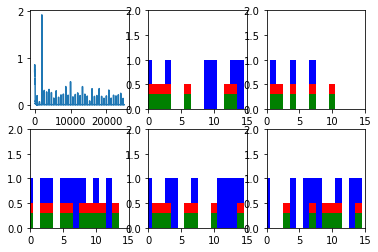

Step 400 Loss 8.21396e-05


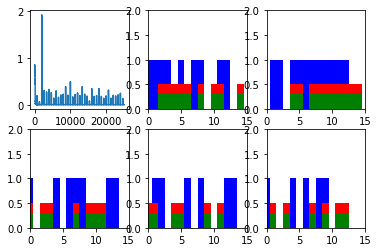

Step 500 Loss 8.38984e-05


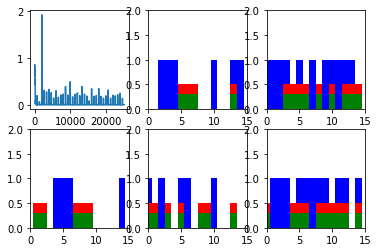

Step 600 Loss 8.92307e-05


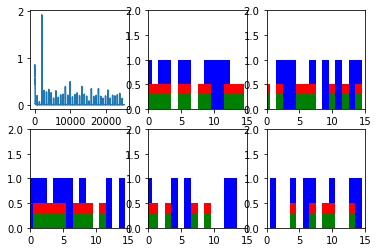

New data, epoch 38
Step 0 Loss 0.177071


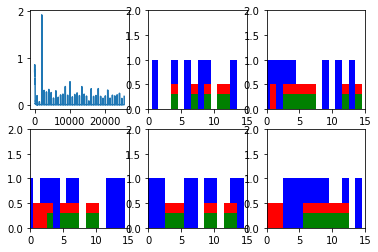

Step 100 Loss 9.39102e-05


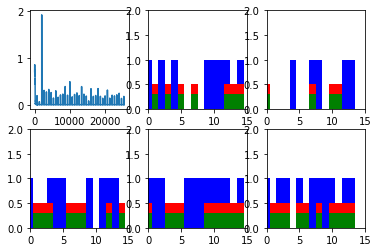

Step 200 Loss 8.78793e-05


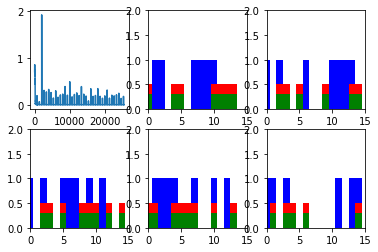

Step 300 Loss 9.05329e-05


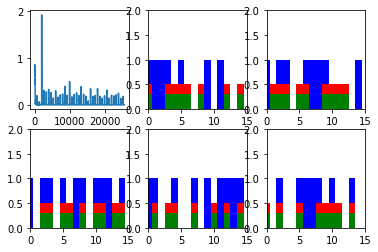

Step 400 Loss 7.76941e-05


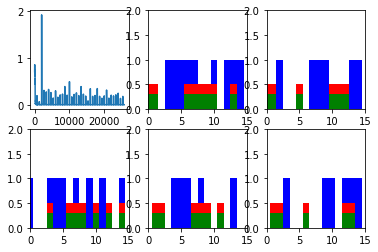

Step 500 Loss 9.46465e-05


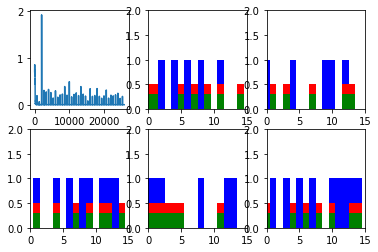

Step 600 Loss 8.43647e-05


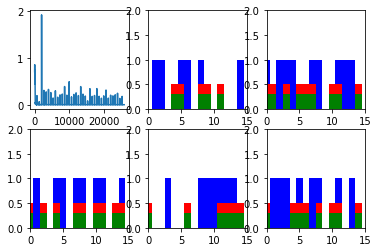

New data, epoch 39
Step 0 Loss 0.289976


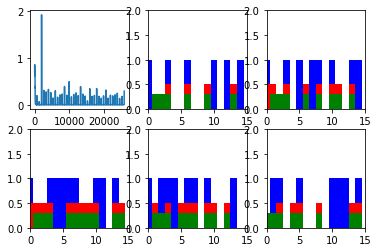

Step 100 Loss 9.73767e-05


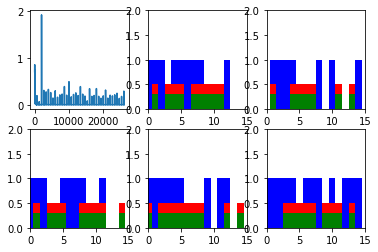

Step 200 Loss 8.90066e-05


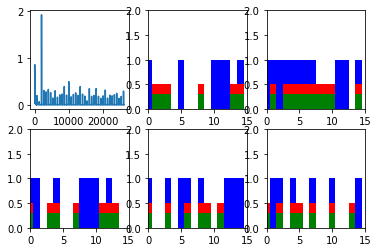

Step 300 Loss 9.58337e-05


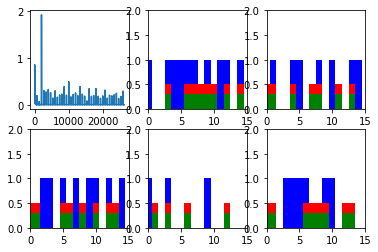

Step 400 Loss 9.33134e-05


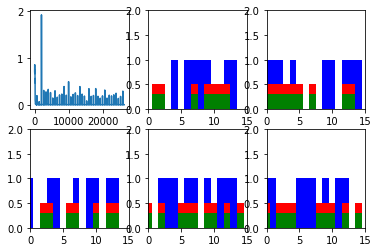

Step 500 Loss 0.000110659


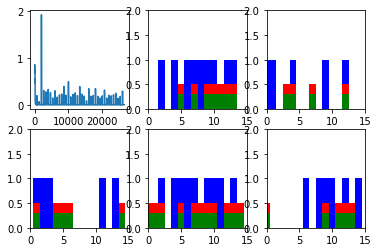

Step 600 Loss 0.000108617


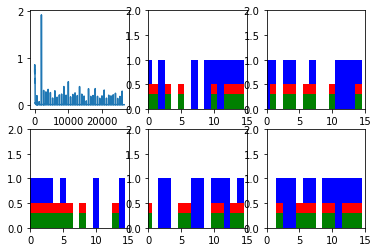

New data, epoch 40
Step 0 Loss 0.221857


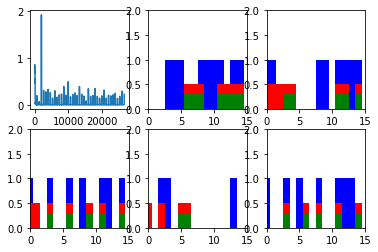

Step 100 Loss 0.000107061


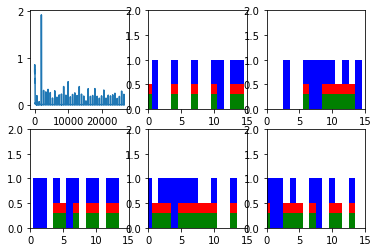

Step 200 Loss 9.79421e-05


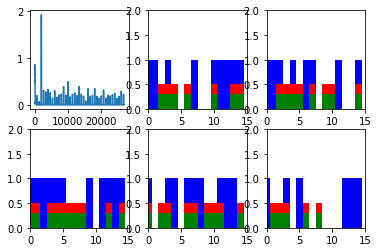

Step 300 Loss 9.71129e-05


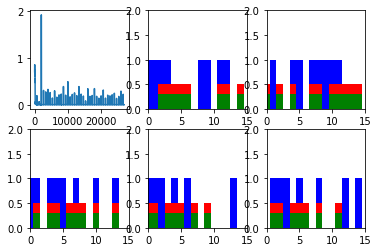

Step 400 Loss 9.25989e-05


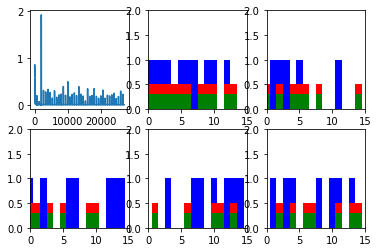

Step 500 Loss 7.78686e-05


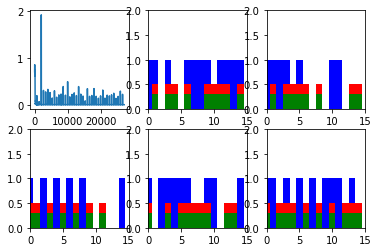

Step 600 Loss 9.87442e-05


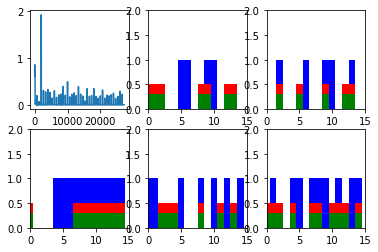

New data, epoch 41
Step 0 Loss 0.168919


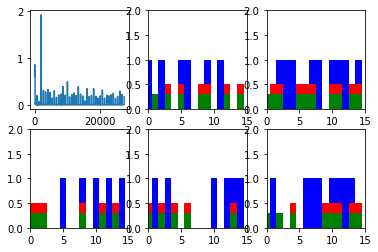

Step 100 Loss 7.8041e-05


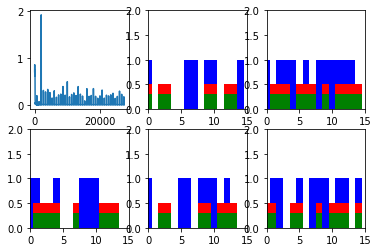

Step 200 Loss 7.96732e-05


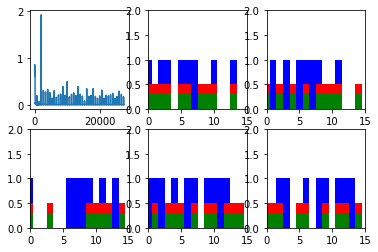

Step 300 Loss 7.62739e-05


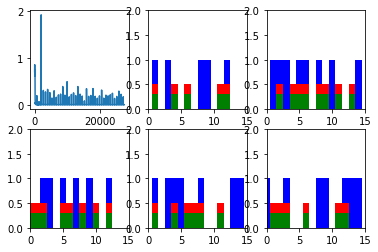

Step 400 Loss 7.83655e-05


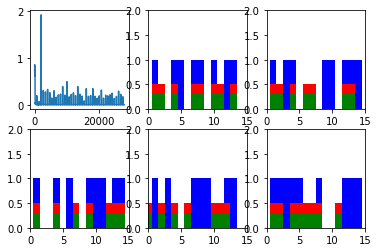

Step 500 Loss 8.51368e-05


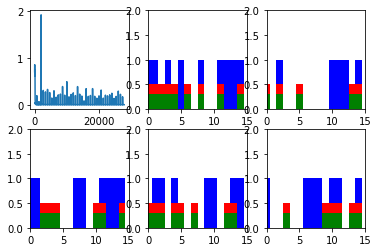

Step 600 Loss 8.87461e-05


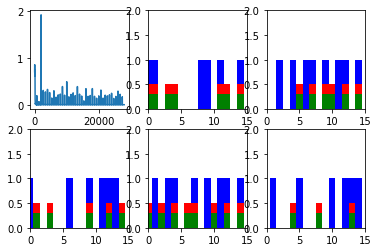

New data, epoch 42
Step 0 Loss 0.118035


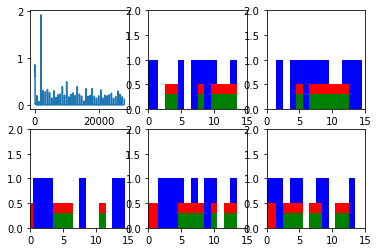

Step 100 Loss 8.36202e-05


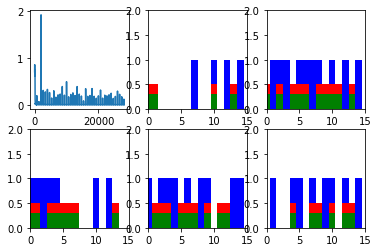

Step 200 Loss 8.20458e-05


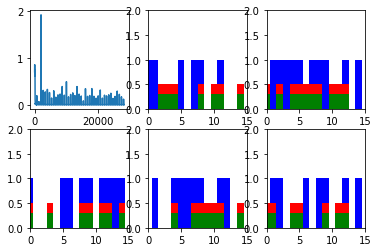

Step 300 Loss 7.41045e-05


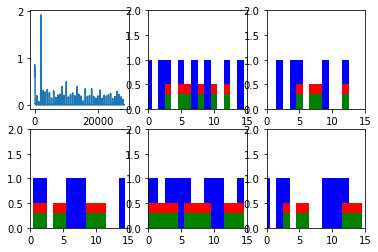

Step 400 Loss 7.71794e-05


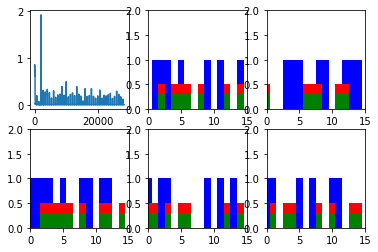

Step 500 Loss 7.54022e-05


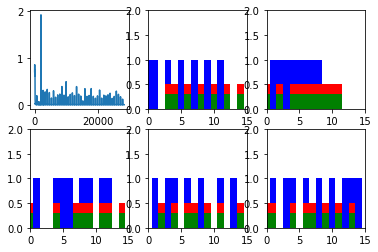

Step 600 Loss 8.15643e-05


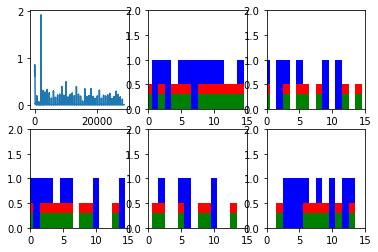

New data, epoch 43
Step 0 Loss 0.327823


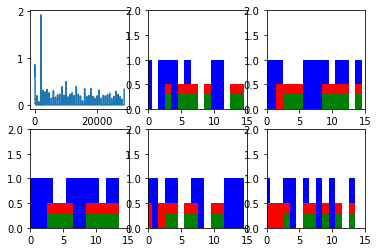

Step 100 Loss 9.38904e-05


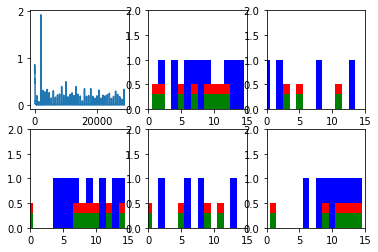

Step 200 Loss 8.10226e-05


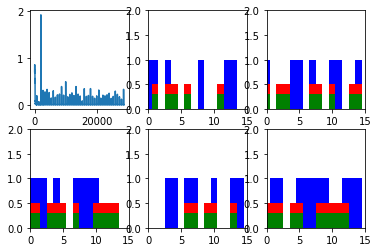

Step 300 Loss 8.35657e-05


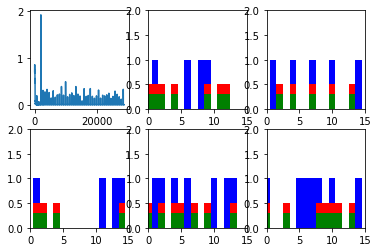

Step 400 Loss 7.48893e-05


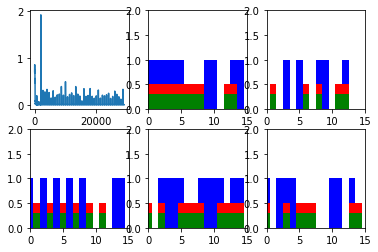

Step 500 Loss 8.12036e-05


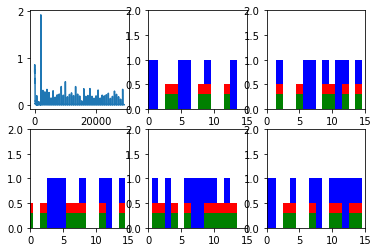

Step 600 Loss 7.67759e-05


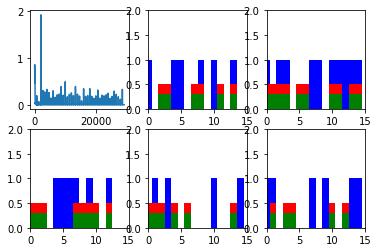

New data, epoch 44
Step 0 Loss 0.122518


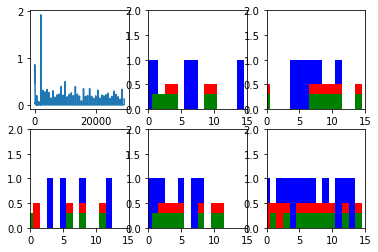

Step 100 Loss 8.07574e-05


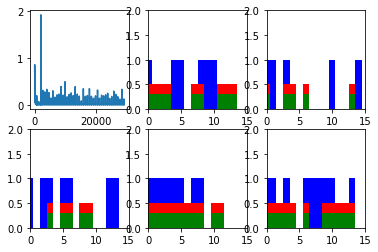

Step 200 Loss 7.63547e-05


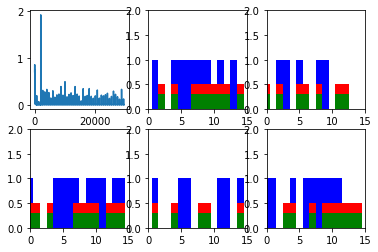

Step 300 Loss 7.60862e-05


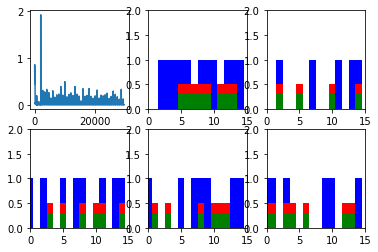

Step 400 Loss 6.99198e-05


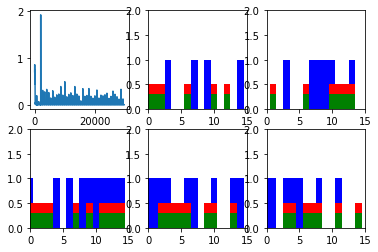

Step 500 Loss 8.17511e-05


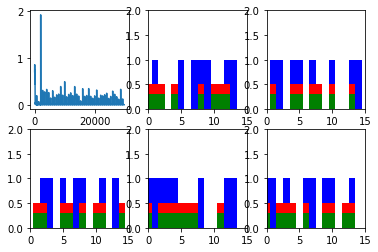

Step 600 Loss 7.81653e-05


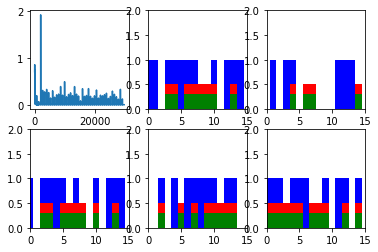

New data, epoch 45
Step 0 Loss 0.163399


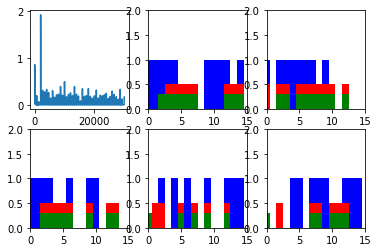

Step 100 Loss 6.92666e-05


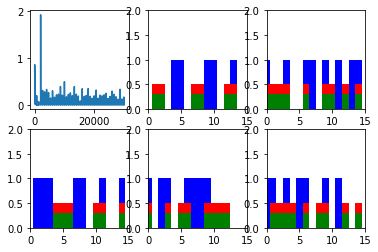

Step 200 Loss 7.05602e-05


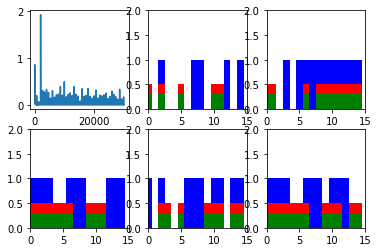

Step 300 Loss 7.2911e-05


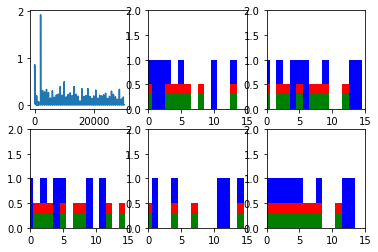

Step 400 Loss 6.69046e-05


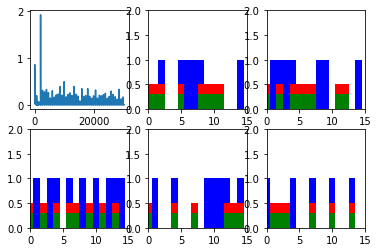

Step 500 Loss 7.14235e-05


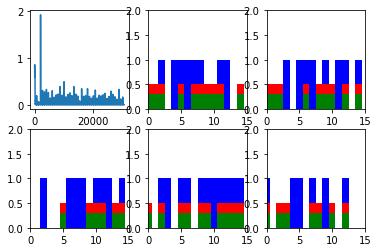

Step 600 Loss 6.18776e-05


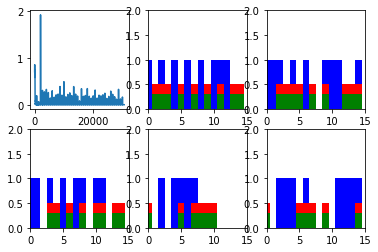

New data, epoch 46
Step 0 Loss 0.212868


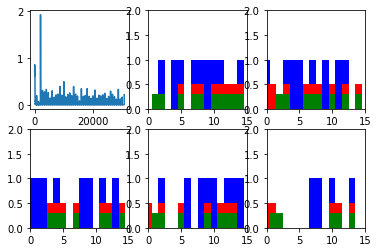

Step 100 Loss 7.87853e-05


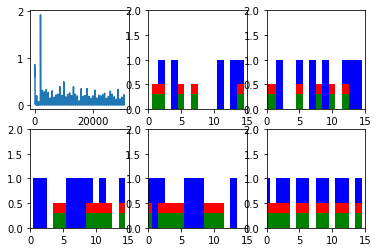

Step 200 Loss 6.7399e-05


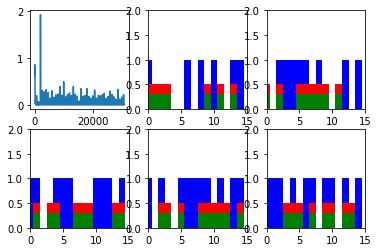

Step 300 Loss 7.77419e-05


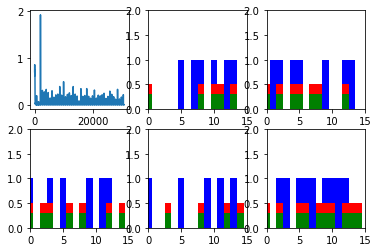

Step 400 Loss 7.28884e-05


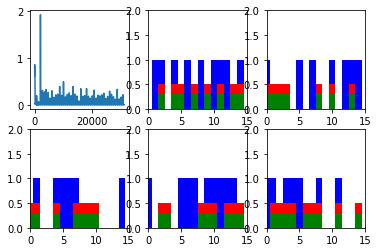

Step 500 Loss 6.94445e-05


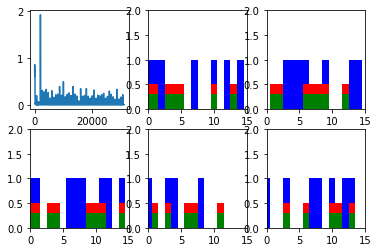

Step 600 Loss 8.51981e-05


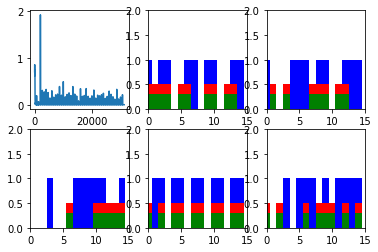

New data, epoch 47
Step 0 Loss 0.192721


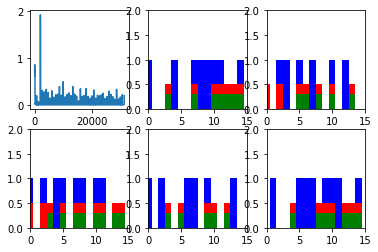

Step 100 Loss 7.65061e-05


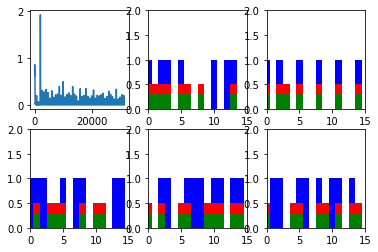

Step 200 Loss 7.7356e-05


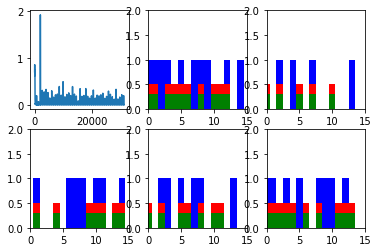

Step 300 Loss 7.16774e-05


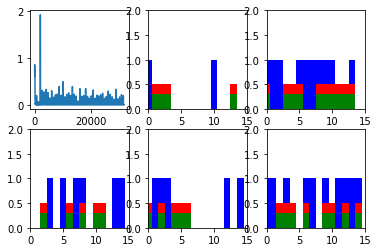

Step 400 Loss 6.88197e-05


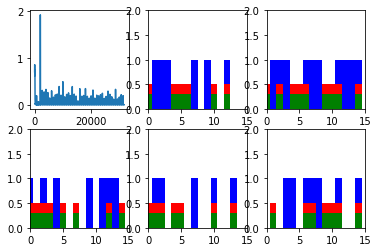

Step 500 Loss 7.67079e-05


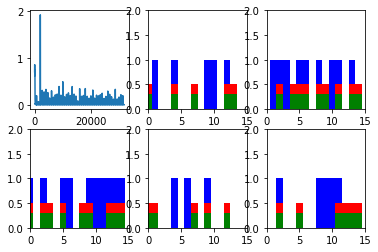

Step 600 Loss 6.21941e-05


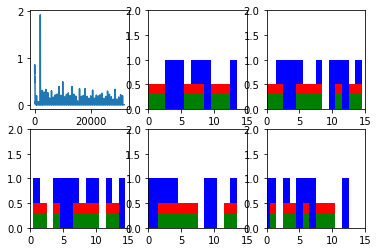

New data, epoch 48
Step 0 Loss 0.192386


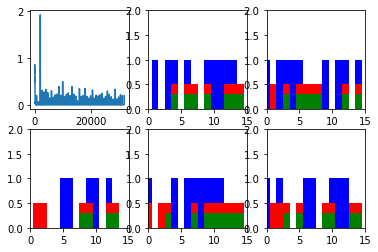

Step 100 Loss 0.000111402


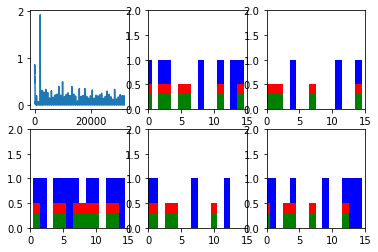

Step 200 Loss 7.77393e-05


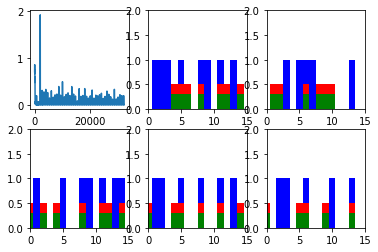

Step 300 Loss 7.87888e-05


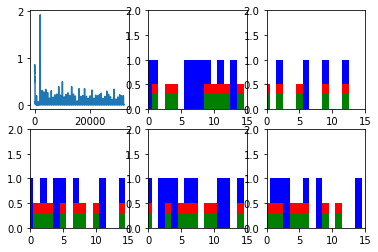

Step 400 Loss 6.87596e-05


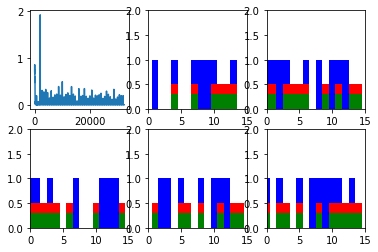

Step 500 Loss 8.02011e-05


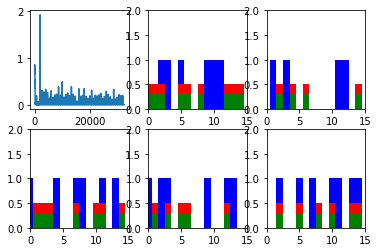

Step 600 Loss 7.20808e-05


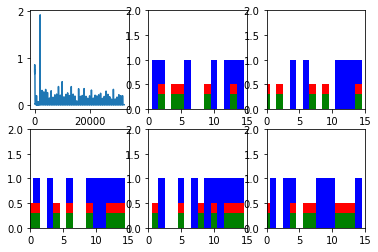

New data, epoch 49
Step 0 Loss 0.433374


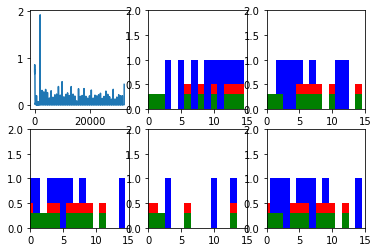

Step 100 Loss 7.44516e-05


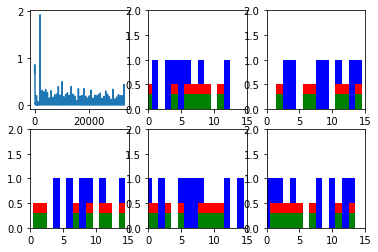

Step 200 Loss 9.63813e-05


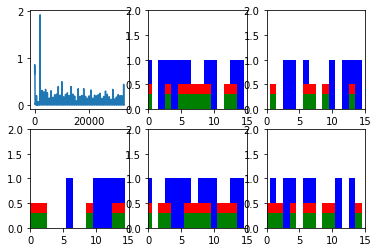

Step 300 Loss 8.20076e-05


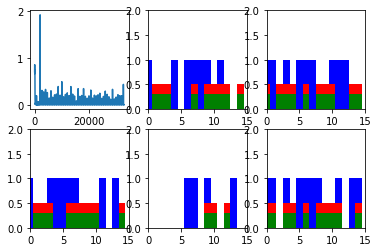

Step 400 Loss 7.0657e-05


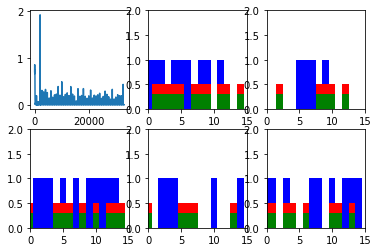

Step 500 Loss 6.71018e-05


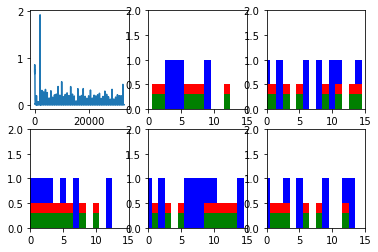

Step 600 Loss 7.20789e-05


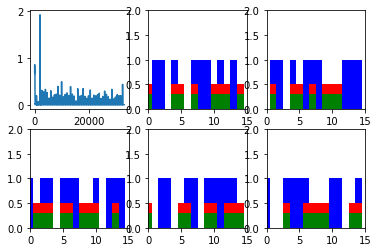

New data, epoch 50
Step 0 Loss 0.440419


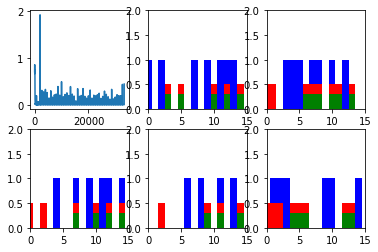

Step 100 Loss 6.96504e-05


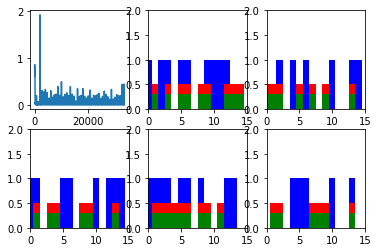

Step 200 Loss 6.92855e-05


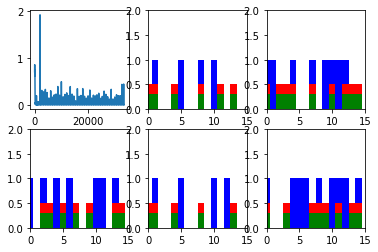

Step 300 Loss 7.26198e-05


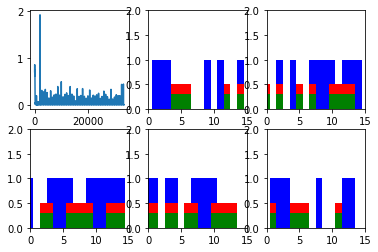

Step 400 Loss 6.43809e-05


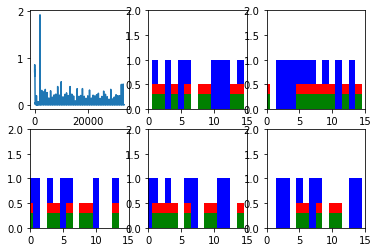

Step 500 Loss 7.12611e-05


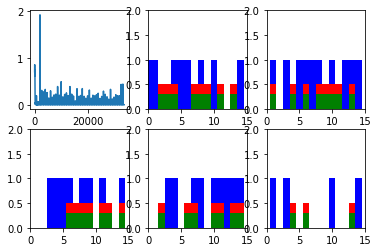

Step 600 Loss 7.24325e-05


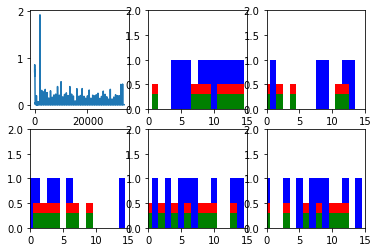

New data, epoch 51
Step 0 Loss 0.175245


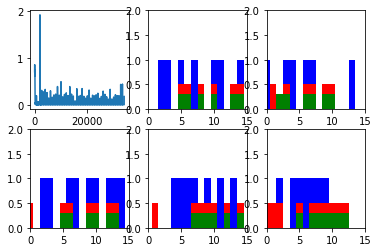

Step 100 Loss 6.4163e-05


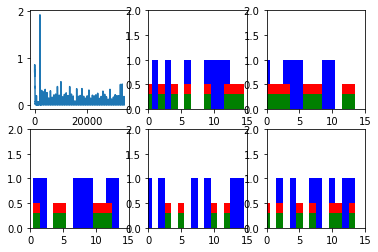

Step 200 Loss 6.59702e-05


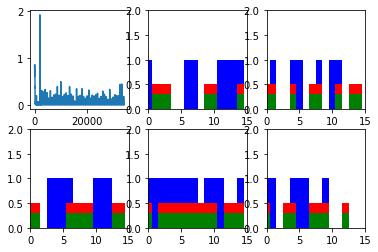

Step 300 Loss 7.06254e-05


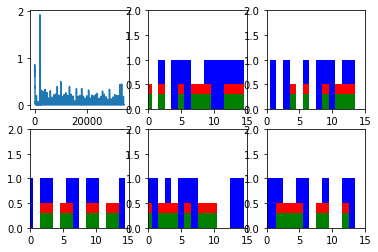

Step 400 Loss 7.49814e-05


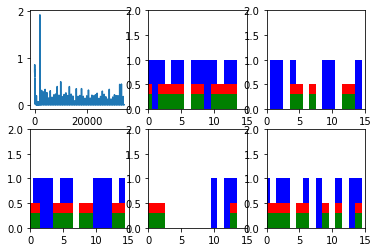

Step 500 Loss 7.01265e-05


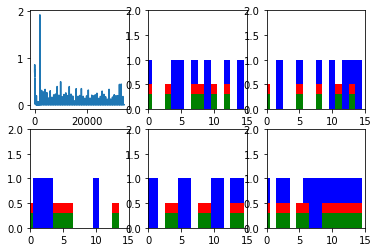

Step 600 Loss 6.12976e-05


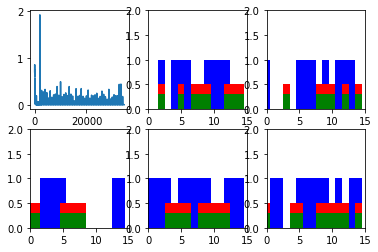

New data, epoch 52
Step 0 Loss 0.149354


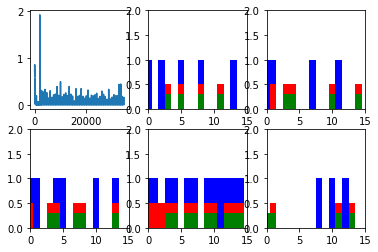

Step 100 Loss 7.92444e-05


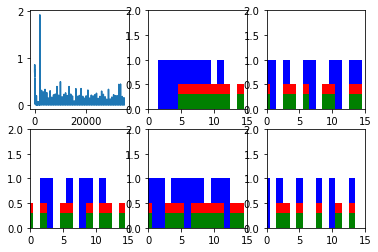

Step 200 Loss 7.15339e-05


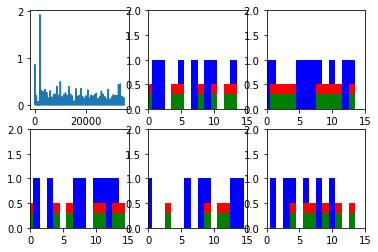

Step 300 Loss 7.09395e-05


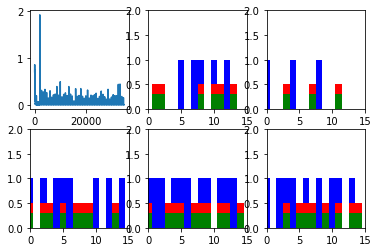

Step 400 Loss 6.8376e-05


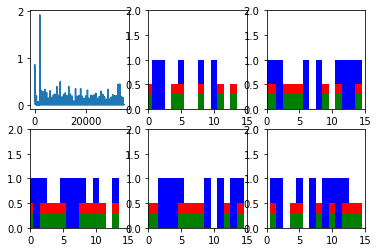

Step 500 Loss 7.59659e-05


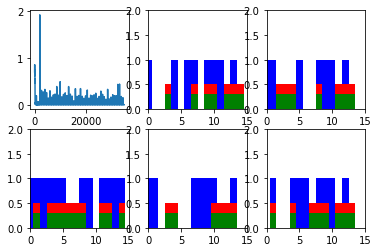

Step 600 Loss 6.65709e-05


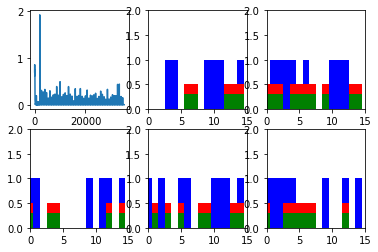

New data, epoch 53
Step 0 Loss 0.181705


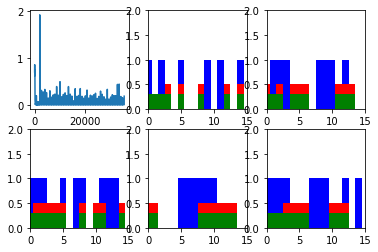

Step 100 Loss 7.11583e-05


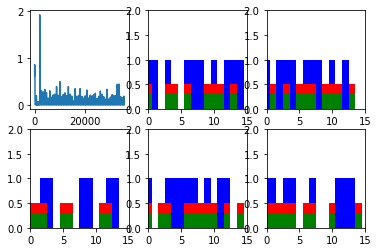

Step 200 Loss 7.11775e-05


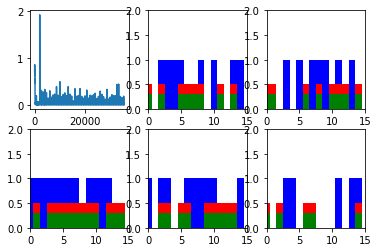

Step 300 Loss 7.0808e-05


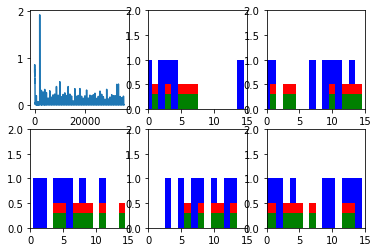

Step 400 Loss 8.055e-05


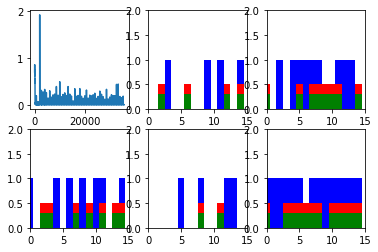

Step 500 Loss 8.45618e-05


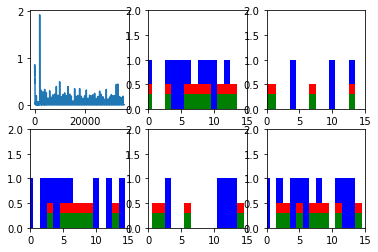

Step 600 Loss 6.93824e-05


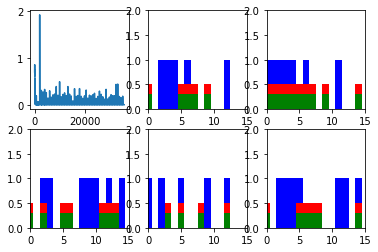

New data, epoch 54
Step 0 Loss 0.300173


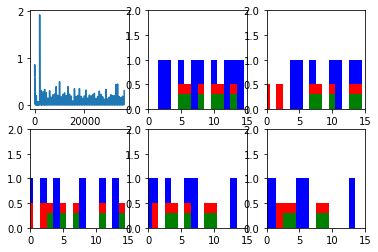

Step 100 Loss 6.43409e-05


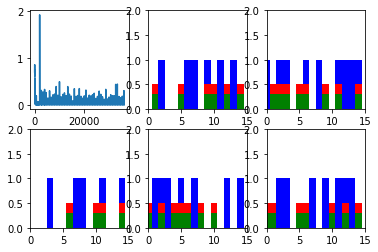

Step 200 Loss 6.31174e-05


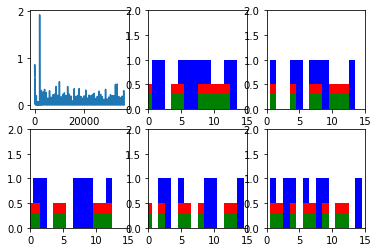

Step 300 Loss 7.2278e-05


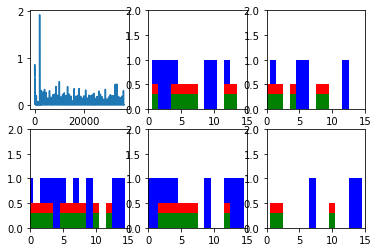

Step 400 Loss 6.467e-05


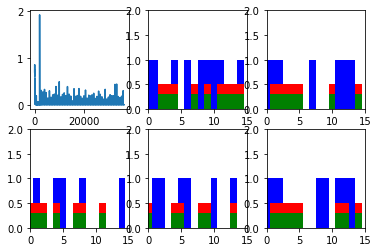

Step 500 Loss 7.20187e-05


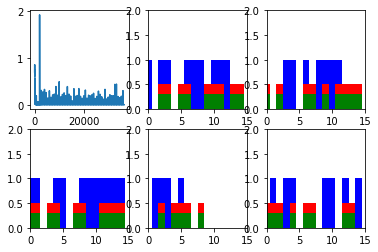

Step 600 Loss 5.96878e-05


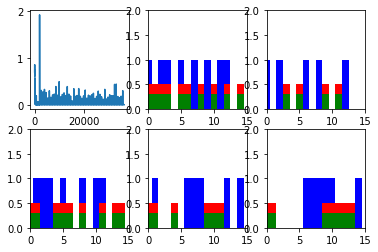

New data, epoch 55
Step 0 Loss 0.134422


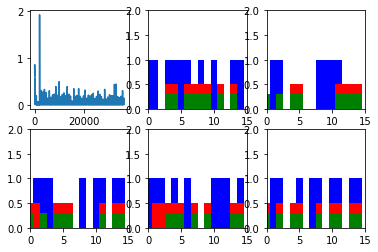

Step 100 Loss 5.53455e-05


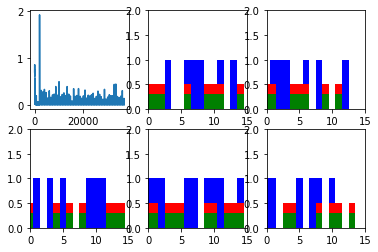

Step 200 Loss 7.34122e-05


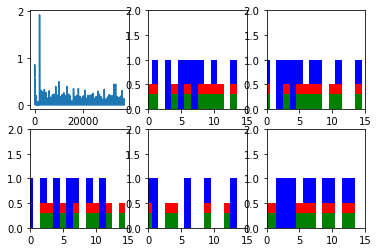

Step 300 Loss 6.296e-05


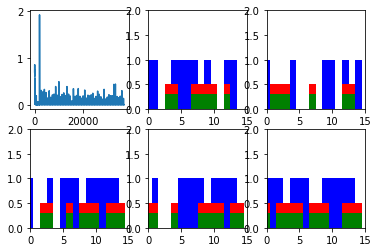

Step 400 Loss 6.64293e-05


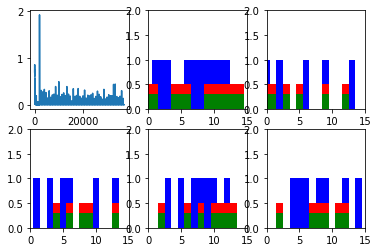

Step 500 Loss 6.99374e-05


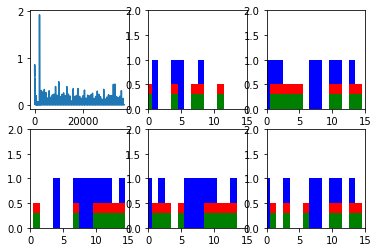

Step 600 Loss 7.39382e-05


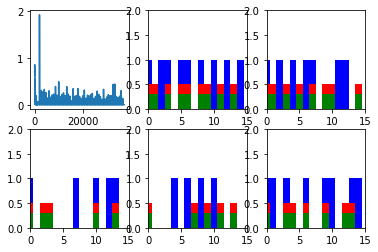

New data, epoch 56
Step 0 Loss 0.148982


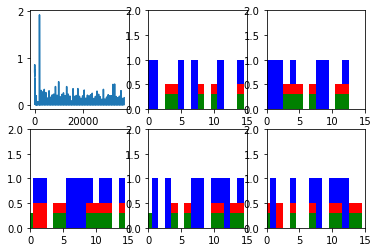

Step 100 Loss 7.86937e-05


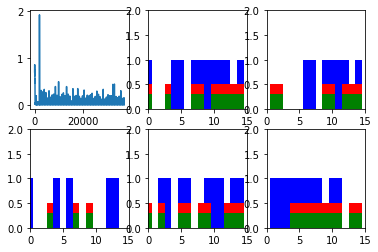

Step 200 Loss 6.07285e-05


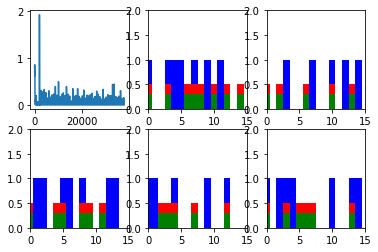

Step 300 Loss 6.88922e-05


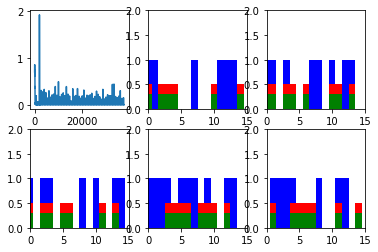

Step 400 Loss 6.8626e-05


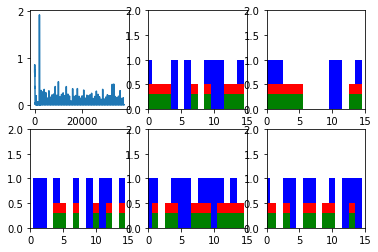

Step 500 Loss 7.45949e-05


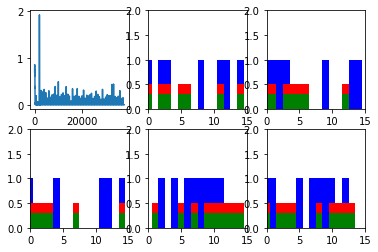

Step 600 Loss 6.95717e-05


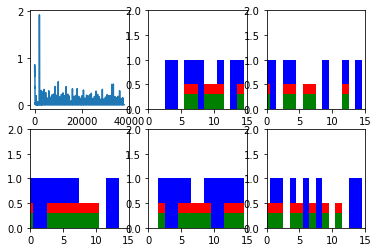

New data, epoch 57
Step 0 Loss 0.156126


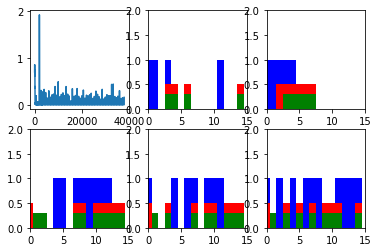

Step 100 Loss 5.89711e-05


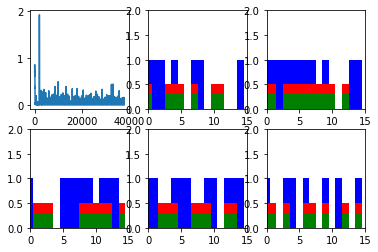

Step 200 Loss 6.85961e-05


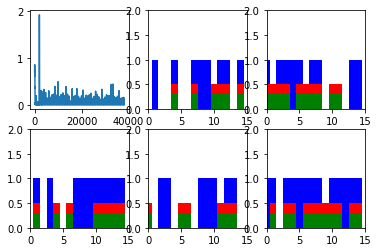

Step 300 Loss 6.69145e-05


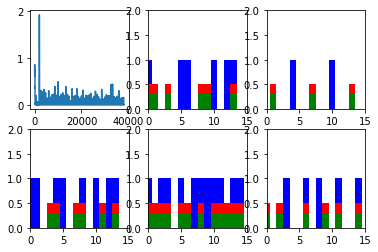

Step 400 Loss 6.02693e-05


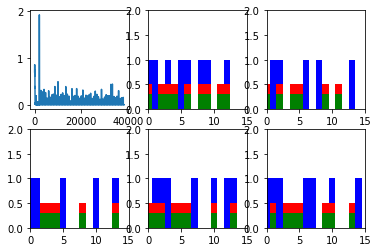

Step 500 Loss 5.43682e-05


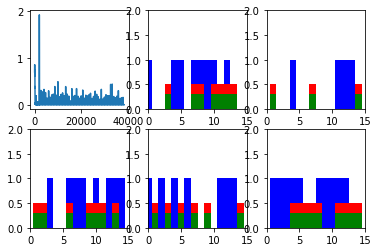

Step 600 Loss 5.67395e-05


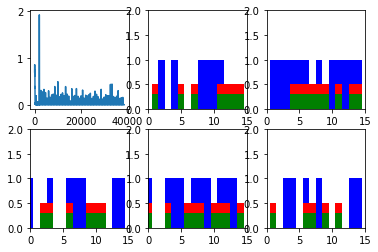

New data, epoch 58
Step 0 Loss 0.155283


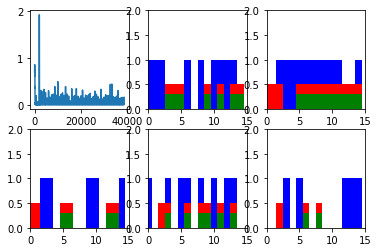

Step 100 Loss 5.56381e-05


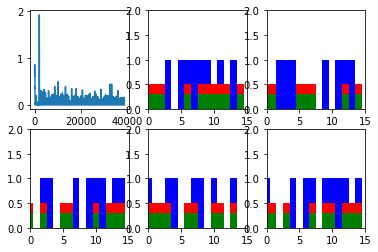

Step 200 Loss 5.70575e-05


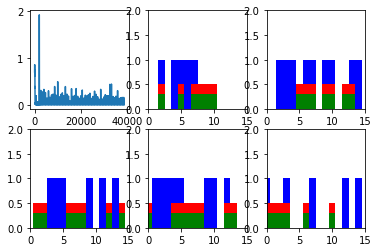

Step 300 Loss 6.23529e-05


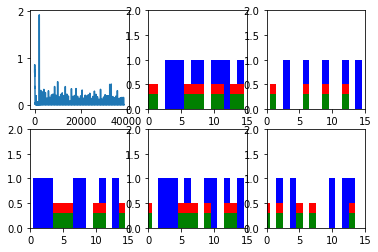

Step 400 Loss 6.01899e-05


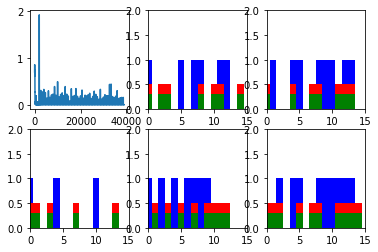

Step 500 Loss 6.00324e-05


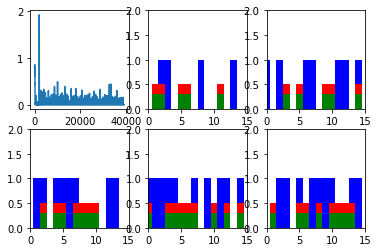

Step 600 Loss 6.05588e-05


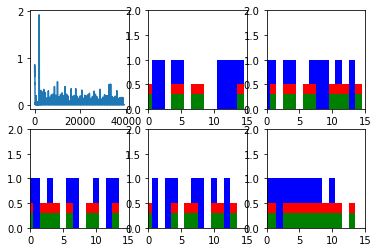

New data, epoch 59
Step 0 Loss 0.15255


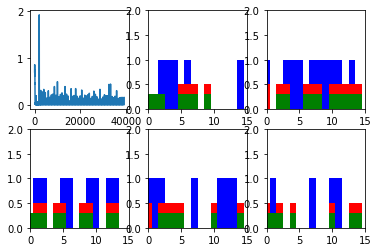

Step 100 Loss 5.8267e-05


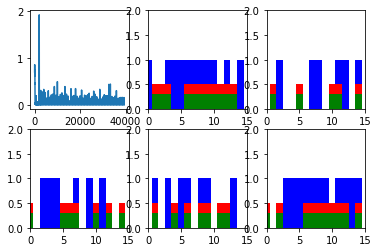

Step 200 Loss 5.33336e-05


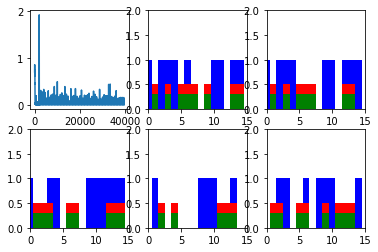

Step 300 Loss 5.90166e-05


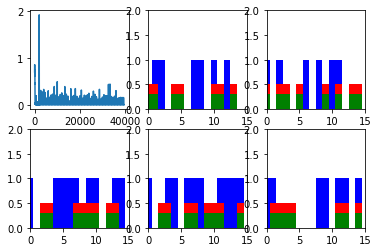

Step 400 Loss 6.03903e-05


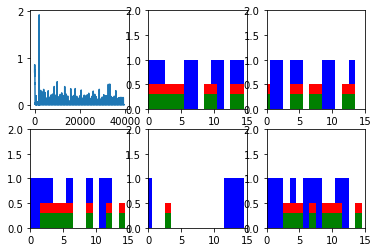

Step 500 Loss 5.48706e-05


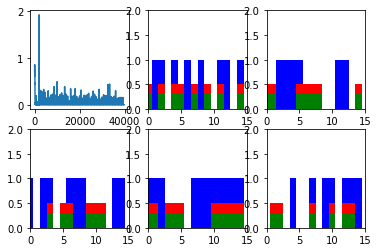

Step 600 Loss 5.31317e-05


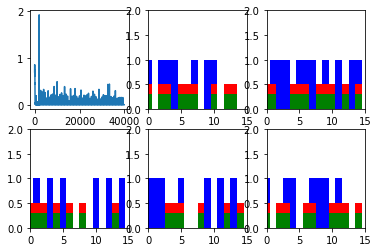

New data, epoch 60
Step 0 Loss 0.133622


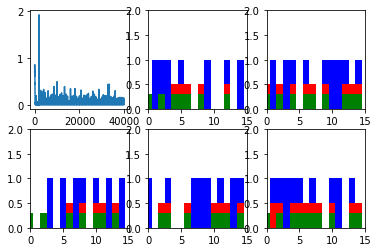

Step 100 Loss 6.21782e-05


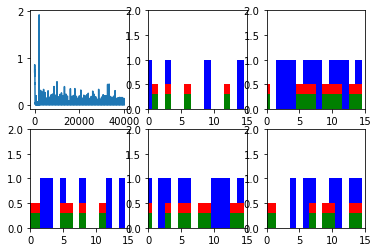

Step 200 Loss 6.18905e-05


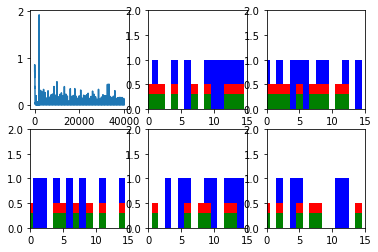

Step 300 Loss 6.36674e-05


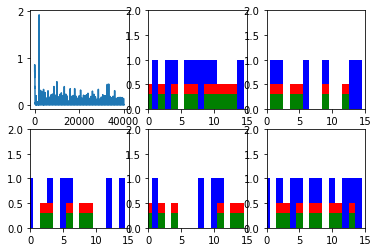

Step 400 Loss 6.41124e-05


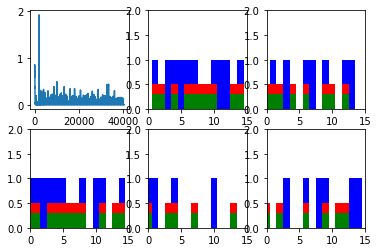

Step 500 Loss 5.70305e-05


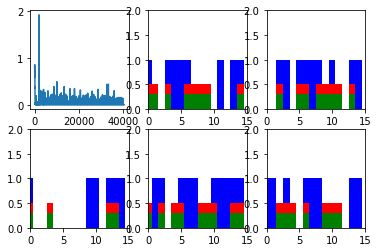

Step 600 Loss 5.8294e-05


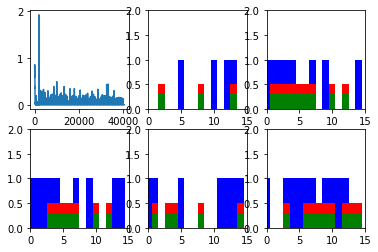

New data, epoch 61
Step 0 Loss 0.227723


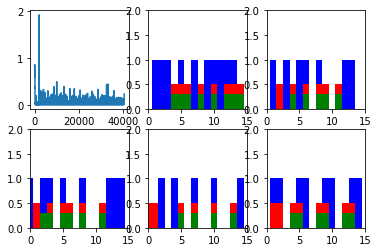

Step 100 Loss 6.37068e-05


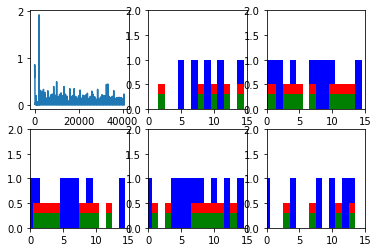

Step 200 Loss 6.41832e-05


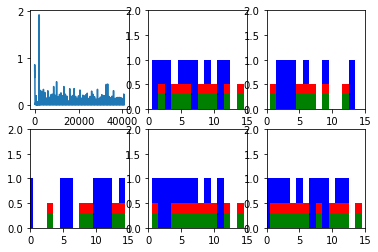

Step 300 Loss 5.95544e-05


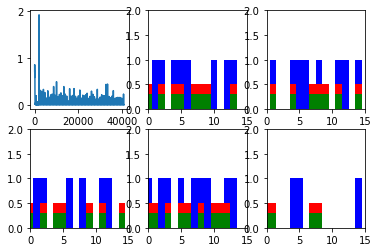

Step 400 Loss 5.95654e-05


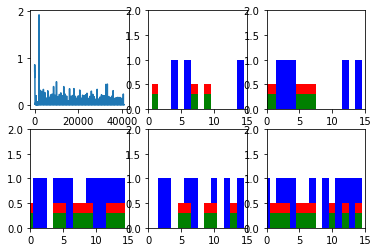

Step 500 Loss 6.3572e-05


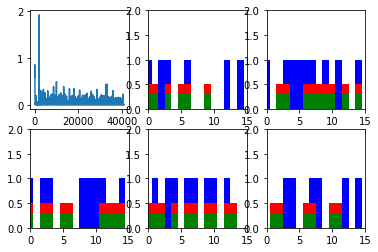

Step 600 Loss 6.5421e-05


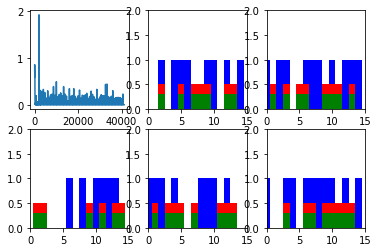

New data, epoch 62
Step 0 Loss 0.259607


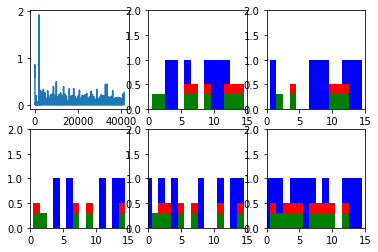

Step 100 Loss 5.85942e-05


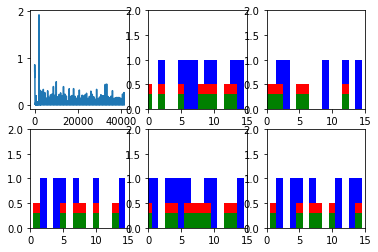

Step 200 Loss 6.29585e-05


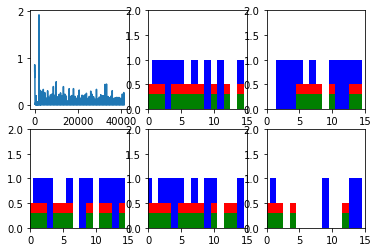

Step 300 Loss 6.97255e-05


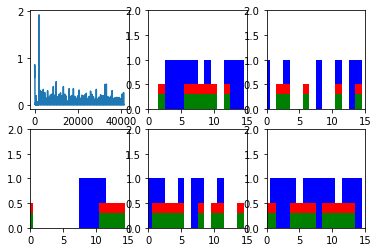

Step 400 Loss 5.87422e-05


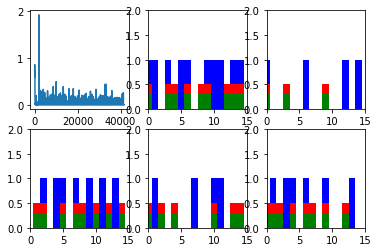

Step 500 Loss 5.8143e-05


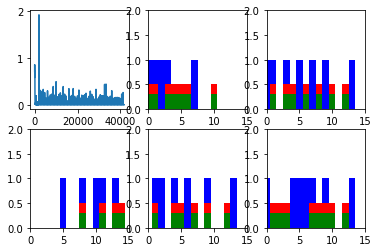

Step 600 Loss 6.43425e-05


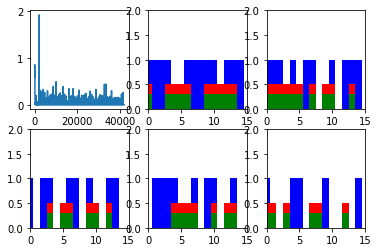

New data, epoch 63
Step 0 Loss 0.280235


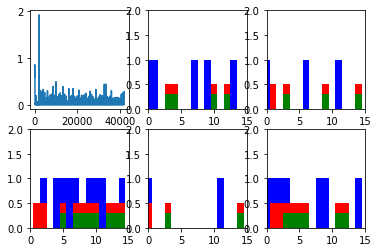

Step 100 Loss 5.66521e-05


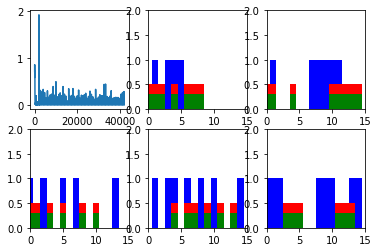

Step 200 Loss 6.49467e-05


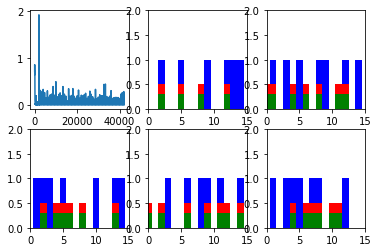

Step 300 Loss 6.50221e-05


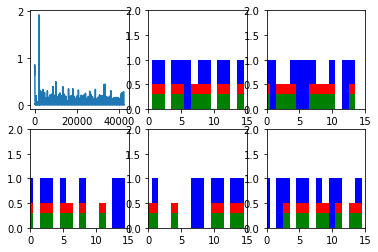

Step 400 Loss 6.50182e-05


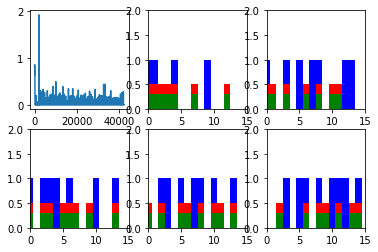

Step 500 Loss 5.67951e-05


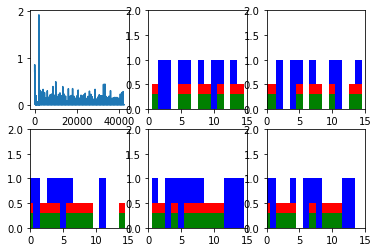

Step 600 Loss 6.57568e-05


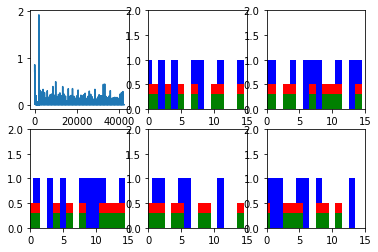

New data, epoch 64
Step 0 Loss 0.207146


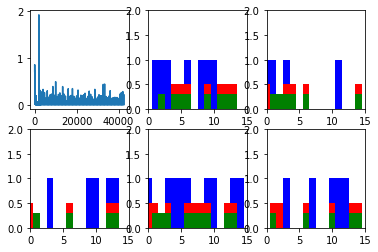

Step 100 Loss 6.6142e-05


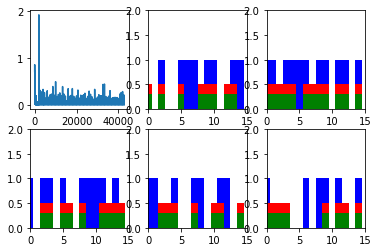

Step 200 Loss 5.33336e-05


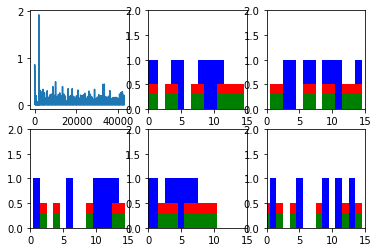

Step 300 Loss 6.10881e-05


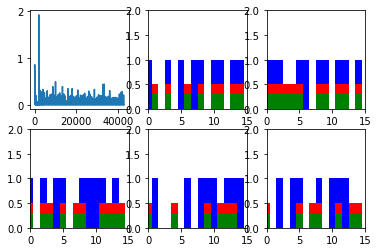

Step 400 Loss 6.49329e-05


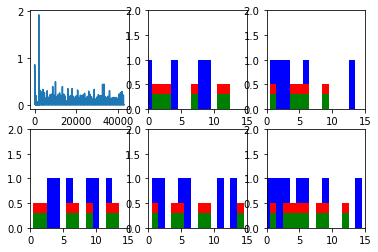

Step 500 Loss 5.65216e-05


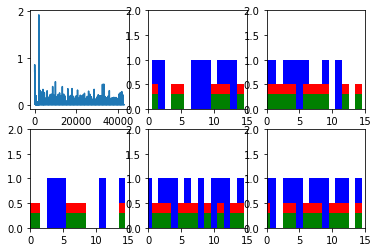

Step 600 Loss 6.35368e-05


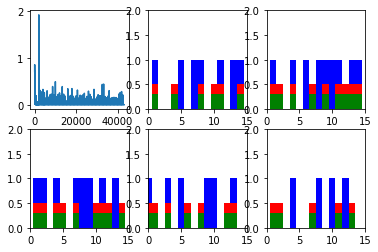

New data, epoch 65
Step 0 Loss 0.344135


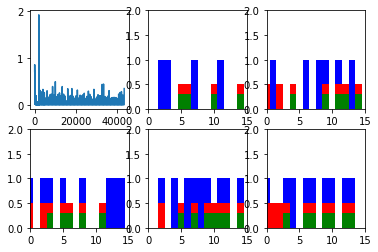

Step 100 Loss 5.73993e-05


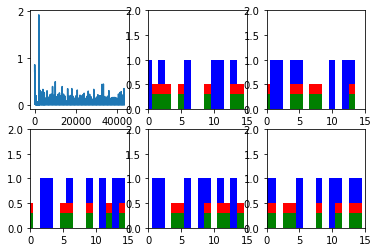

Step 200 Loss 6.38946e-05


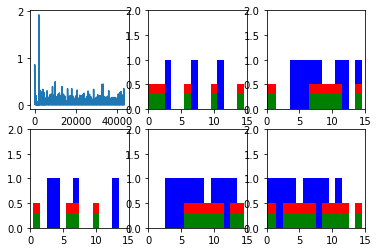

Step 300 Loss 4.95621e-05


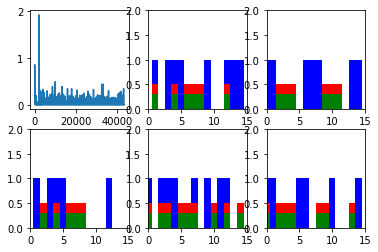

Step 400 Loss 5.63709e-05


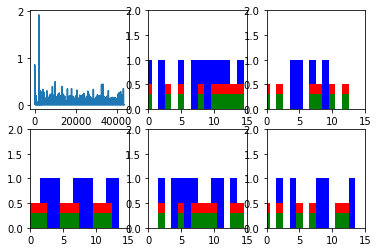

Step 500 Loss 5.29825e-05


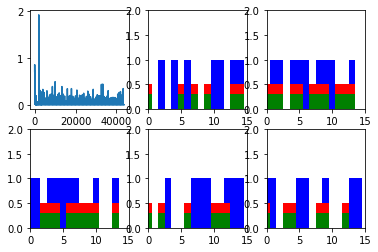

Step 600 Loss 5.66886e-05


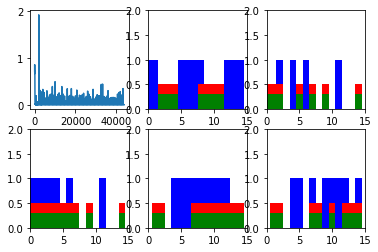

New data, epoch 66
Step 0 Loss 0.16917


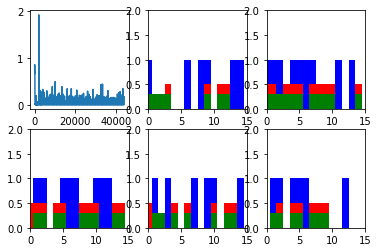

Step 100 Loss 5.83401e-05


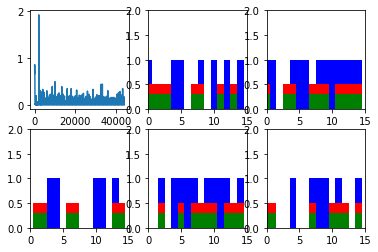

Step 200 Loss 5.74359e-05


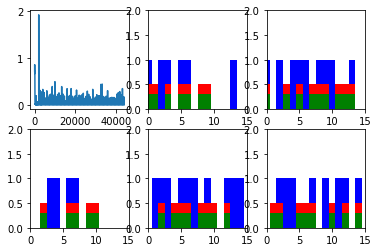

Step 300 Loss 5.92938e-05


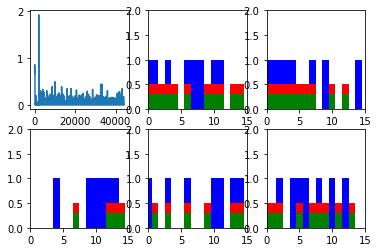

Step 400 Loss 5.77024e-05


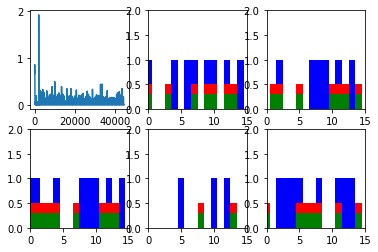

Step 500 Loss 6.27947e-05


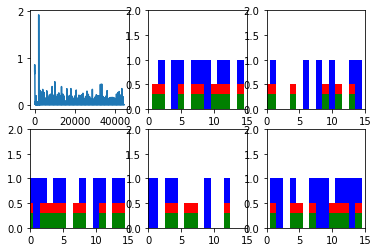

Step 600 Loss 5.15854e-05


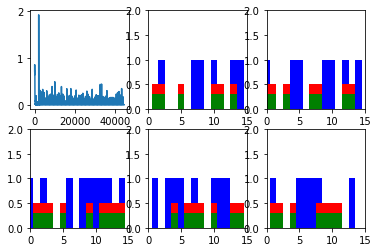

New data, epoch 67
Step 0 Loss 0.127983


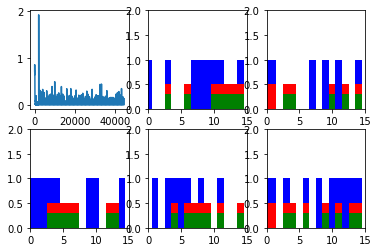

Step 100 Loss 6.25899e-05


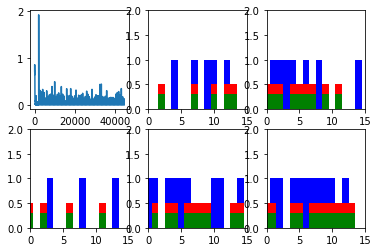

Step 200 Loss 5.73512e-05


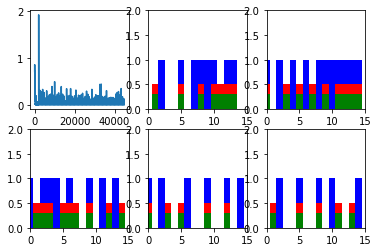

Step 300 Loss 5.29569e-05


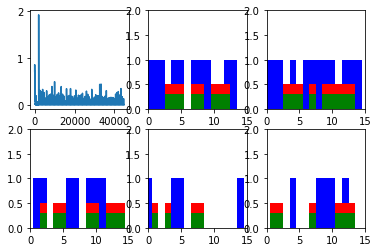

Step 400 Loss 5.45811e-05


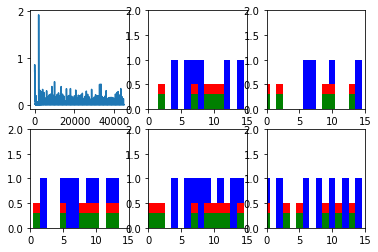

Step 500 Loss 5.6118e-05


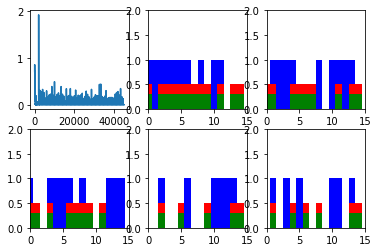

Step 600 Loss 6.05021e-05


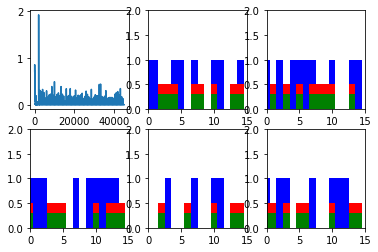

New data, epoch 68
Step 0 Loss 0.299177


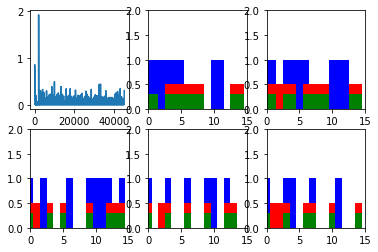

Step 100 Loss 5.32018e-05


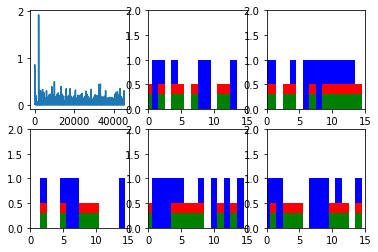

Step 200 Loss 6.72935e-05


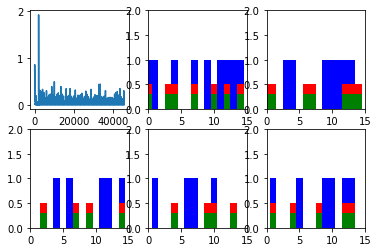

Step 300 Loss 5.20098e-05


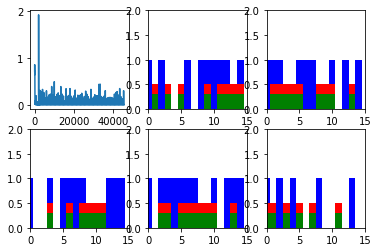

Step 400 Loss 5.87772e-05


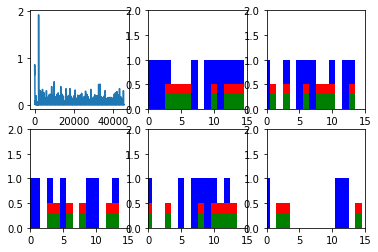

Step 500 Loss 5.79984e-05


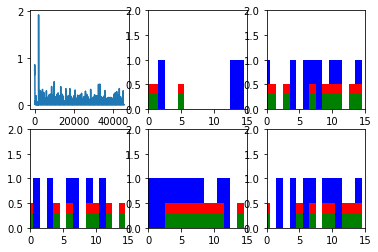

Step 600 Loss 5.12311e-05


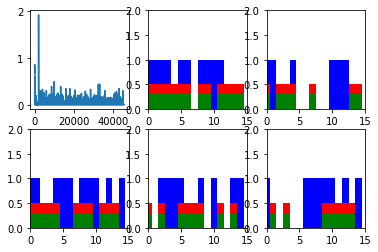

New data, epoch 69
Step 0 Loss 0.203308


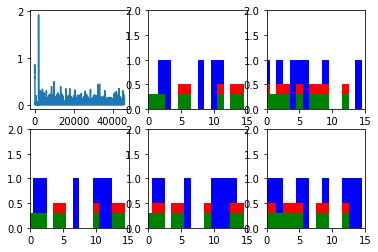

Step 100 Loss 5.56542e-05


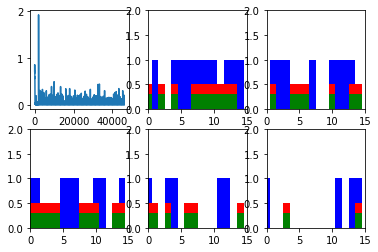

Step 200 Loss 5.65839e-05


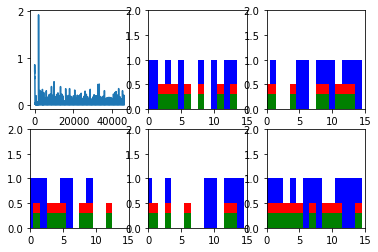

Step 300 Loss 5.46893e-05


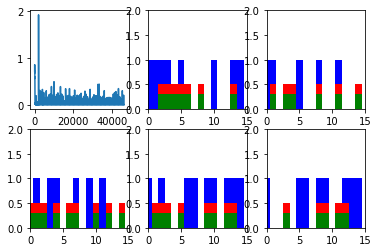

Step 400 Loss 6.8773e-05


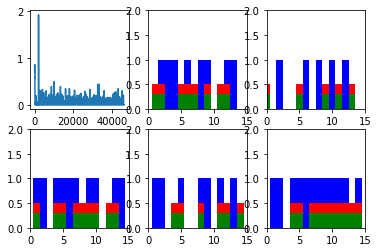

Step 500 Loss 5.54047e-05


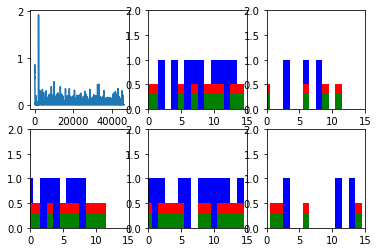

Step 600 Loss 5.09862e-05


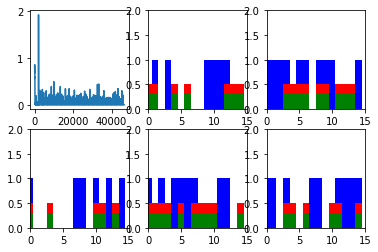

New data, epoch 70
Step 0 Loss 0.154339


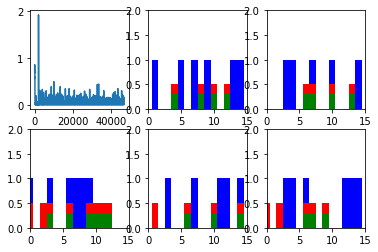

Step 100 Loss 5.51583e-05


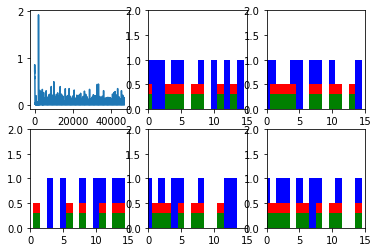

Step 200 Loss 5.08131e-05


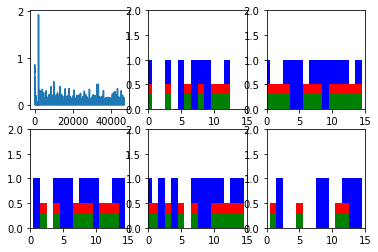

Step 300 Loss 5.24532e-05


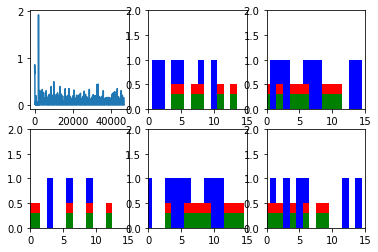

Step 400 Loss 5.48039e-05


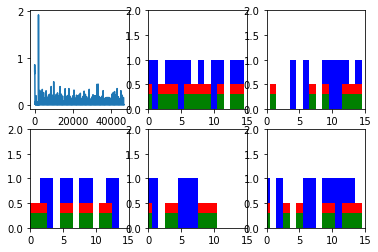

Step 500 Loss 5.27552e-05


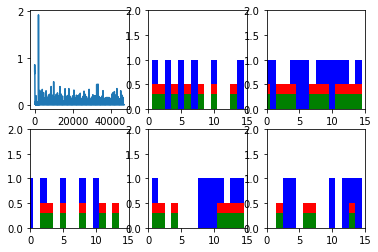

Step 600 Loss 4.75534e-05


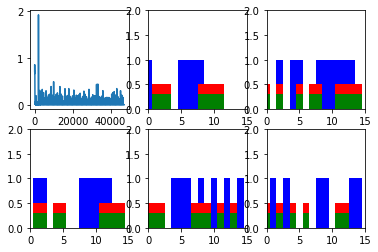

New data, epoch 71
Step 0 Loss 0.164578


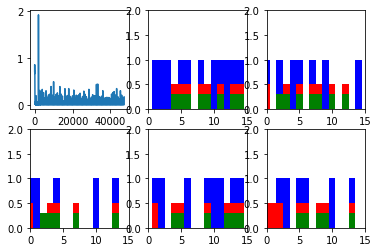

Step 100 Loss 5.11719e-05


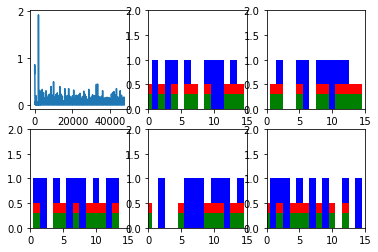

Step 200 Loss 4.92761e-05


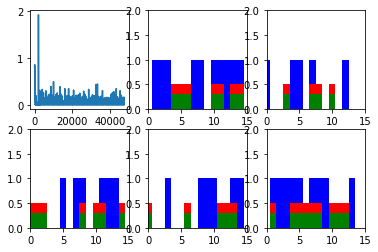

Step 300 Loss 5.90728e-05


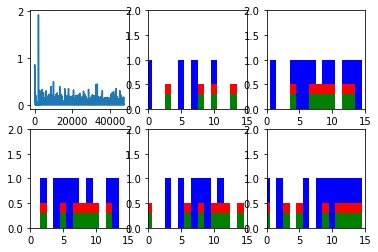

Step 400 Loss 5.02824e-05


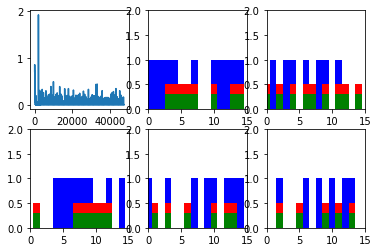

Step 500 Loss 4.61371e-05


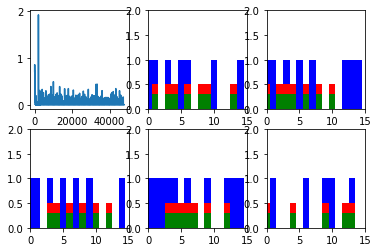

Step 600 Loss 5.21704e-05


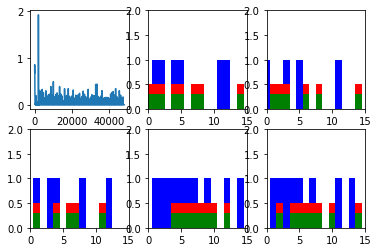

New data, epoch 72
Step 0 Loss 0.191119


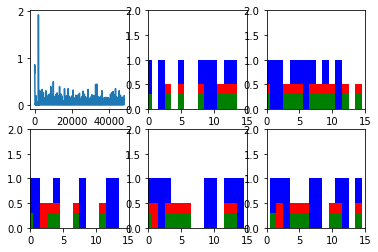

Step 100 Loss 5.57367e-05


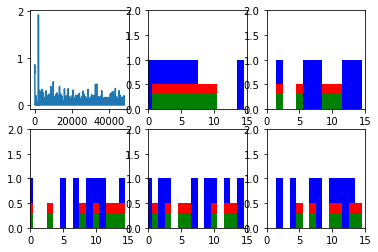

Step 200 Loss 5.72578e-05


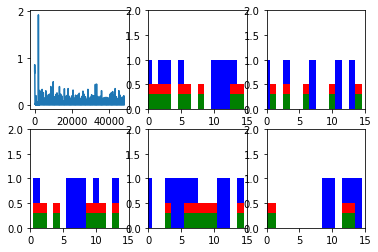

Step 300 Loss 5.49798e-05


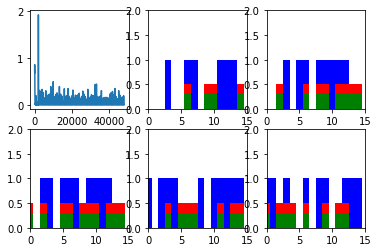

Step 400 Loss 5.86547e-05


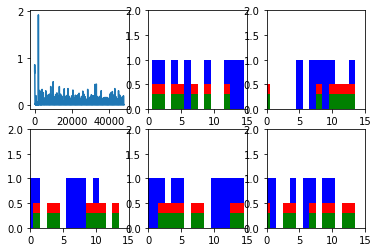

Step 500 Loss 5.21258e-05


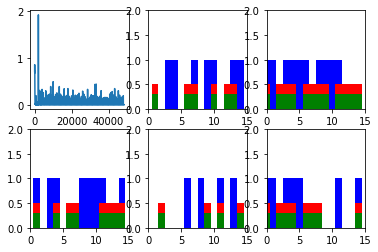

Step 600 Loss 4.97102e-05


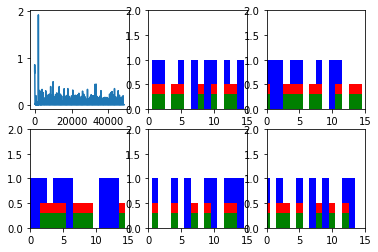

New data, epoch 73
Step 0 Loss 0.173012


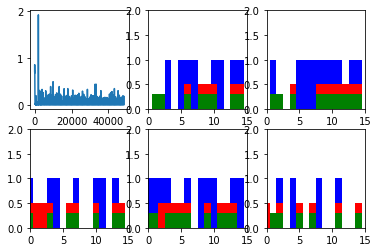

Step 100 Loss 5.33146e-05


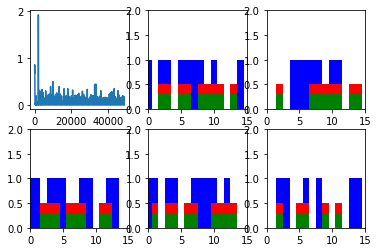

Step 200 Loss 4.94493e-05


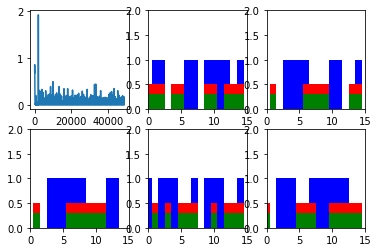

Step 300 Loss 5.47211e-05


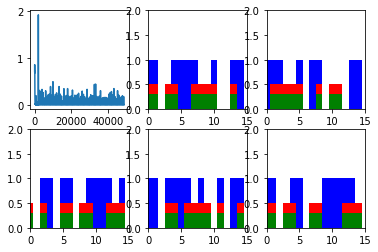

Step 400 Loss 5.62627e-05


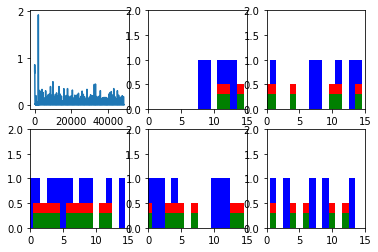

Step 500 Loss 5.34625e-05


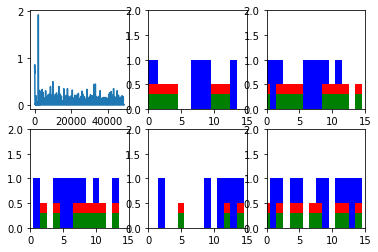

Step 600 Loss 5.40189e-05


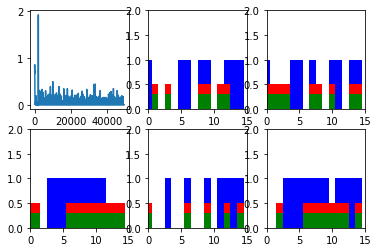

New data, epoch 74
Step 0 Loss 0.232227


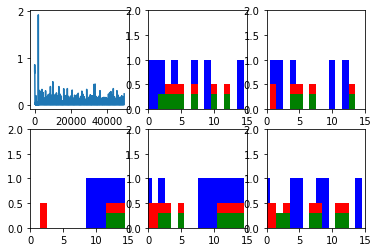

Step 100 Loss 4.94796e-05


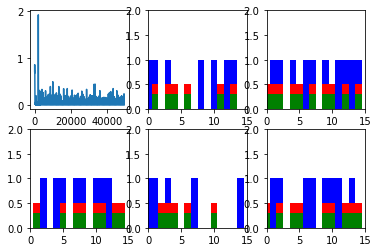

Step 200 Loss 5.2202e-05


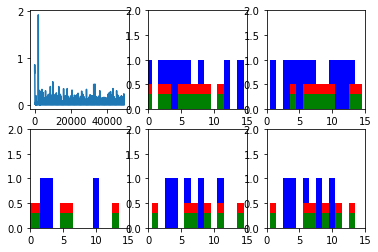

Step 300 Loss 5.34147e-05


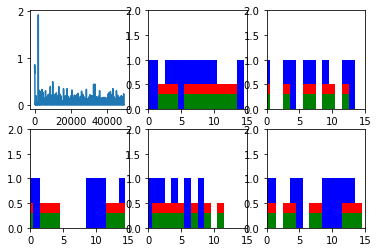

Step 400 Loss 4.92618e-05


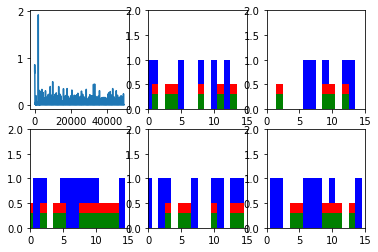

Step 500 Loss 5.08942e-05


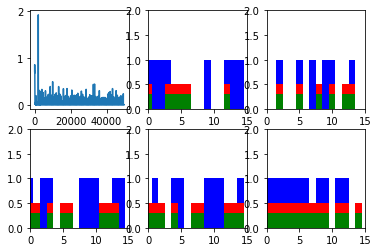

Step 600 Loss 5.45363e-05


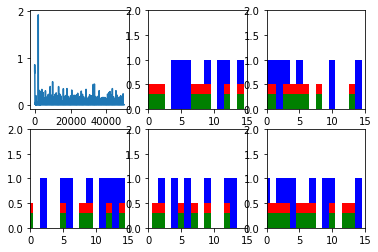

New data, epoch 75
Step 0 Loss 0.153409


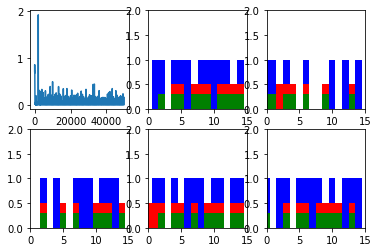

Step 100 Loss 4.93301e-05


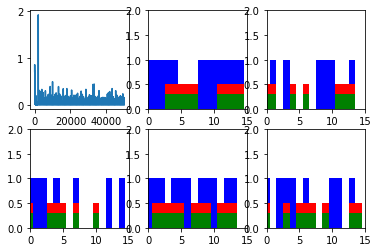

Step 200 Loss 4.72924e-05


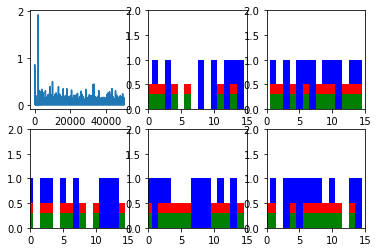

Step 300 Loss 4.48021e-05


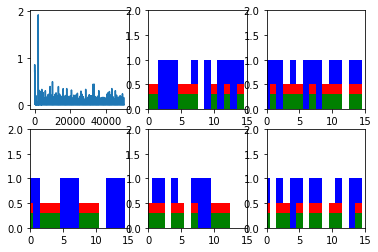

Step 400 Loss 4.94827e-05


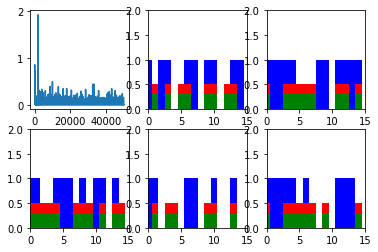

Step 500 Loss 5.13264e-05


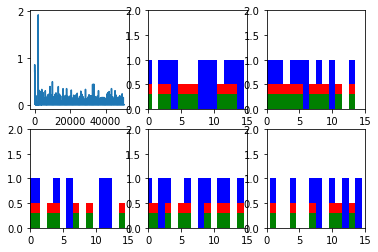

Step 600 Loss 4.20859e-05


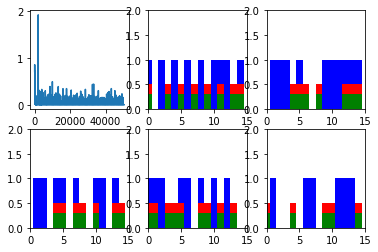

New data, epoch 76
Step 0 Loss 0.13496


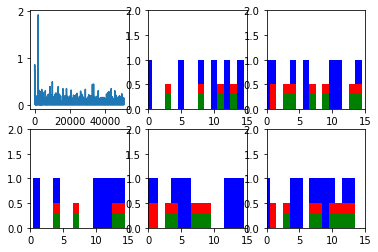

Step 100 Loss 5.01185e-05


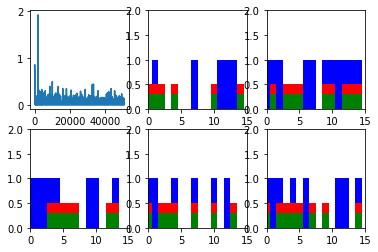

Step 200 Loss 5.33209e-05


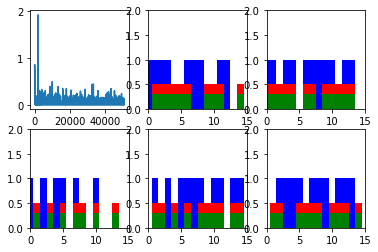

Step 300 Loss 5.1199e-05


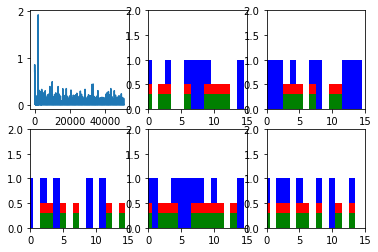

Step 400 Loss 5.2029e-05


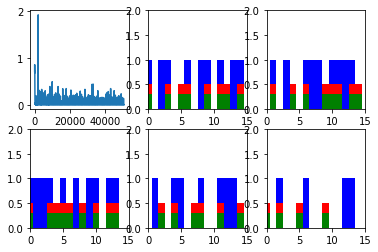

Step 500 Loss 4.88994e-05


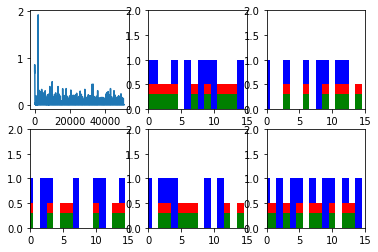

Step 600 Loss 5.06285e-05


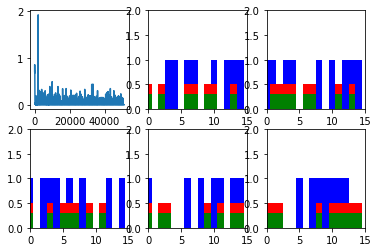

New data, epoch 77
Step 0 Loss 0.223065


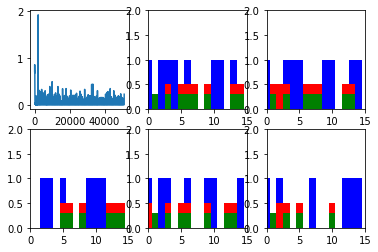

Step 100 Loss 4.86469e-05


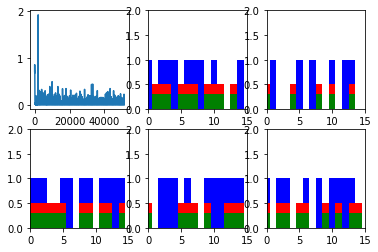

Step 200 Loss 4.90696e-05


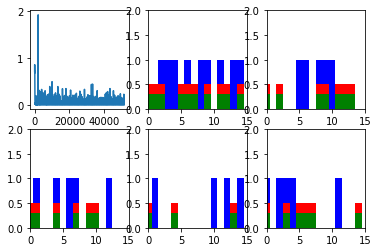

Step 300 Loss 4.37373e-05


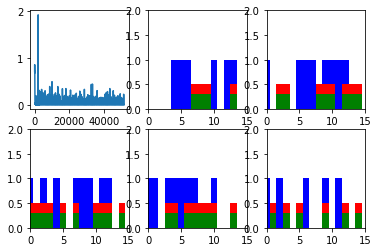

Step 400 Loss 4.38819e-05


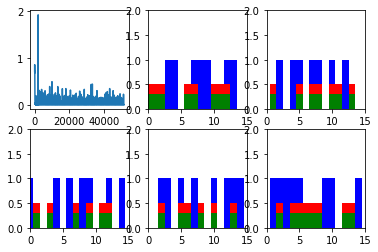

Step 500 Loss 4.58193e-05


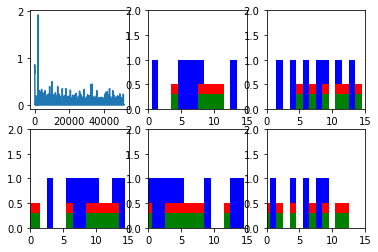

Step 600 Loss 4.53028e-05


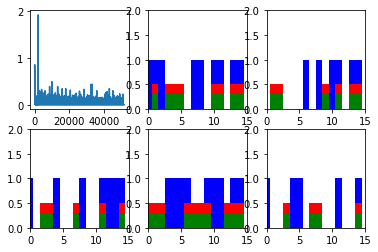

New data, epoch 78
Step 0 Loss 0.157396


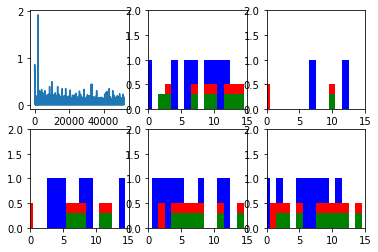

Step 100 Loss 4.92492e-05


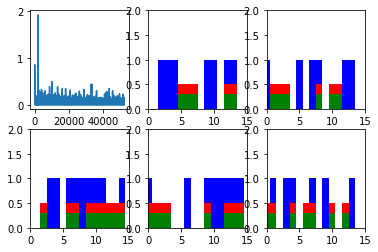

Step 200 Loss 5.35961e-05


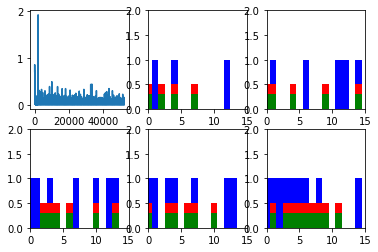

Step 300 Loss 4.50373e-05


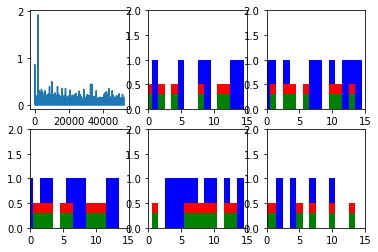

Step 400 Loss 5.23227e-05


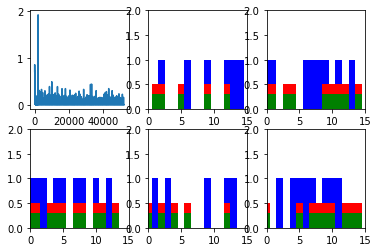

Step 500 Loss 5.04046e-05


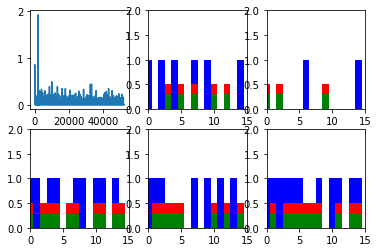

Step 600 Loss 4.2391e-05


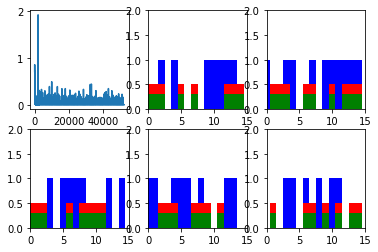

New data, epoch 79
Step 0 Loss 0.153026


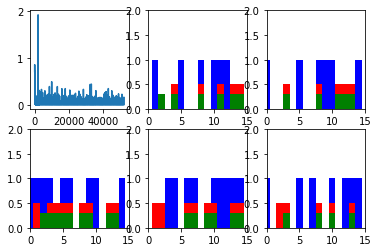

Step 100 Loss 4.39884e-05


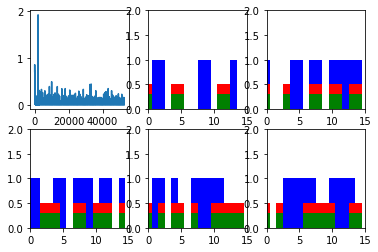

Step 200 Loss 4.11942e-05


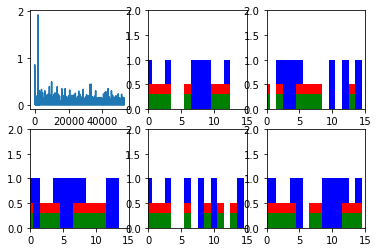

Step 300 Loss 4.85688e-05


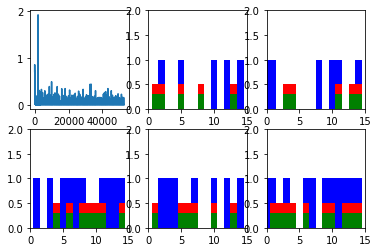

Step 400 Loss 5.01473e-05


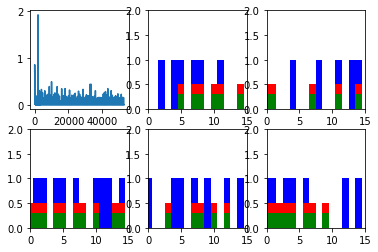

Step 500 Loss 4.87582e-05


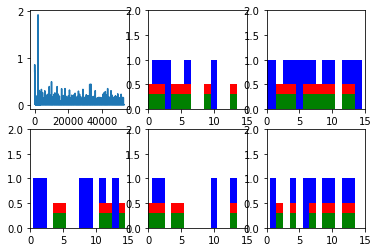

Step 600 Loss 4.20048e-05


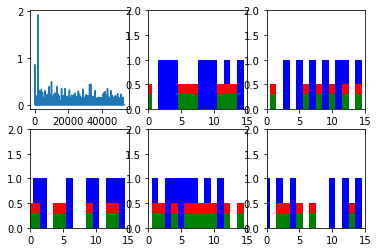

New data, epoch 80
Step 0 Loss 0.152239


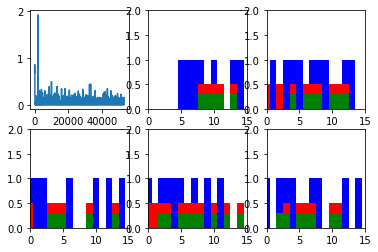

Step 100 Loss 4.93062e-05


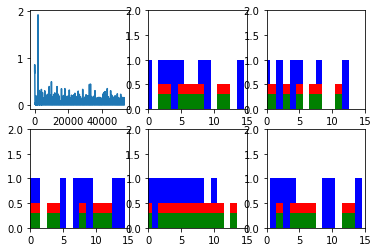

Step 200 Loss 4.76376e-05


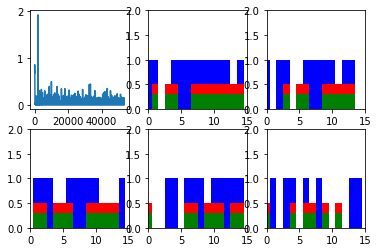

Step 300 Loss 5.40966e-05


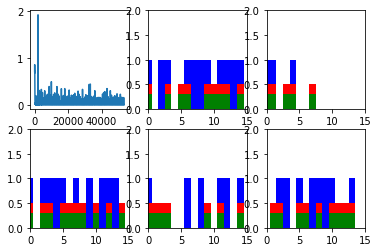

Step 400 Loss 4.57541e-05


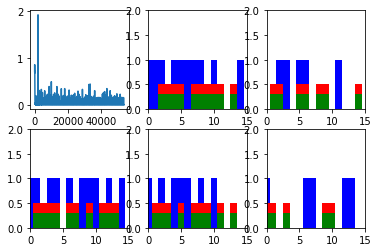

Step 500 Loss 5.1588e-05


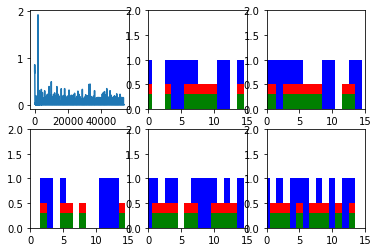

Step 600 Loss 4.96812e-05


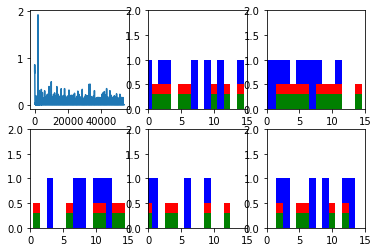

New data, epoch 81
Step 0 Loss 0.163391


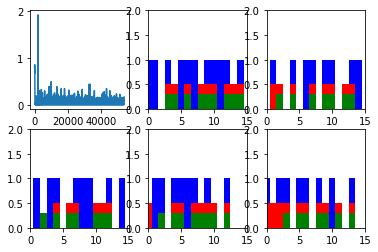

Step 100 Loss 4.20398e-05


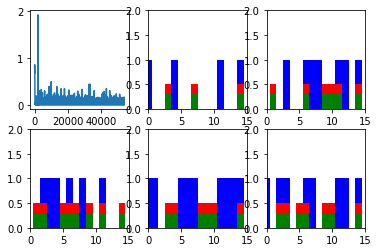

Step 200 Loss 4.56175e-05


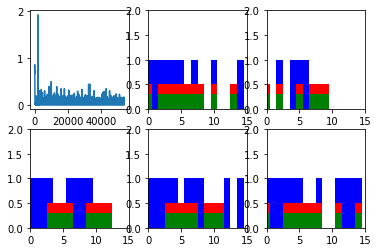

Step 300 Loss 4.35816e-05


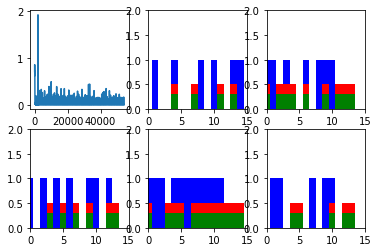

Step 400 Loss 4.23466e-05


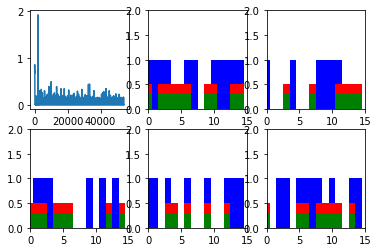

Step 500 Loss 4.7477e-05


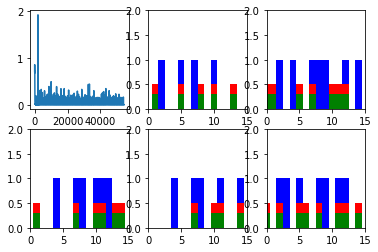

Step 600 Loss 4.00245e-05


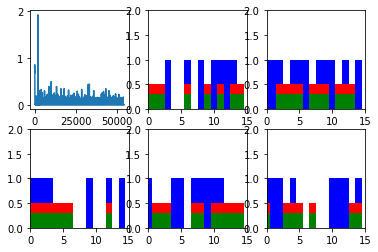

New data, epoch 82
Step 0 Loss 0.170775


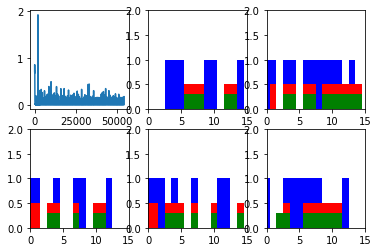

Step 100 Loss 4.58415e-05


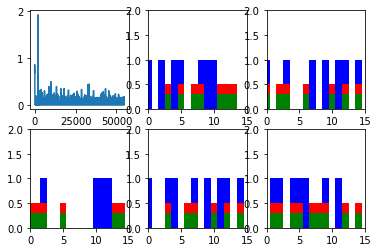

Step 200 Loss 4.30141e-05


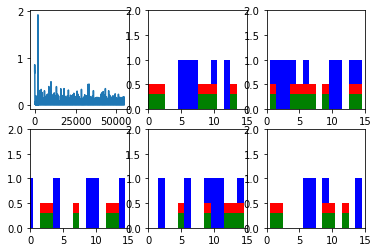

Step 300 Loss 4.41855e-05


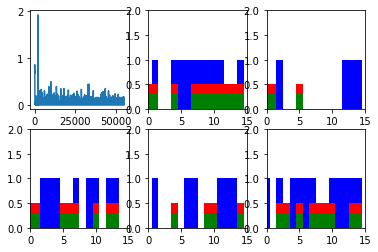

Step 400 Loss 4.46019e-05


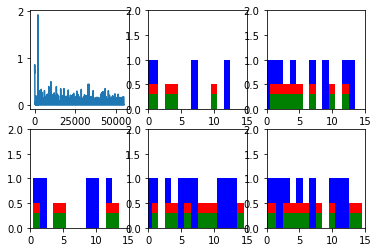

Step 500 Loss 4.08398e-05


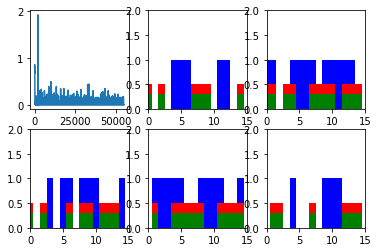

Step 600 Loss 4.64964e-05


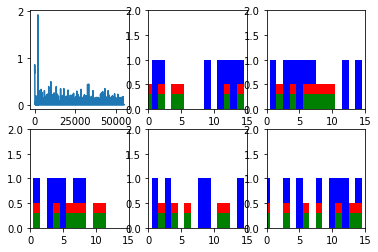

New data, epoch 83
Step 0 Loss 0.17429


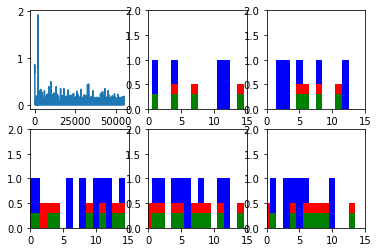

Step 100 Loss 4.56747e-05


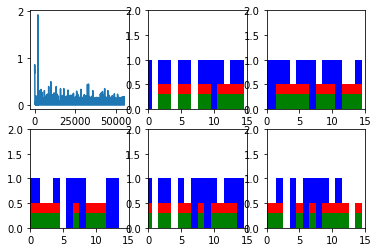

Step 200 Loss 4.35115e-05


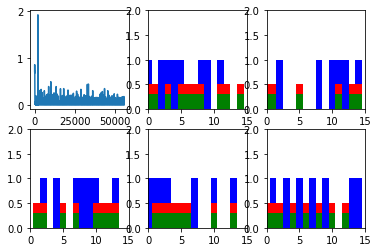

Step 300 Loss 4.32922e-05


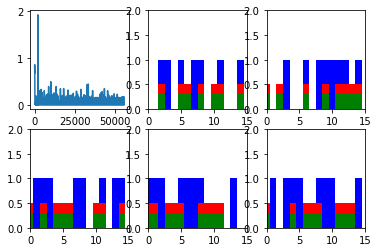

Step 400 Loss 4.3273e-05


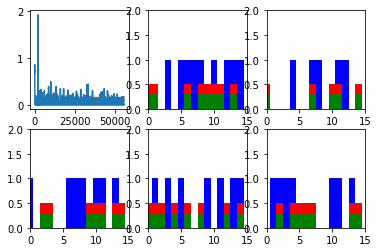

Step 500 Loss 4.90411e-05


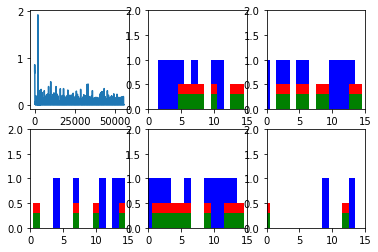

Step 600 Loss 4.21066e-05


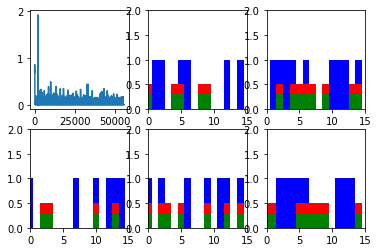

New data, epoch 84
Step 0 Loss 0.153044


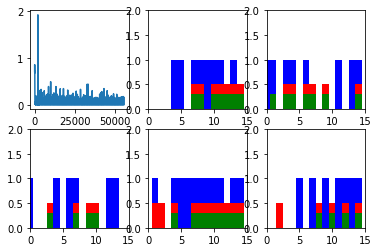

Step 100 Loss 4.7663e-05


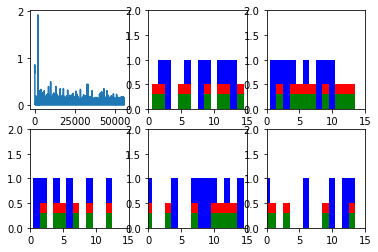

Step 200 Loss 3.94825e-05


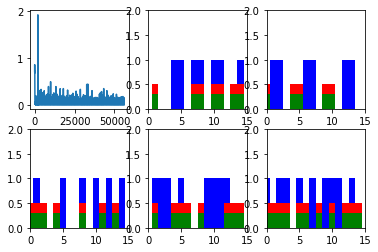

Step 300 Loss 4.56032e-05


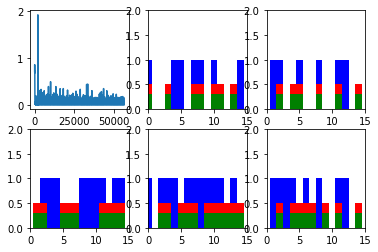

Step 400 Loss 4.16727e-05


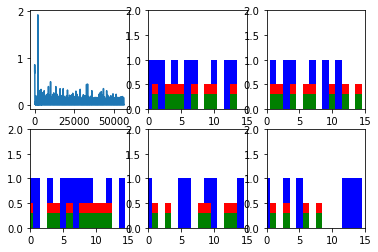

Step 500 Loss 4.77678e-05


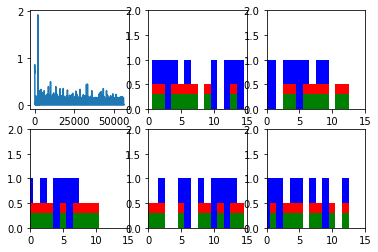

Step 600 Loss 4.29394e-05


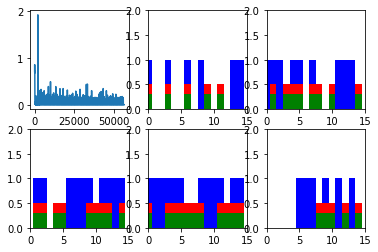

New data, epoch 85
Step 0 Loss 0.109813


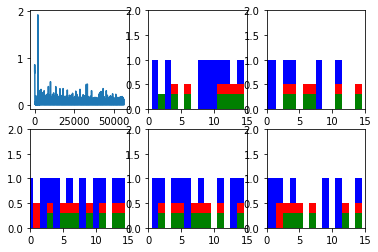

Step 100 Loss 4.3437e-05


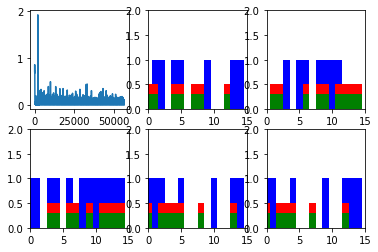

Step 200 Loss 4.51328e-05


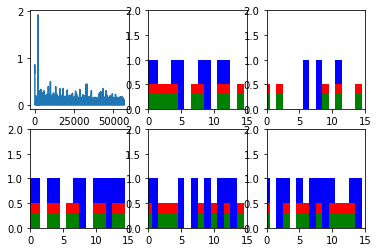

Step 300 Loss 4.41315e-05


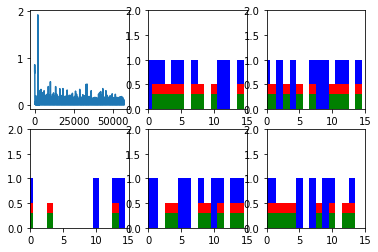

Step 400 Loss 4.11005e-05


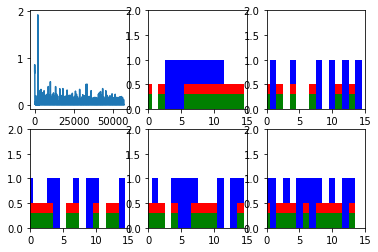

Step 500 Loss 4.39423e-05


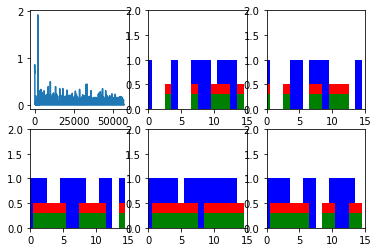

Step 600 Loss 3.82825e-05


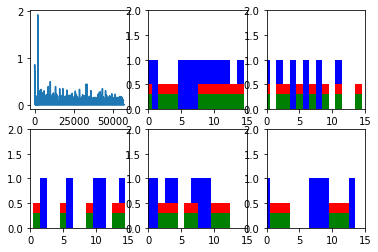

New data, epoch 86
Step 0 Loss 0.232567


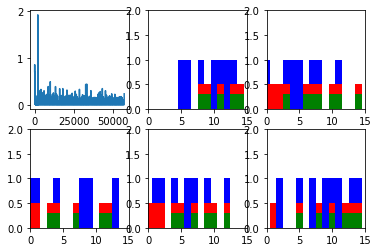

Step 100 Loss 4.69273e-05


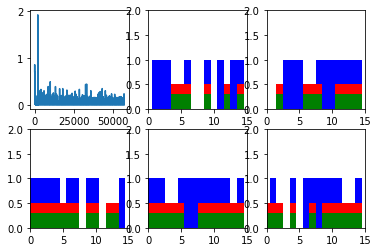

Step 200 Loss 5.13721e-05


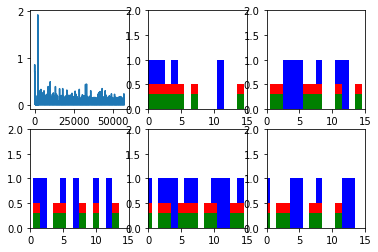

Step 300 Loss 4.27981e-05


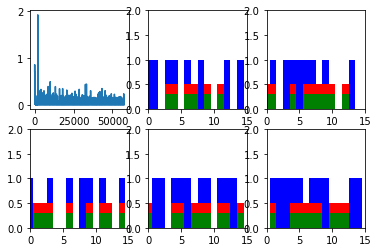

Step 400 Loss 4.59879e-05


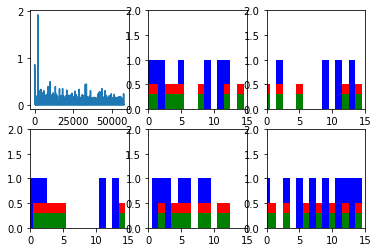

Step 500 Loss 4.33082e-05


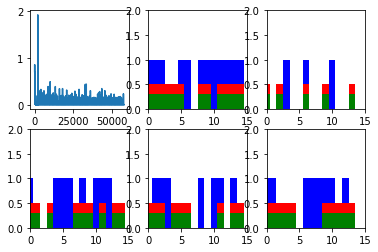

Step 600 Loss 4.65822e-05


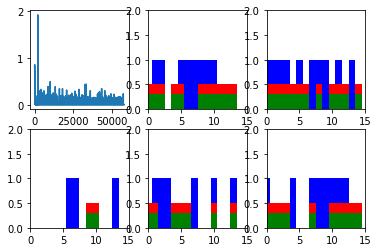

New data, epoch 87
Step 0 Loss 0.326317


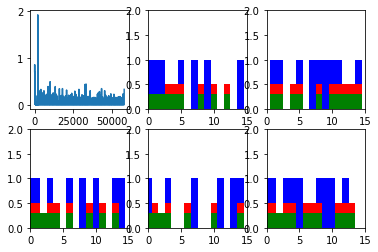

Step 100 Loss 4.84111e-05


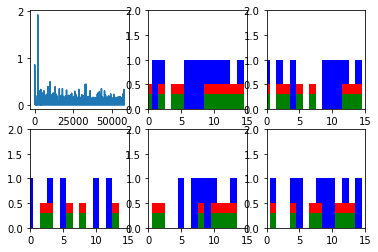

Step 200 Loss 4.55221e-05


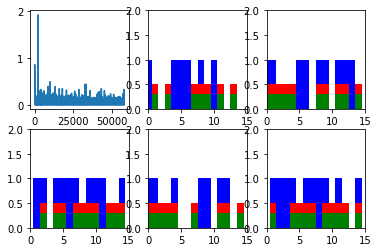

Step 300 Loss 4.16584e-05


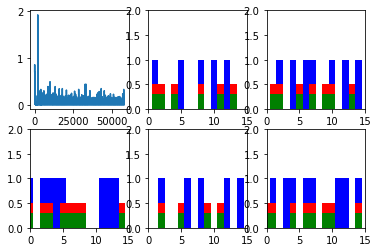

Step 400 Loss 4.94318e-05


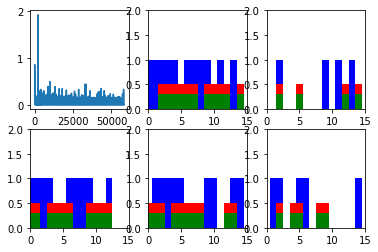

Step 500 Loss 4.64119e-05


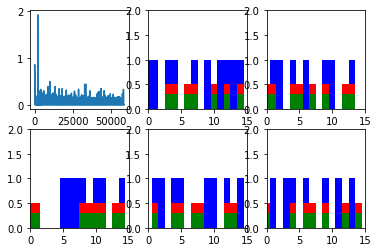

Step 600 Loss 4.78294e-05


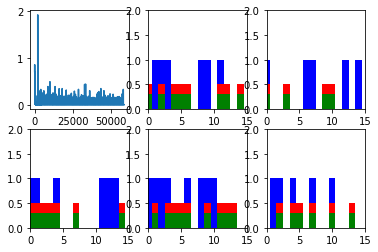

New data, epoch 88
Step 0 Loss 0.138102


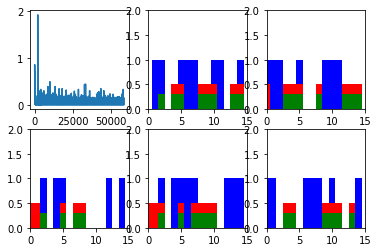

Step 100 Loss 4.63296e-05


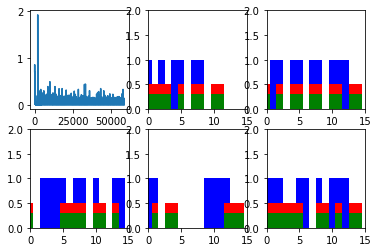

Step 200 Loss 4.80236e-05


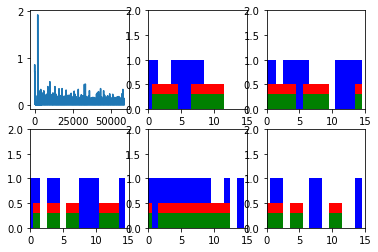

Step 300 Loss 4.1865e-05


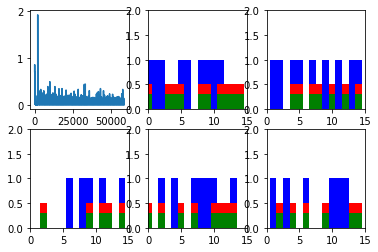

Step 400 Loss 4.20405e-05


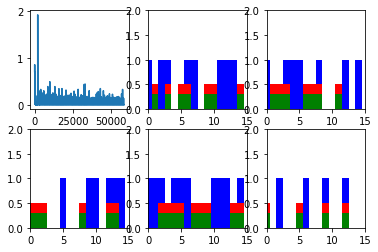

Step 500 Loss 4.10099e-05


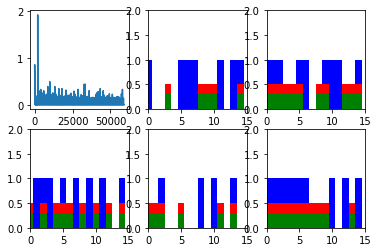

Step 600 Loss 5.15801e-05


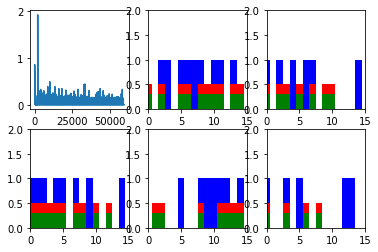

New data, epoch 89
Step 0 Loss 0.185568


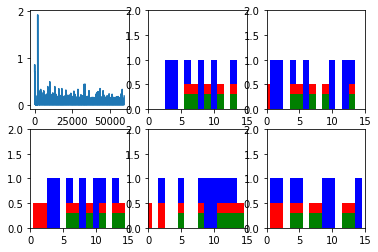

Step 100 Loss 4.2232e-05


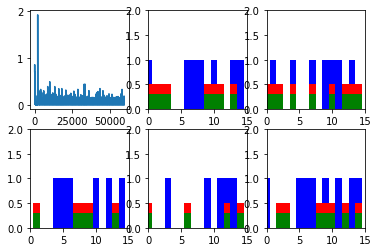

Step 200 Loss 4.61641e-05


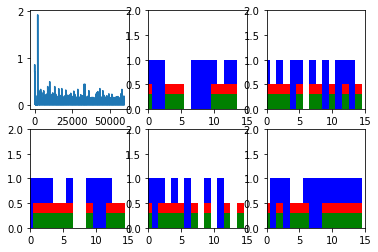

Step 300 Loss 5.18708e-05


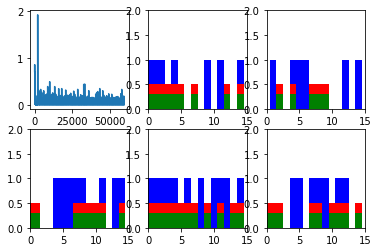

Step 400 Loss 4.49038e-05


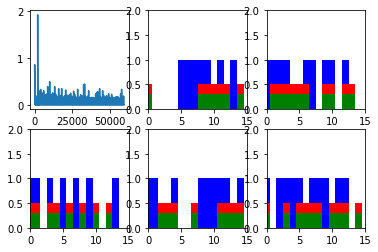

Step 500 Loss 4.17919e-05


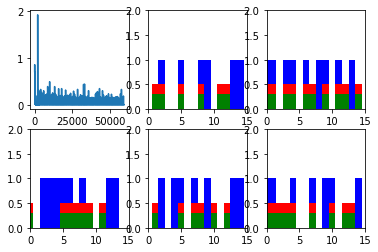

Step 600 Loss 4.33858e-05


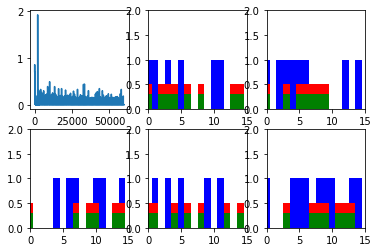

New data, epoch 90
Step 0 Loss 0.325126


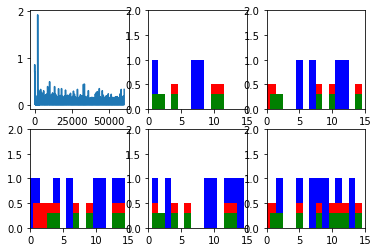

Step 100 Loss 4.37673e-05


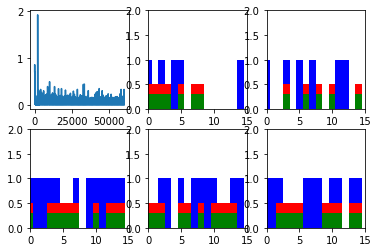

Step 200 Loss 4.37118e-05


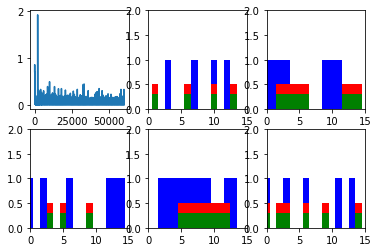

Step 300 Loss 4.3858e-05


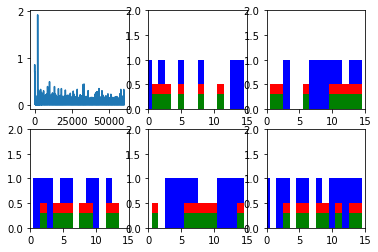

Step 400 Loss 4.50056e-05


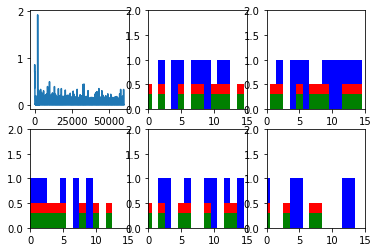

Step 500 Loss 4.00086e-05


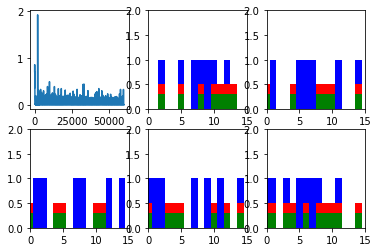

Step 600 Loss 4.79757e-05


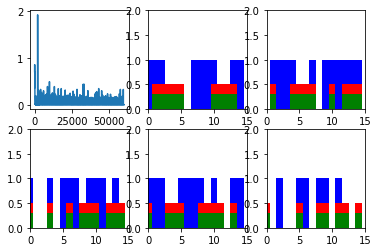

New data, epoch 91
Step 0 Loss 0.128411


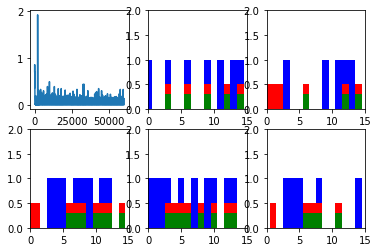

Step 100 Loss 3.70603e-05


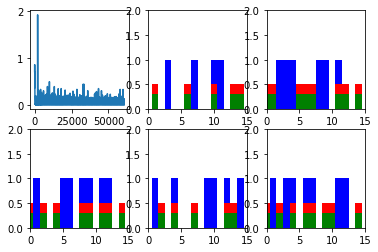

Step 200 Loss 3.72749e-05


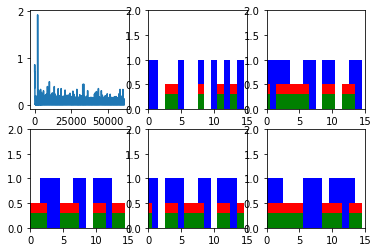

Step 300 Loss 4.25751e-05


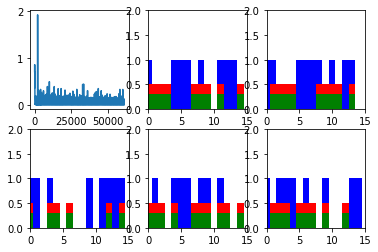

Step 400 Loss 4.00912e-05


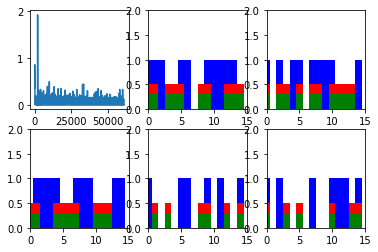

Step 500 Loss 4.45589e-05


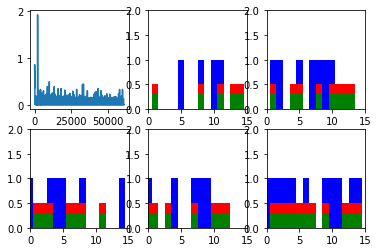

Step 600 Loss 4.01612e-05


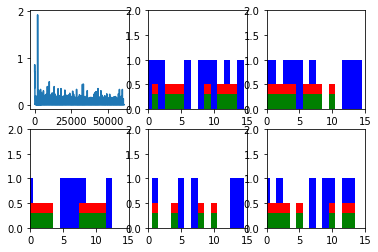

New data, epoch 92
Step 0 Loss 0.192834


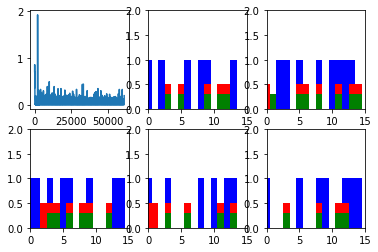

Step 100 Loss 4.05856e-05


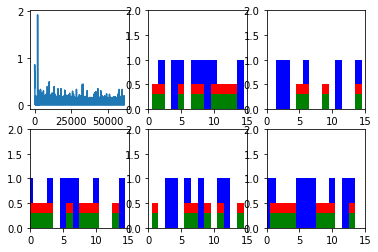

Step 200 Loss 4.23163e-05


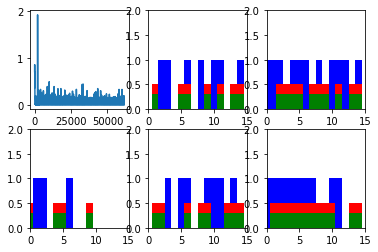

Step 300 Loss 3.71398e-05


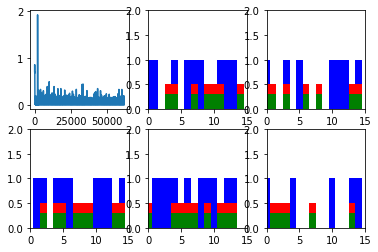

Step 400 Loss 4.34288e-05


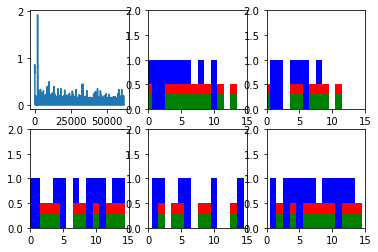

Step 500 Loss 4.04012e-05


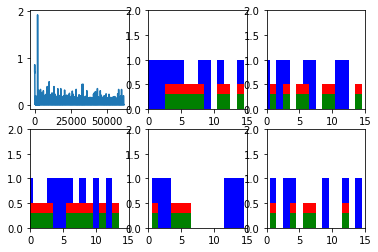

Step 600 Loss 4.03121e-05


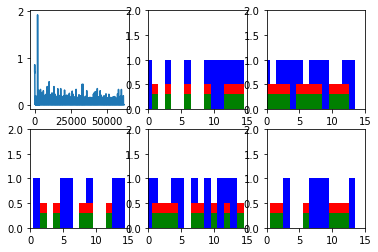

New data, epoch 93
Step 0 Loss 0.176151


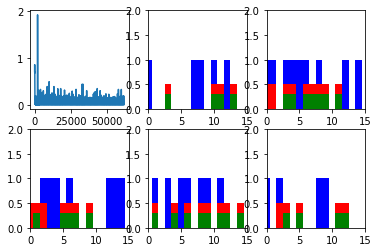

Step 100 Loss 4.41345e-05


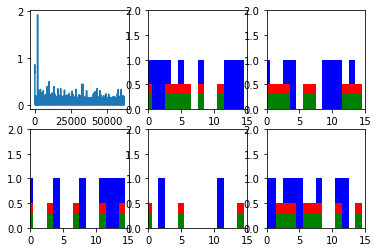

Step 200 Loss 3.9527e-05


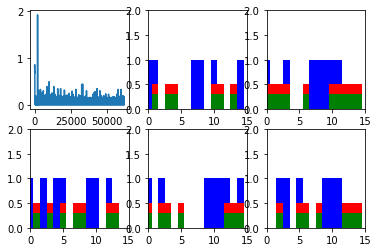

Step 300 Loss 4.22131e-05


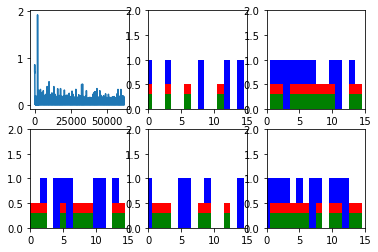

Step 400 Loss 3.51213e-05


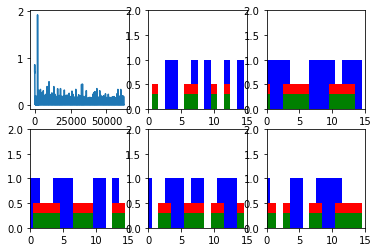

Step 500 Loss 4.24625e-05


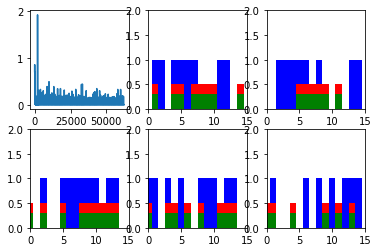

Step 600 Loss 3.83191e-05


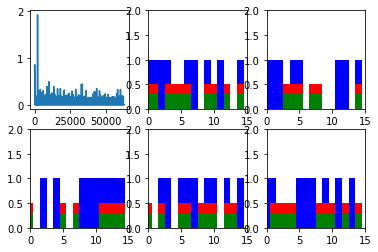

New data, epoch 94
Step 0 Loss 0.131795


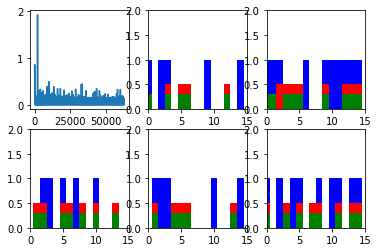

Step 100 Loss 4.28171e-05


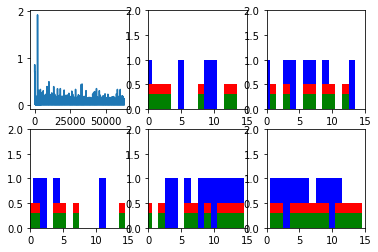

Step 200 Loss 3.8575e-05


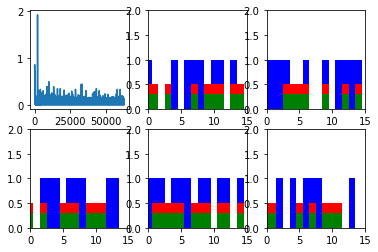

Step 300 Loss 3.93904e-05


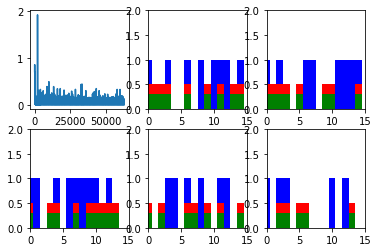

Step 400 Loss 3.95302e-05


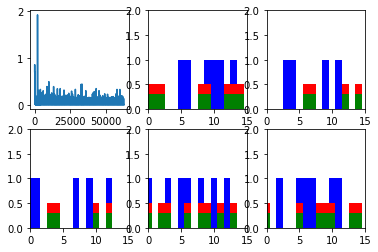

Step 500 Loss 4.03058e-05


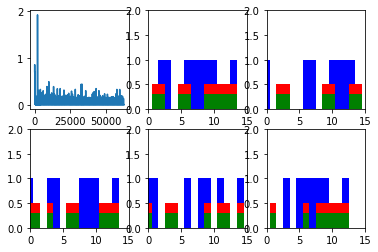

Step 600 Loss 3.62291e-05


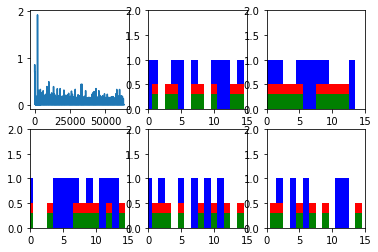

New data, epoch 95
Step 0 Loss 0.202742


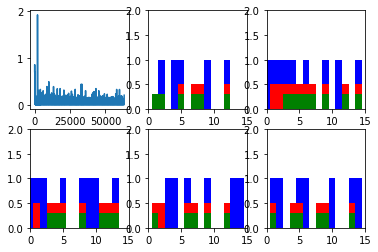

Step 100 Loss 4.26089e-05


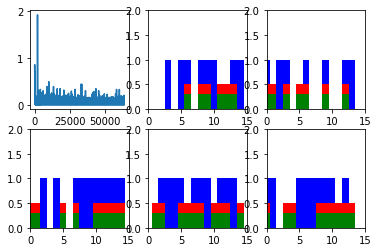

Step 200 Loss 4.39816e-05


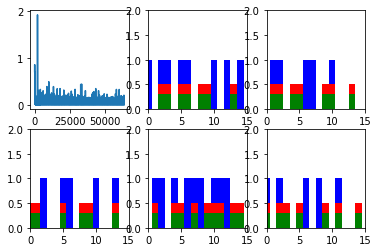

Step 300 Loss 3.91964e-05


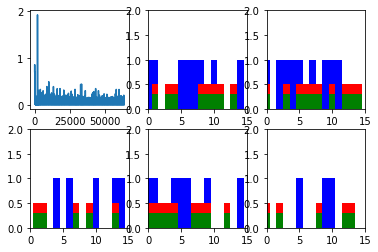

Step 400 Loss 3.95827e-05


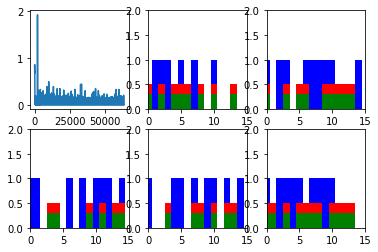

Step 500 Loss 4.51925e-05


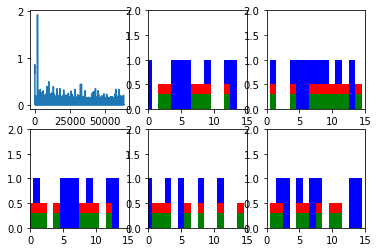

Step 600 Loss 4.66782e-05


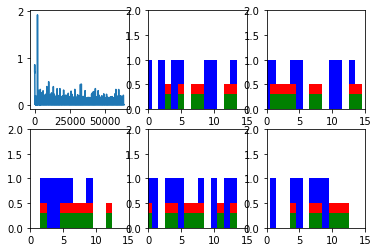

New data, epoch 96
Step 0 Loss 0.208527


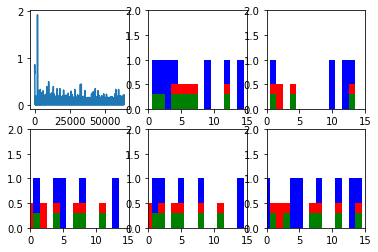

Step 100 Loss 4.06523e-05


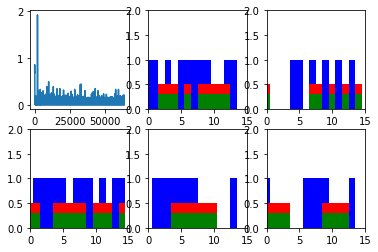

Step 200 Loss 4.06824e-05


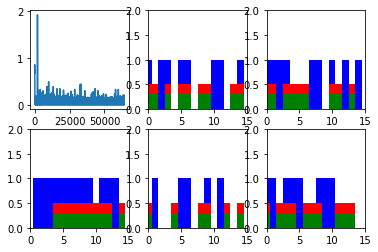

Step 300 Loss 4.72045e-05


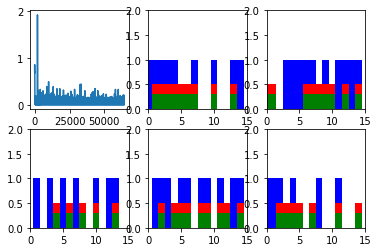

Step 400 Loss 4.44315e-05


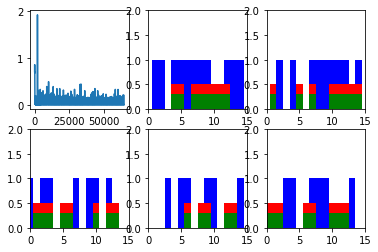

Step 500 Loss 4.95411e-05


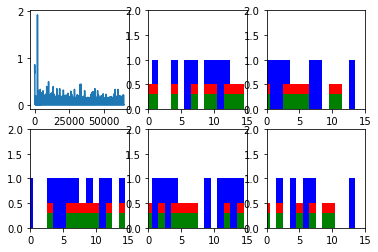

Step 600 Loss 4.09685e-05


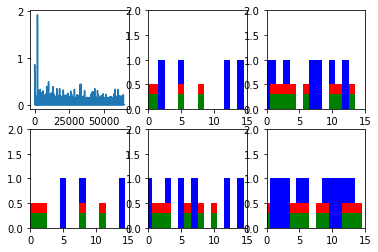

New data, epoch 97
Step 0 Loss 0.180446


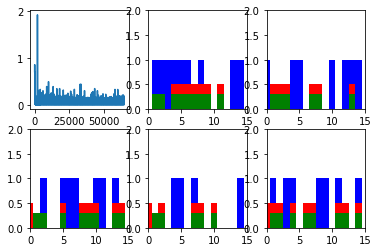

Step 100 Loss 4.38216e-05


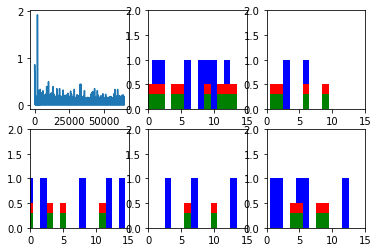

Step 200 Loss 4.15295e-05


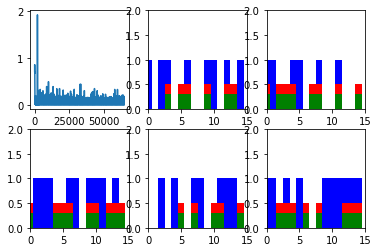

Step 300 Loss 4.38564e-05


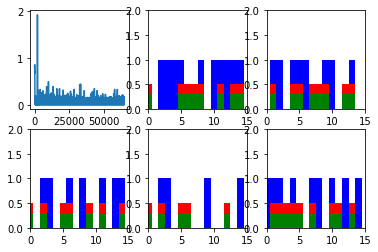

Step 400 Loss 3.72241e-05


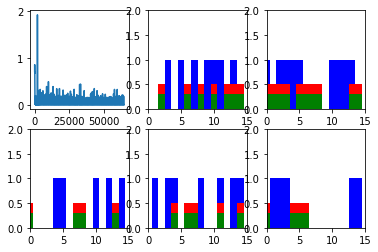

Step 500 Loss 4.45335e-05


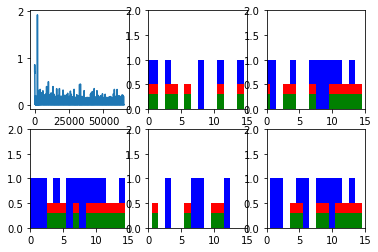

Step 600 Loss 4.15914e-05


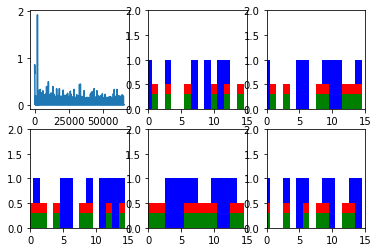

New data, epoch 98
Step 0 Loss 0.187158


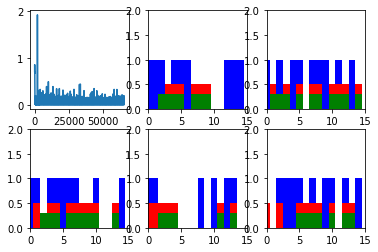

Step 100 Loss 3.94539e-05


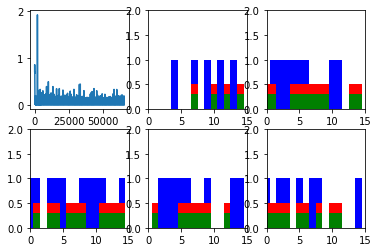

Step 200 Loss 4.28026e-05


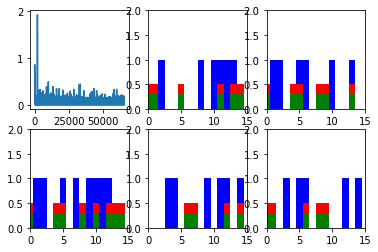

Step 300 Loss 4.41632e-05


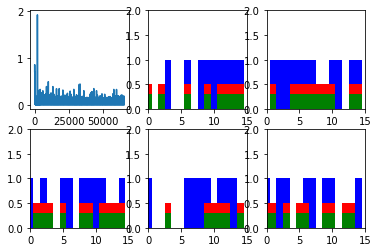

Step 400 Loss 4.05997e-05


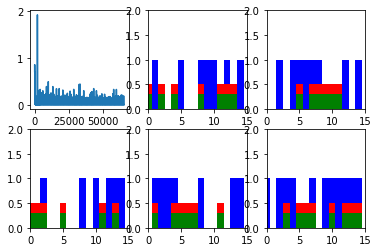

Step 500 Loss 4.2931e-05


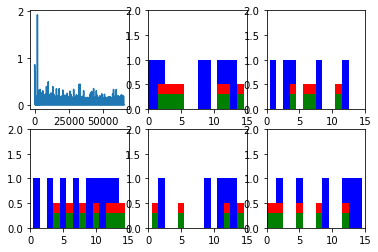

Step 600 Loss 4.46223e-05


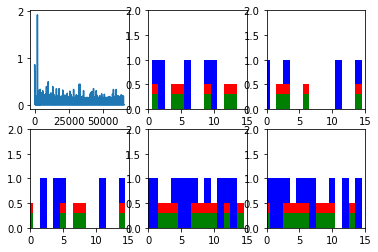

New data, epoch 99
Step 0 Loss 0.10894


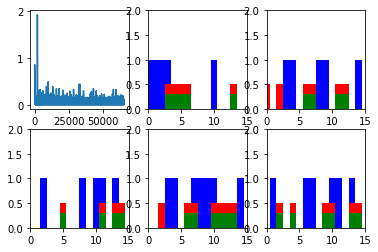

Step 100 Loss 3.98559e-05


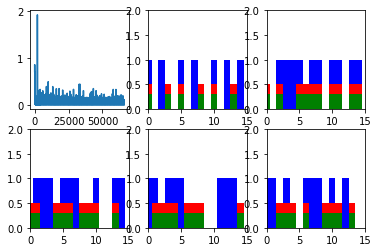

Step 200 Loss 3.79979e-05


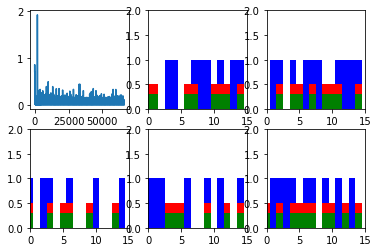

Step 300 Loss 3.68139e-05


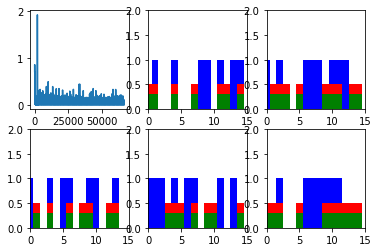

Step 400 Loss 4.01022e-05


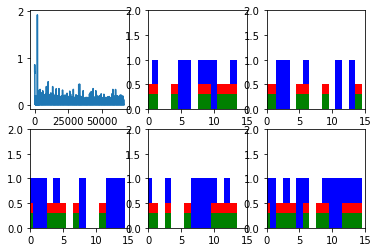

Step 500 Loss 4.07283e-05


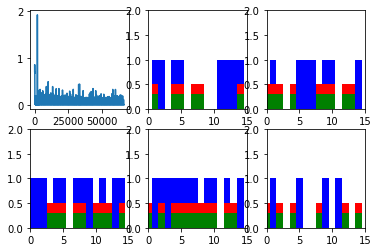

Step 600 Loss 4.17808e-05


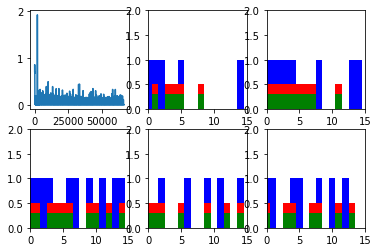

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()